In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [18]:
df = pd.read_csv('air_pollution_2024_2025(main).csv')


In [19]:
df.head()

timestamp  AQI      CO   NO    NO2     O3    SO2  PM2.5    PM10  \
0  31/12/2023 19:00    5  934.60  0.0  32.22  57.94  14.19  82.32  101.28   
1  31/12/2023 20:00    5  894.55  0.0  29.82  57.22  14.54  81.66  100.02   
2  31/12/2023 21:00    5  881.20  0.0  26.39  59.37  15.26  84.12  102.75   
3  31/12/2023 22:00    5  894.55  0.0  25.02  58.65  16.21  90.38  110.10   
4  31/12/2023 23:00    5  934.60  0.0  25.36  55.79  16.93  98.08  119.59   

    NH3  ... Arrhythmia Alzheimer’s & Dementia Parkinson’s Disease  \
0  4.94  ...         No                    Yes                  No   
1  4.62  ...         No                     No                  No   
2  4.62  ...         No                     No                  No   
3  4.69  ...         No                     No                  No   
4  4.69  ...         No                     No                  No   

  Cognitive Impairment in Children Low Birth Weight Preterm Births  \
0                              Yes               No             No   
1                              Yes               No             No   
2                              Yes               No             No   
3                              Yes               No             No   
4                              Yes               No             No   

  Sudden Infant Death Syndrome (SIDS) Bladder Cancer Diabetes  \
0                                  No             No       No   
1                                  No             No       No   
2                                  No             No       No   
3                                  No             No       No   
4                                  No             No       No   

  Eye & Skin Irritation  
0                    No  
1                    No  
2                   Yes  
3                   Yes  
4                   Yes  

[5 rows x 28 columns]

In [20]:
df.tail()

timestamp  AQI       CO    NO    NO2    O3    SO2  PM2.5   PM10  \
9985  23/02/2025 20:00    3   961.30  0.92  39.07  5.72  13.59  41.66  56.02   
9986  23/02/2025 21:00    3   961.30  0.69  38.39  6.44  13.83  43.66  57.76   
9987  23/02/2025 22:00    3  1014.71  0.95  38.73  4.96  13.59  48.47  63.55   
9988  23/02/2025 23:00    4  1148.22  2.96  41.13  1.31  13.71  58.74  74.10   
9989   24/02/2025 0:00    4  1321.79  8.38  41.13  0.06  14.31  71.89  87.10   

       NH3  ... Arrhythmia Alzheimer’s & Dementia Parkinson’s Disease  \
9985  4.50  ...         No                    Yes                 Yes   
9986  4.37  ...         No                    Yes                 Yes   
9987  4.75  ...         No                    Yes                 Yes   
9988  5.57  ...         No                    Yes                 Yes   
9989  6.59  ...         No                    Yes                 Yes   

     Cognitive Impairment in Children Low Birth Weight Preterm Births  \
9985                              Yes               No             No   
9986                              Yes               No             No   
9987                              Yes               No             No   
9988                              Yes               No             No   
9989                              Yes               No             No   

     Sudden Infant Death Syndrome (SIDS) Bladder Cancer Diabetes  \
9985                                  No             No       No   
9986                                  No             No       No   
9987                                  No             No       No   
9988                                  No             No       No   
9989                                  No             No       No   

     Eye & Skin Irritation  
9985                    No  
9986                    No  
9987                    No  
9988                    No  
9989                    No  

[5 rows x 28 columns]

In [21]:
df.shape

(9990, 28)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            9990 non-null   object 
 1   AQI                                  9990 non-null   int64  
 2   CO                                   9990 non-null   float64
 3   NO                                   9990 non-null   float64
 4   NO2                                  9990 non-null   float64
 5   O3                                   9990 non-null   float64
 6   SO2                                  9990 non-null   float64
 7   PM2.5                                9990 non-null   float64
 8   PM10                                 9990 non-null   float64
 9   NH3                                  9990 non-null   float64
 10  Asthma                               9990 non-null   object 
 11  COPD                          

In [23]:
df.isnull().sum()

timestamp                              0
AQI                                    0
CO                                     0
NO                                     0
NO2                                    0
O3                                     0
SO2                                    0
PM2.5                                  0
PM10                                   0
NH3                                    0
Asthma                                 0
COPD                                   0
Lung Cancer                            0
Pneumonia & Bronchitis                 0
Reduced Lung Function in Children      0
Heart Attacks                          0
Hypertension                           0
Strokes                                0
Arrhythmia                             0
Alzheimer’s & Dementia                 0
Parkinson’s Disease                    0
Cognitive Impairment in Children       0
Low Birth Weight                       0
Preterm Births                         0
Sudden Infant De

In [24]:
df.duplicated().sum()

0

In [25]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

timestamp
31/12/2023 19:00    1
08/10/2024 10:00    1
08/10/2024 3:00     1
08/10/2024 4:00     1
08/10/2024 5:00     1
                   ..
19/05/2024 13:00    1
19/05/2024 14:00    1
19/05/2024 15:00    1
19/05/2024 16:00    1
24/02/2025 0:00     1
Name: count, Length: 9990, dtype: int64
******************************
Asthma
No     6037
Yes    3953
Name: count, dtype: int64
******************************
COPD
Yes    8169
No     1821
Name: count, dtype: int64
******************************
Lung Cancer
No    9990
Name: count, dtype: int64
******************************
Pneumonia & Bronchitis
No     5895
Yes    4095
Name: count, dtype: int64
******************************
Reduced Lung Function in Children
No     6213
Yes    3777
Name: count, dtype: int64
******************************
Heart Attacks
No     9975
Yes      15
Name: count, dtype: int64
******************************
Hypertension
No     8002
Yes    1988
Name: count, dtype: int64
******************************
Strokes
No    9

In [26]:
df.describe()

AQI           CO           NO          NO2           O3  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean      3.118519   768.257262     5.466160    23.142438    48.965362   
std       1.256943   531.645808    14.024211   142.658704    39.718908   
min       1.000000   253.680000     0.000000 -9999.000000     0.000000   
25%       2.000000   453.950000     0.010000    14.390000    14.660000   
50%       3.000000   587.460000     0.740000    20.730000    42.560000   
75%       4.000000   854.490000     3.490000    31.785000    75.820000   
max       5.000000  6195.070000   182.390000   109.670000   228.880000   

               SO2        PM2.5         PM10          NH3  
count  9990.000000  9990.000000  9990.000000  9990.000000  
mean     25.238520    47.416426    56.515275     5.346829  
std      17.787516    41.607620   111.486525     4.877920  
min       5.070000     1.990000 -9999.000000     0.000000  
25%      14.780000    15.920000    20.600000     2.530000  
50%      20.980000    34.125000    42.005000     3.990000  
75%      29.560000    66.765000    81.312500     6.572500  
max     230.790000   340.340000   382.260000    70.930000

In [27]:
df.describe(include="object")

timestamp Asthma  COPD Lung Cancer Pneumonia & Bronchitis  \
count               9990   9990  9990        9990                   9990   
unique              9990      2     2           1                      2   
top     31/12/2023 19:00     No   Yes          No                     No   
freq                   1   6037  8169        9990                   5895   

       Reduced Lung Function in Children Heart Attacks Hypertension Strokes  \
count                               9990          9990         9990    9990   
unique                                 2             2            2       1   
top                                   No            No           No      No   
freq                                6213          9975         8002    9990   

       Arrhythmia Alzheimer’s & Dementia Parkinson’s Disease  \
count        9990                   9990                9990   
unique          2                      2                   2   
top            No                     No                  No   
freq         9077                   7213                8002   

       Cognitive Impairment in Children Low Birth Weight Preterm Births  \
count                              9990             9990           9990   
unique                                2                2              2   
top                                  No               No             No   
freq                               6213             9954           9975   

       Sudden Infant Death Syndrome (SIDS) Bladder Cancer Diabetes  \
count                                 9990           9990     9990   
unique                                   1              1        1   
top                                     No             No       No   
freq                                  9990           9990     9990   

       Eye & Skin Irritation  
count                   9990  
unique                     2  
top                      Yes  
freq                    7790

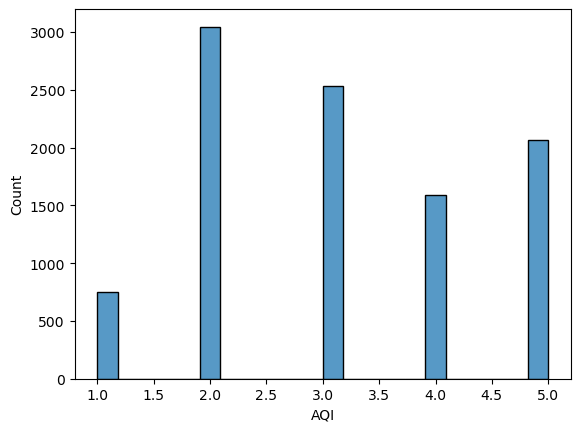

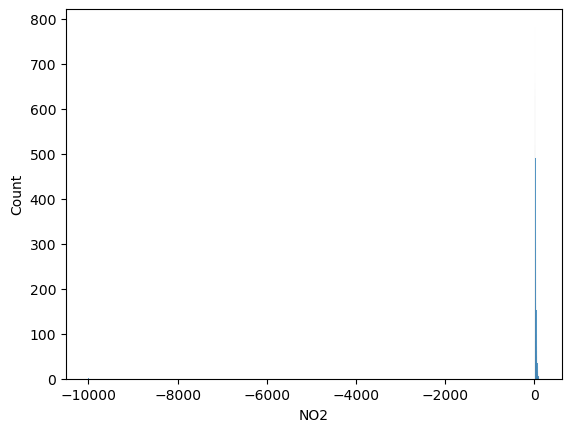

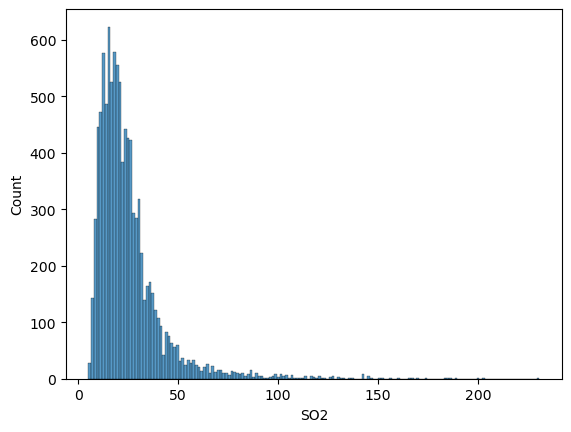

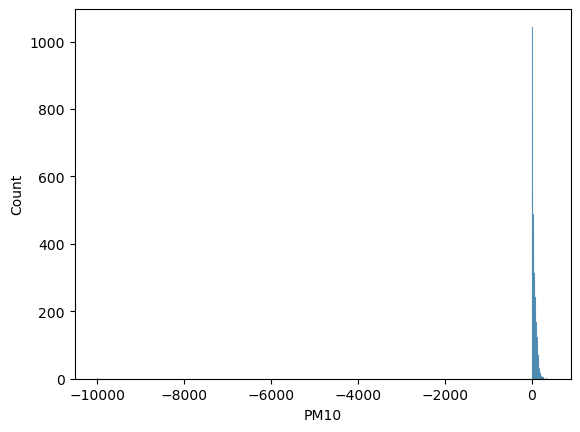

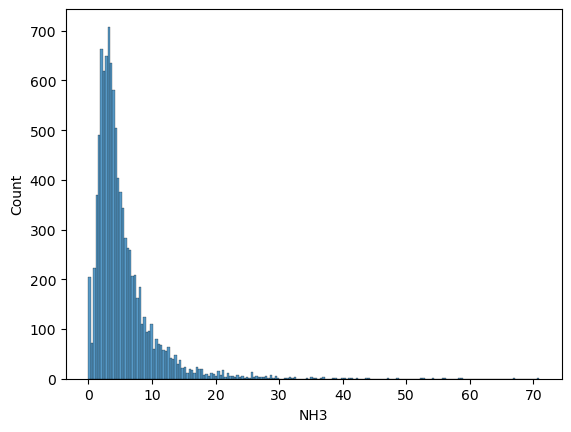

In [28]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
      sns.histplot(data=df,x=i)
      plt.show()

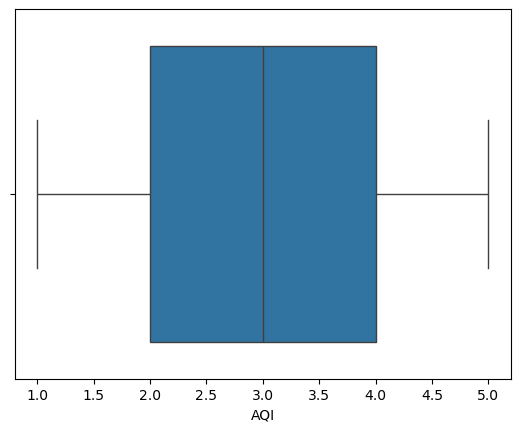

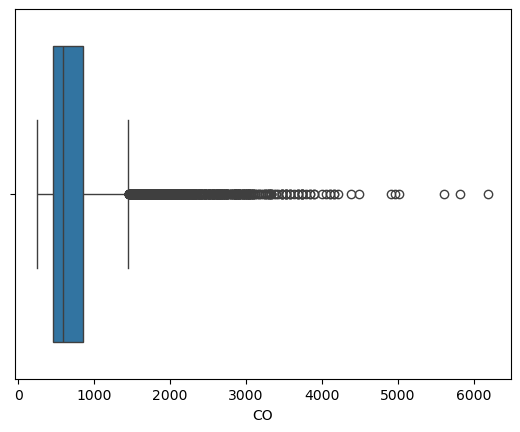

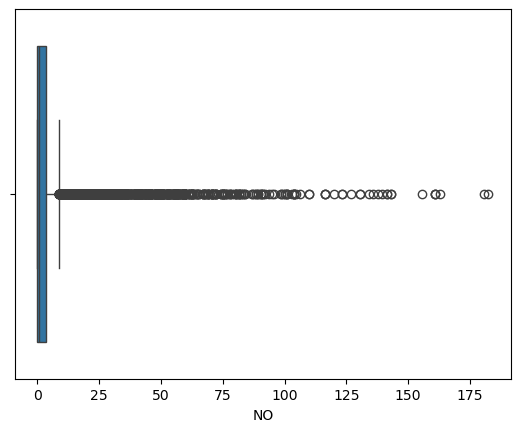

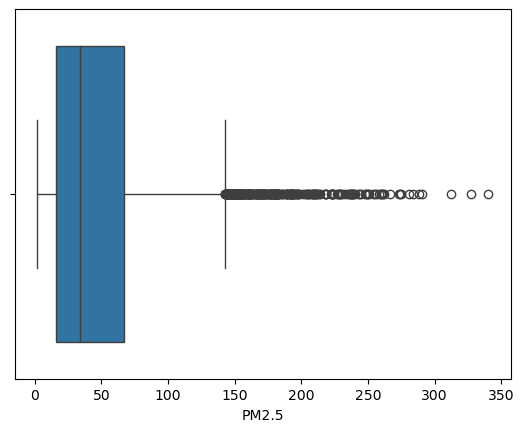

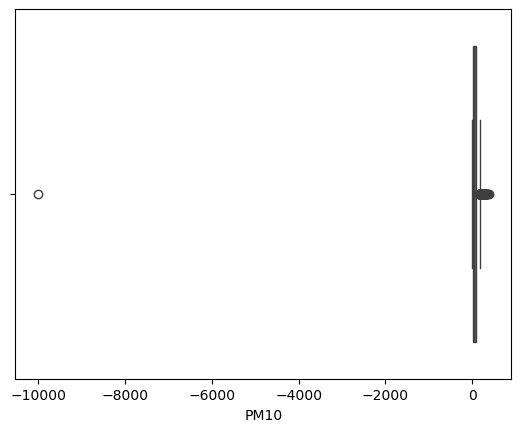

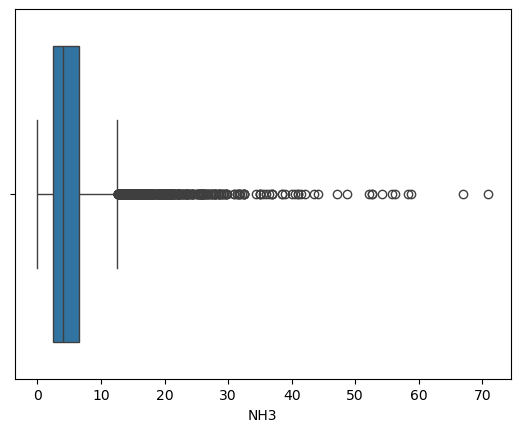

In [29]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
      sns.boxplot(data=df,x=i)
      plt.show()

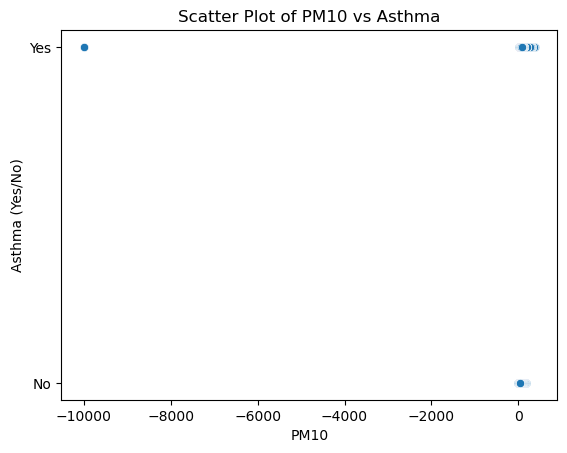

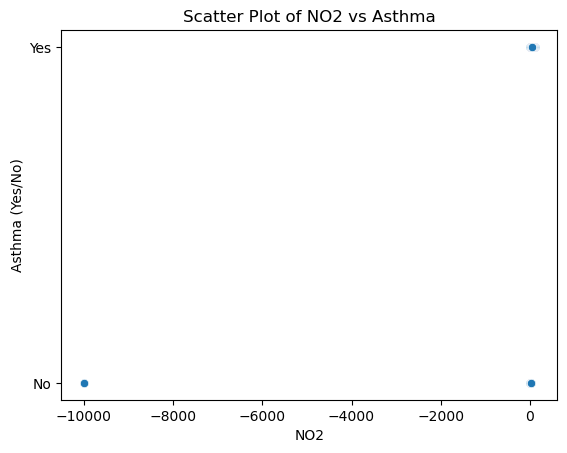

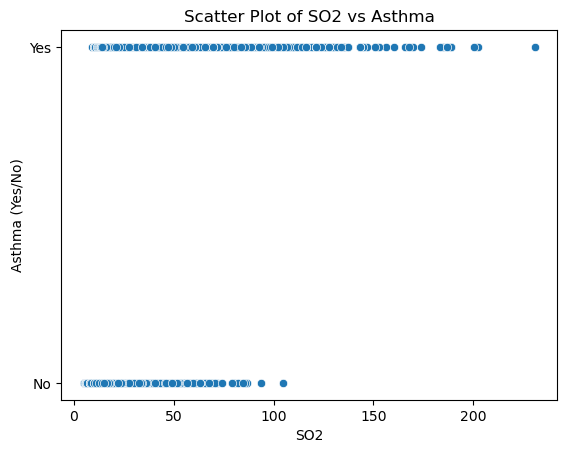

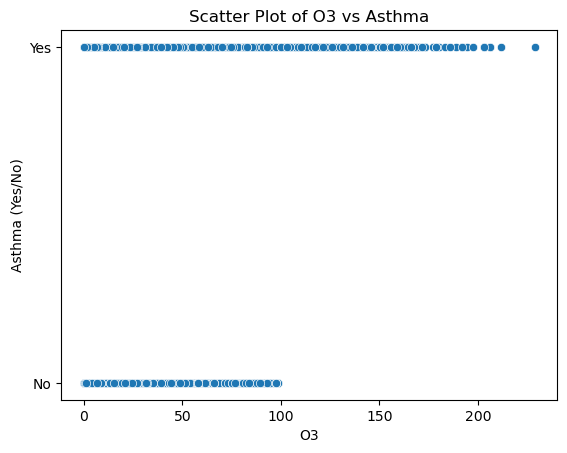

In [31]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
for pollutant in pollutants:
    sns.scatterplot(data=df, x=pollutant, y='Asthma')
    plt.title(f'Scatter Plot of {pollutant} vs Asthma')
    plt.xlabel(pollutant)
    plt.ylabel('Asthma (Yes/No)')
    plt.show()

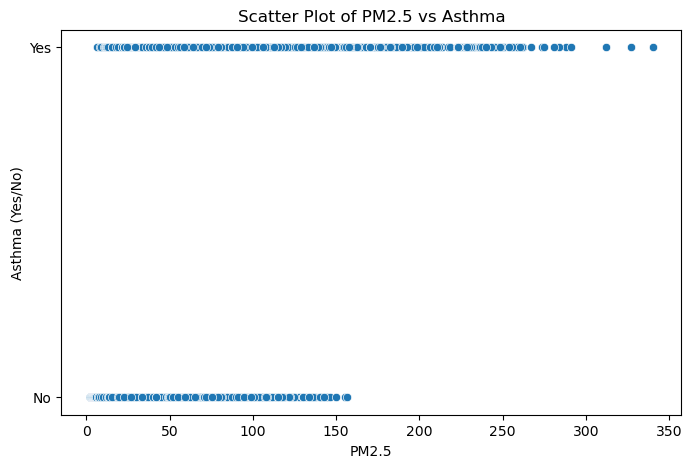

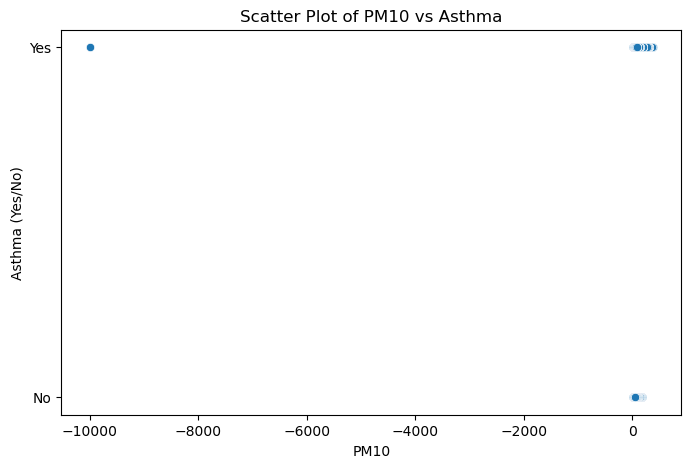

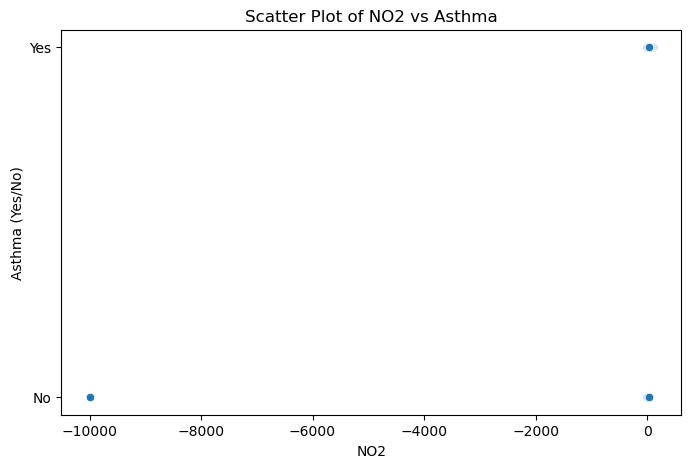

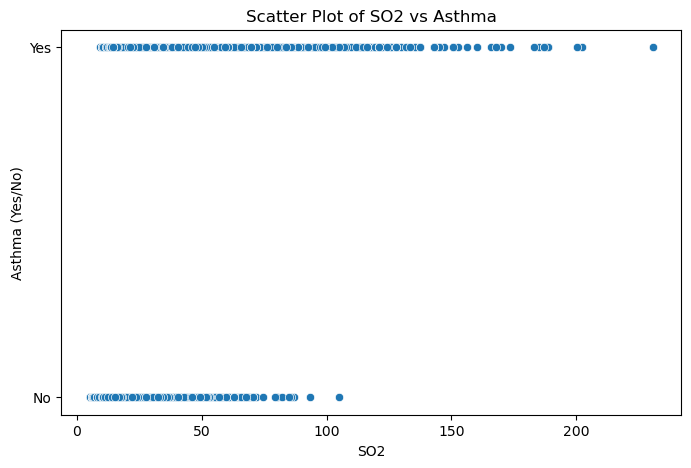

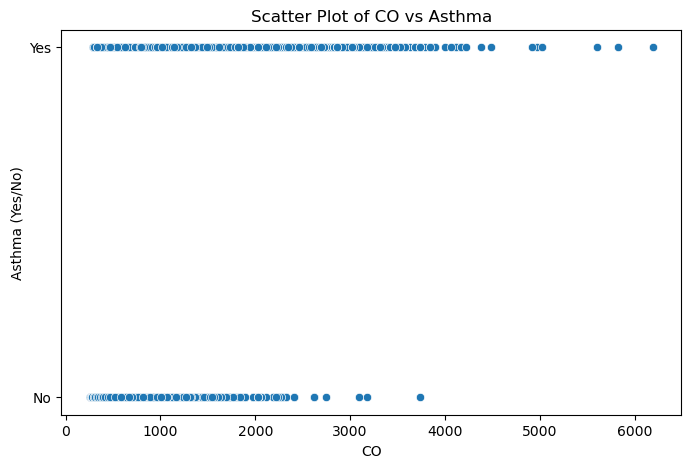

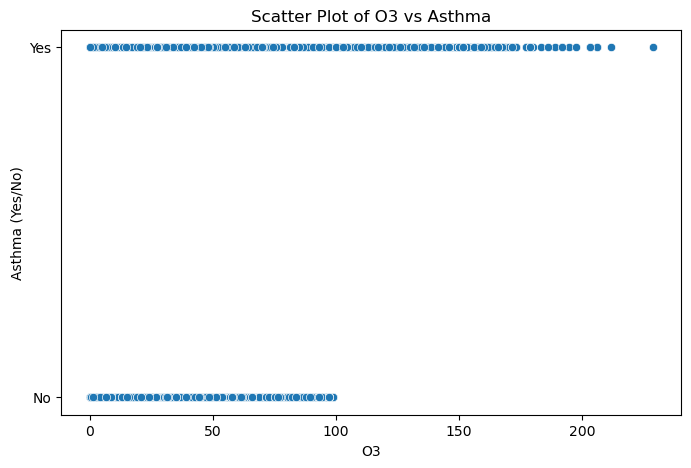

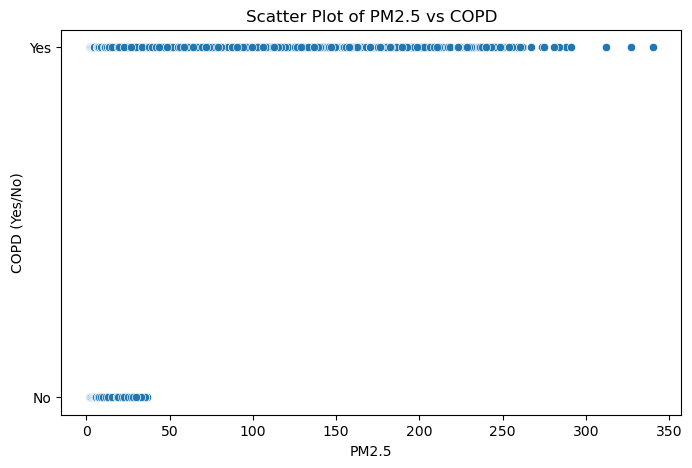

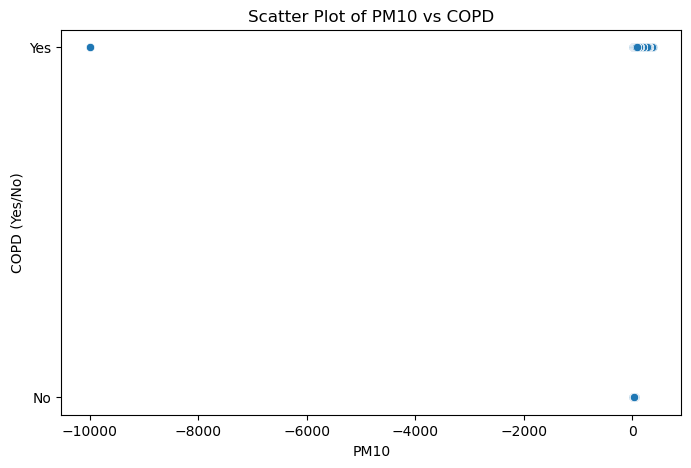

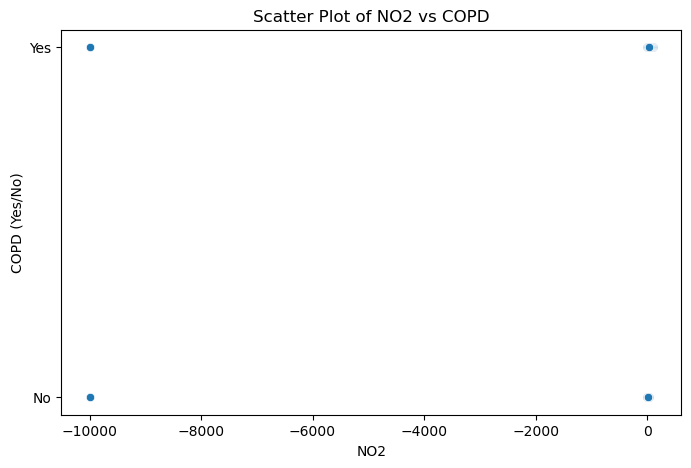

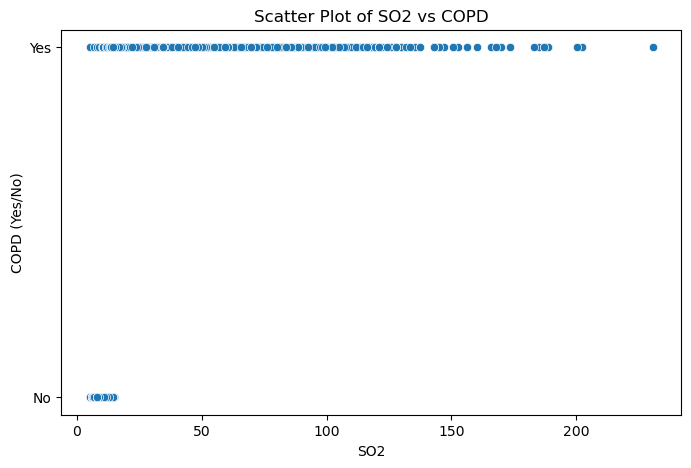

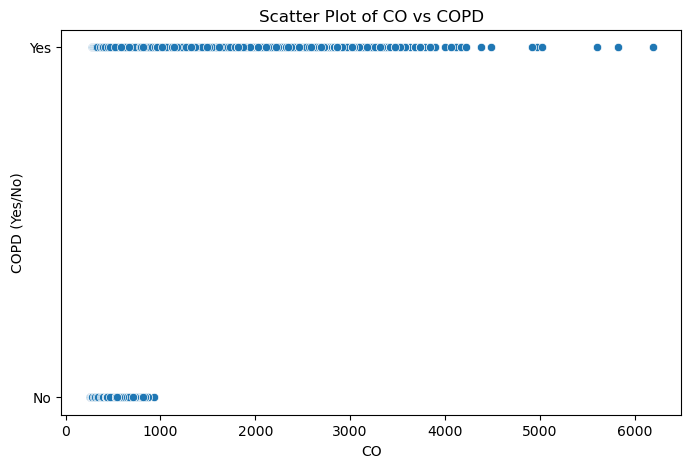

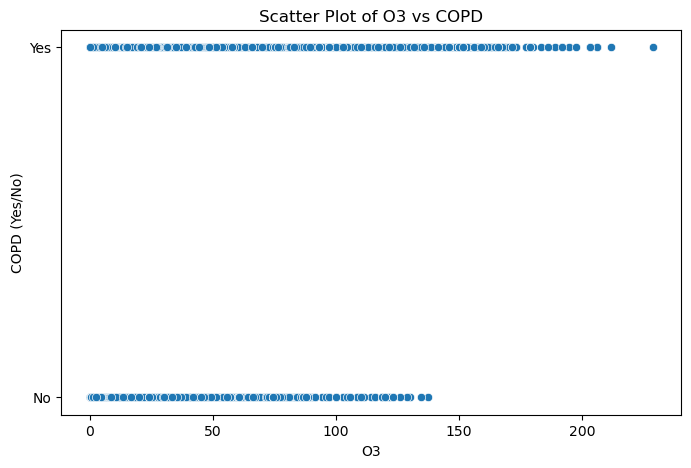

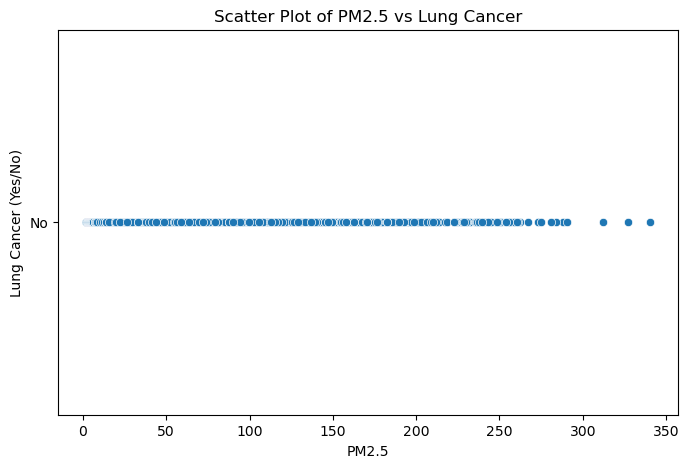

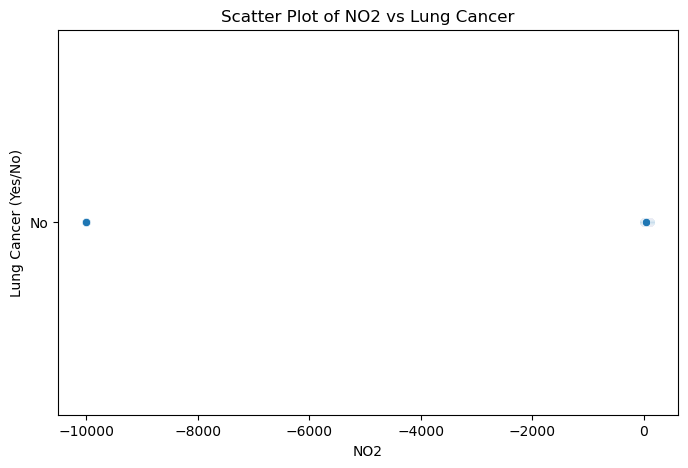

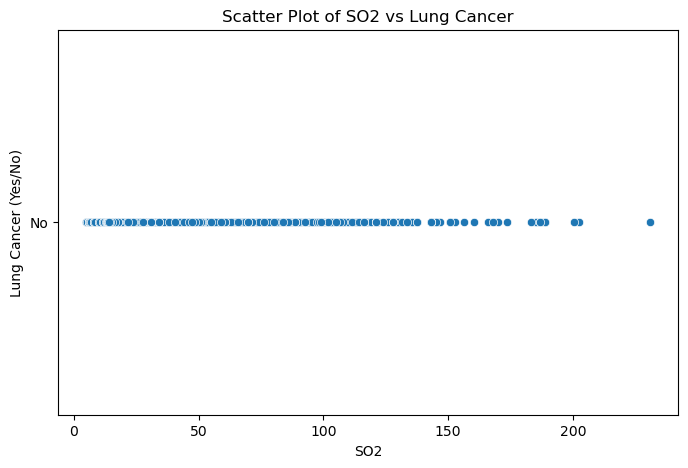

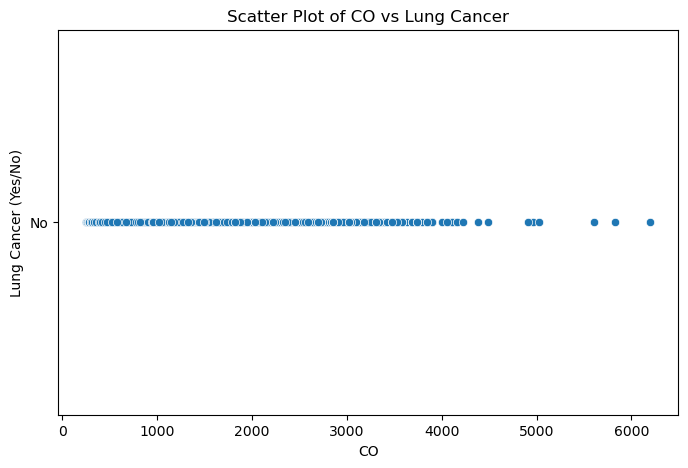

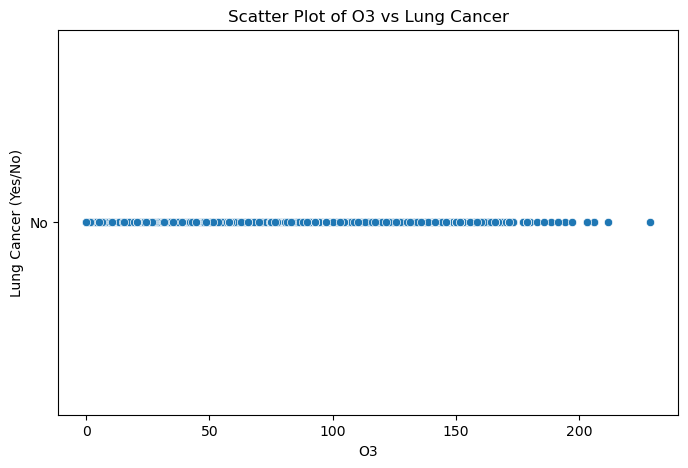

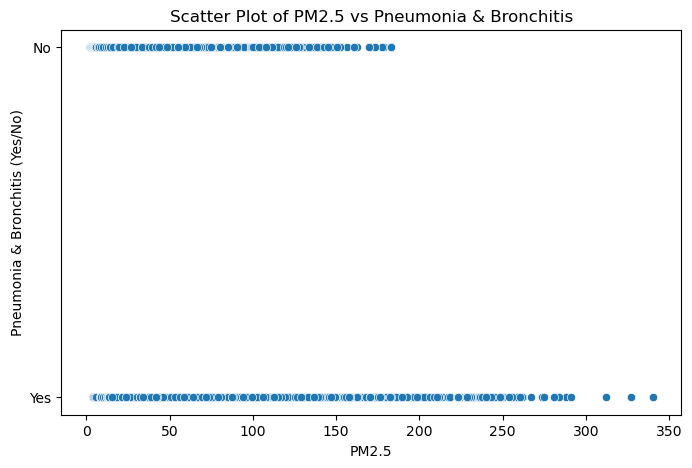

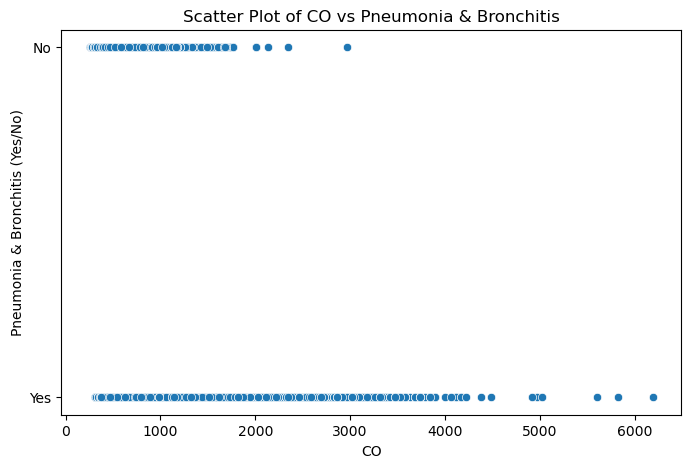

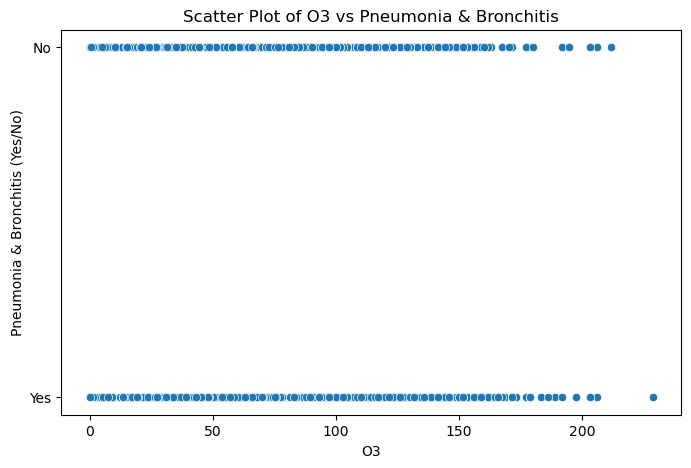

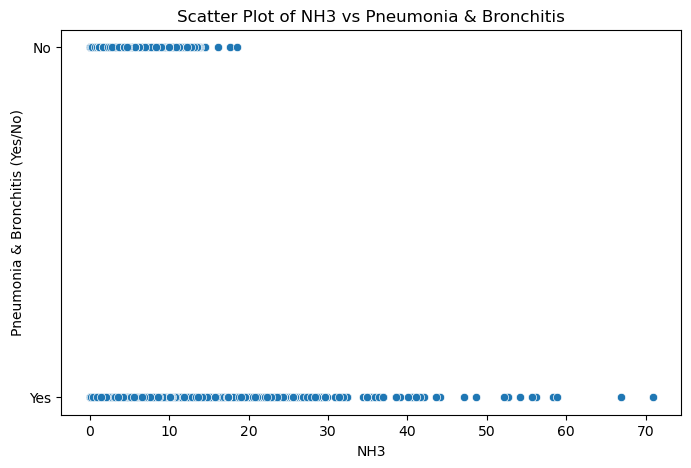

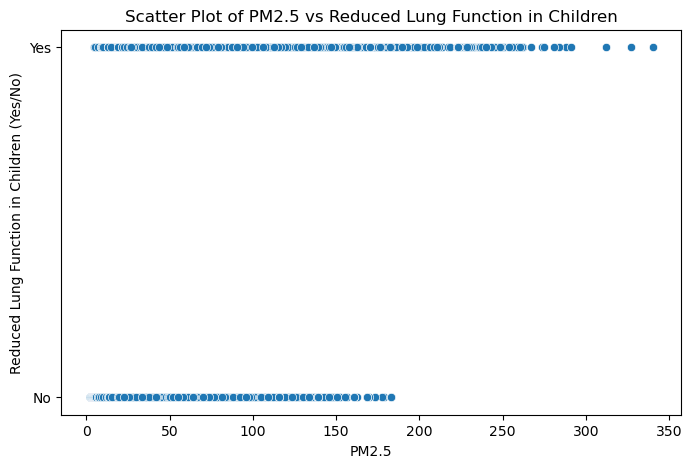

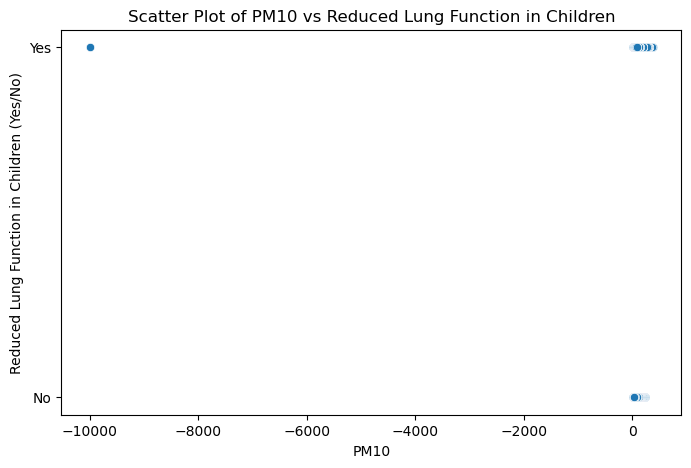

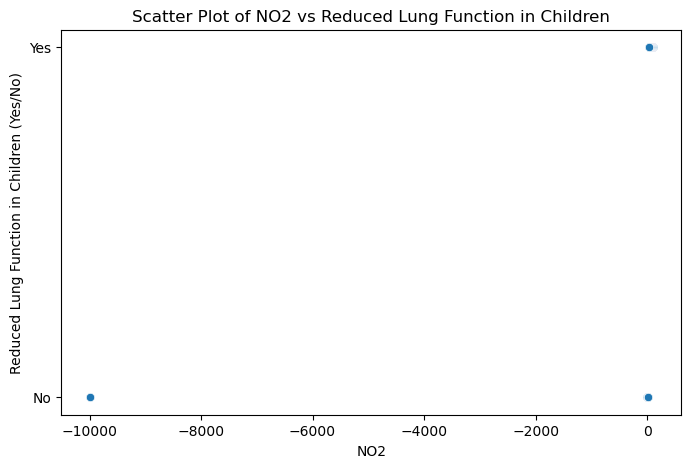

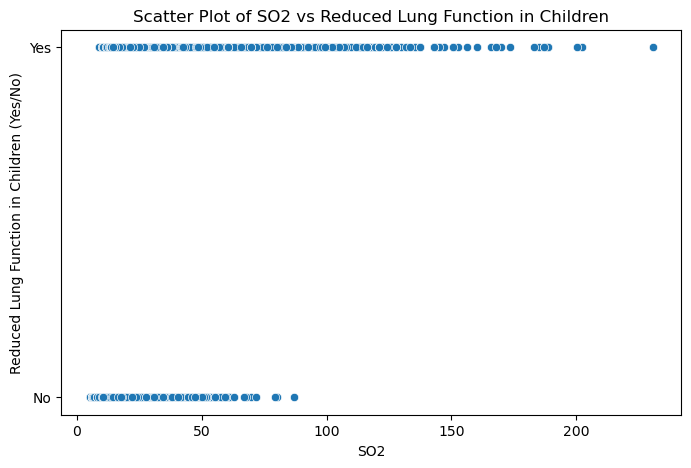

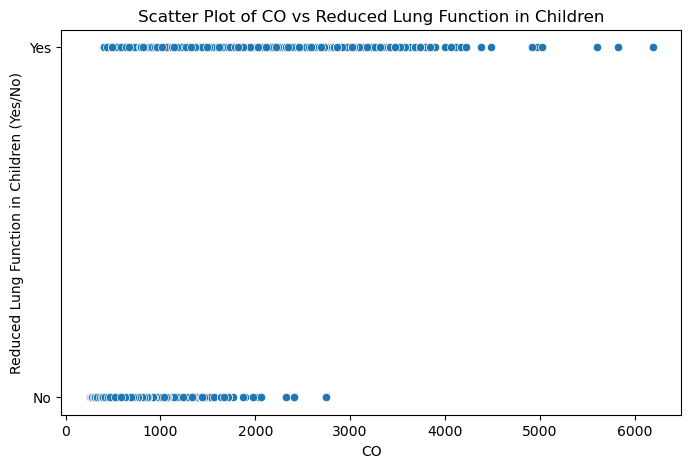

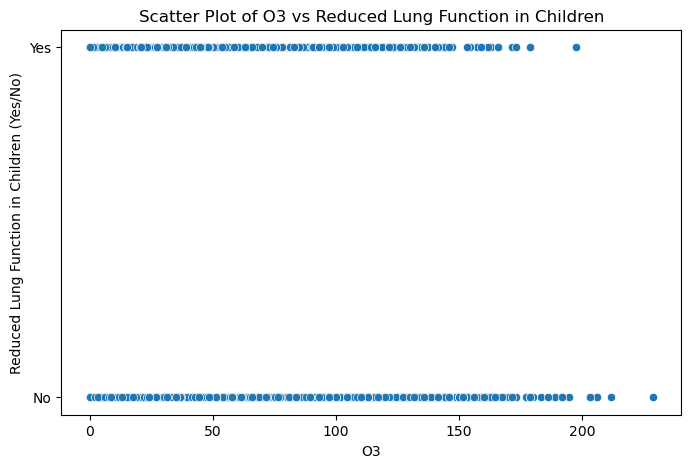

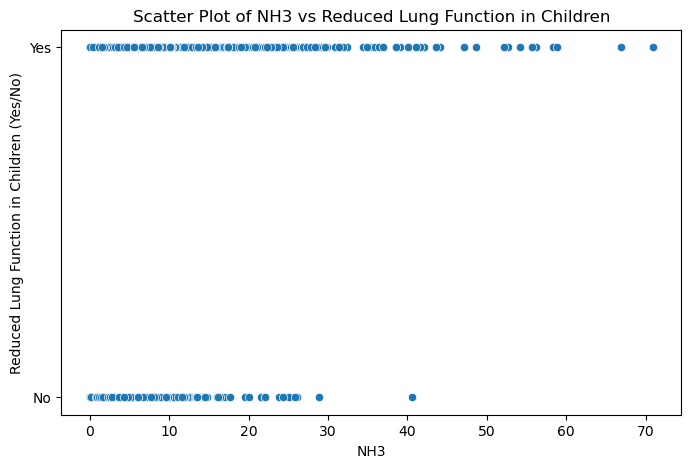

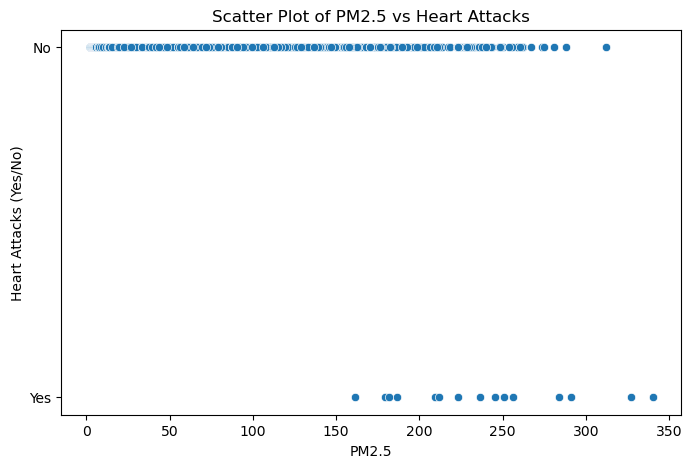

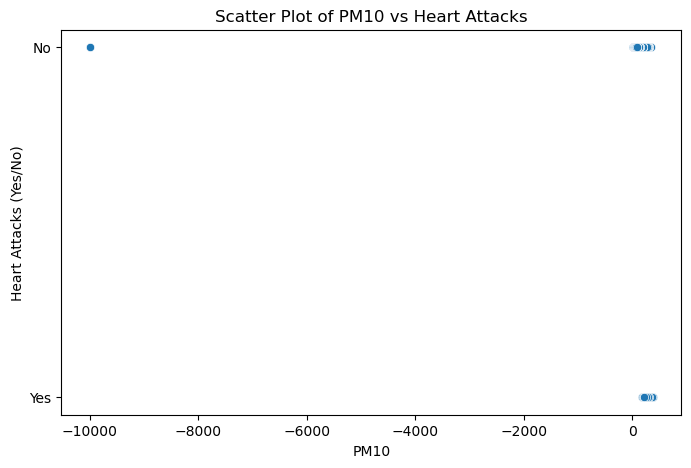

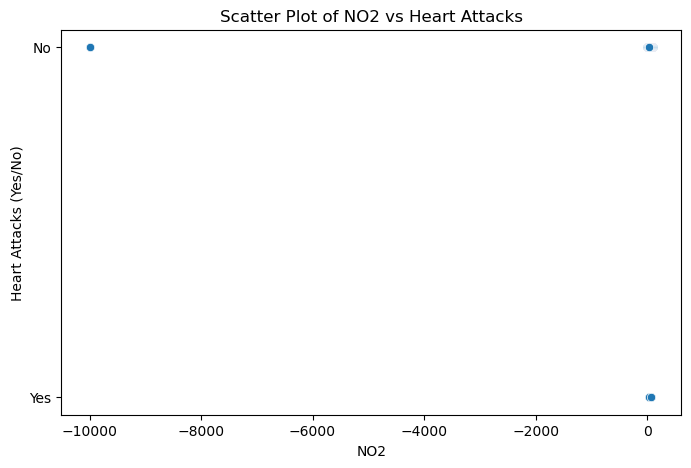

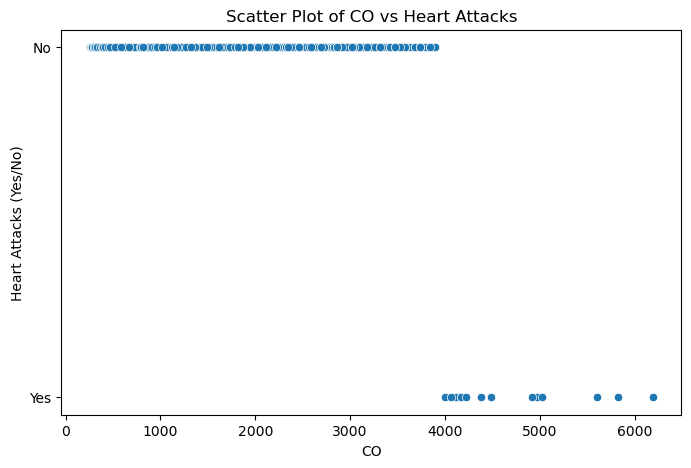

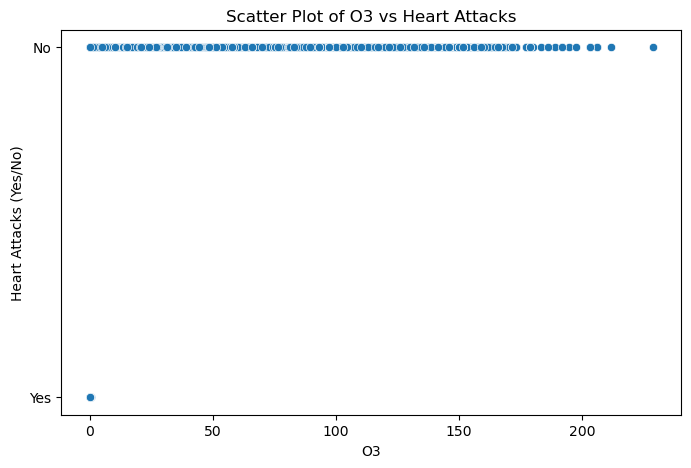

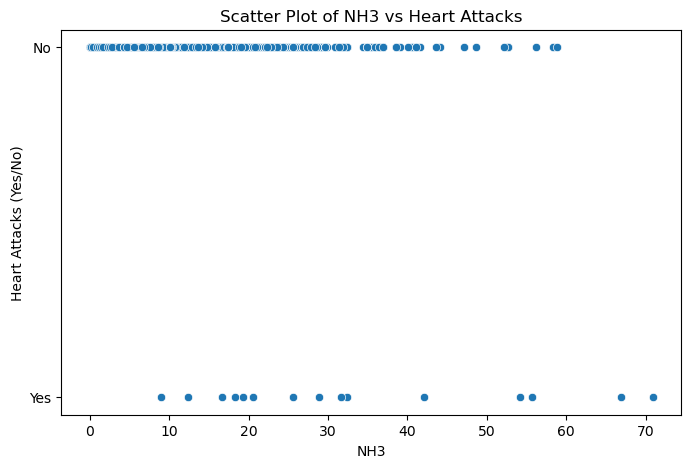

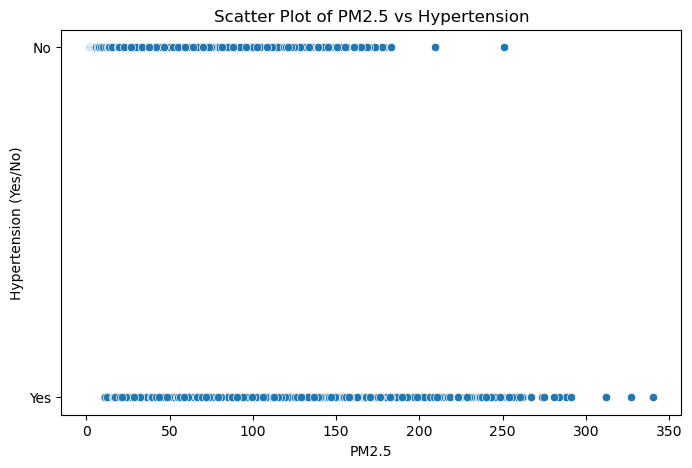

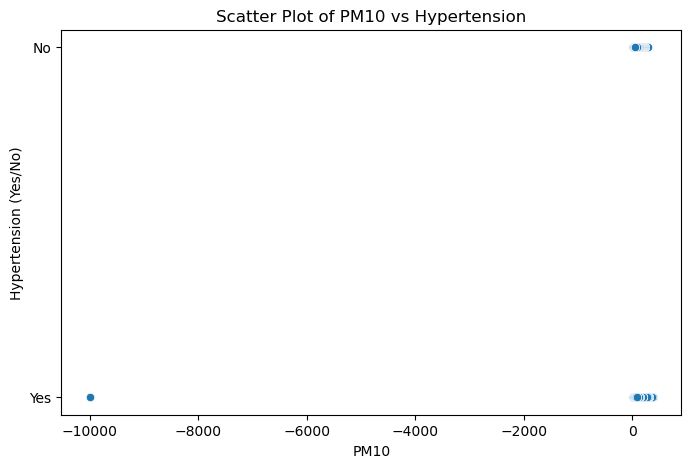

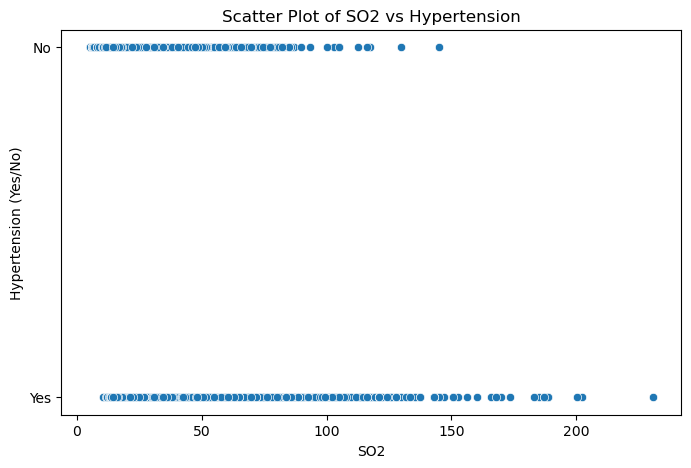

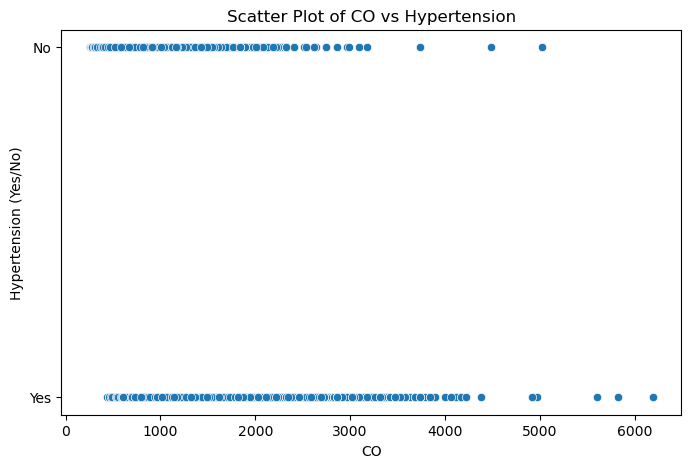

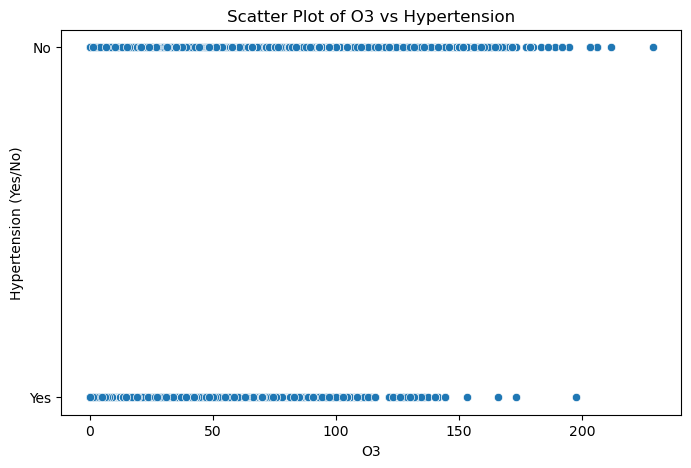

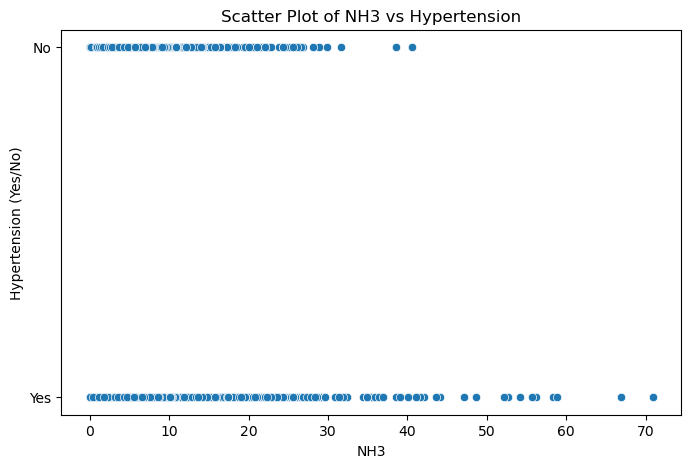

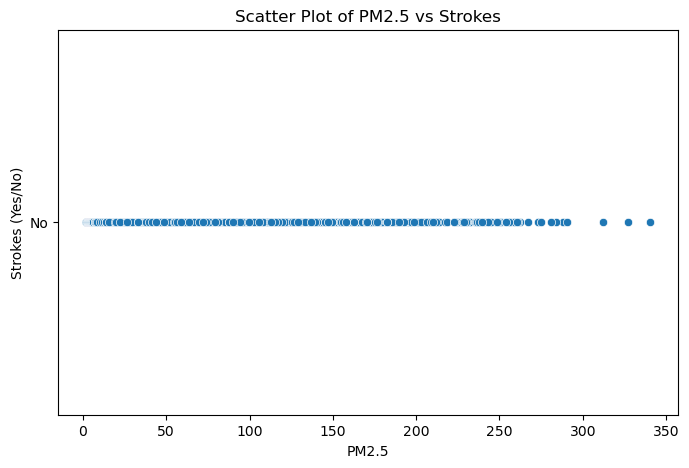

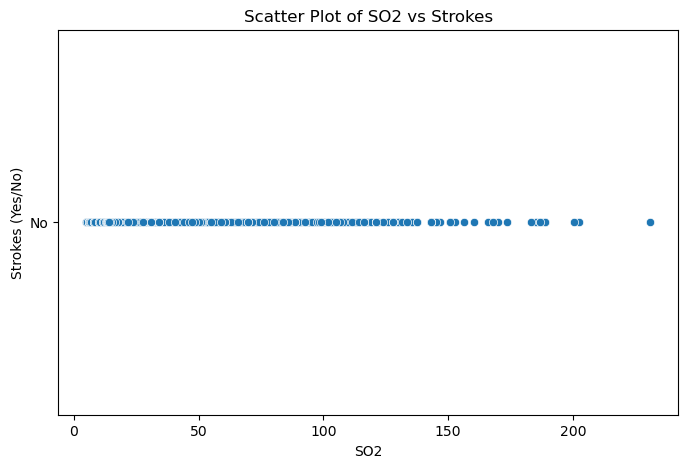

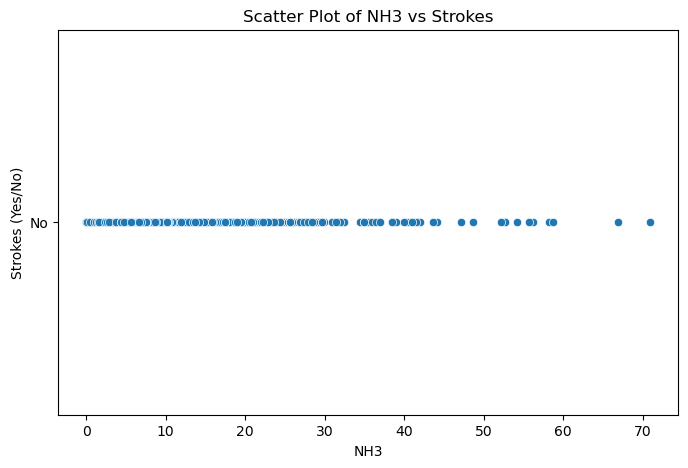

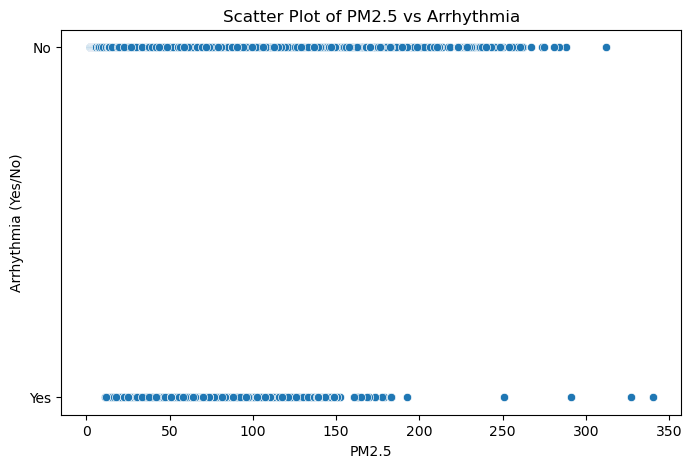

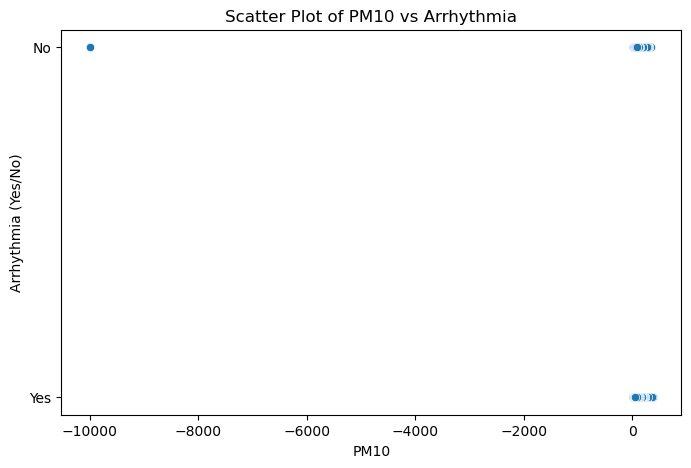

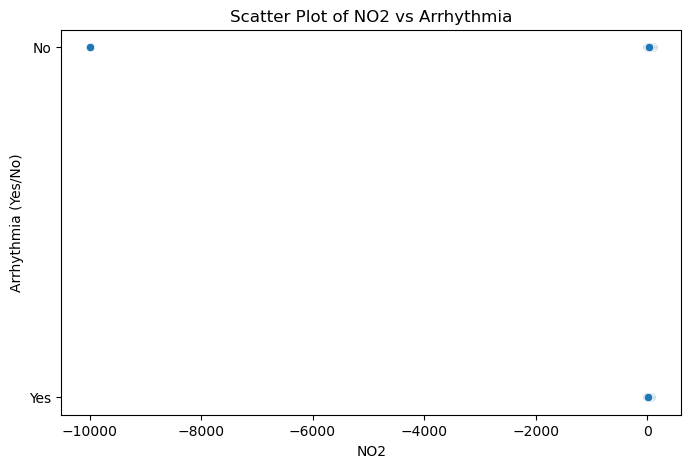

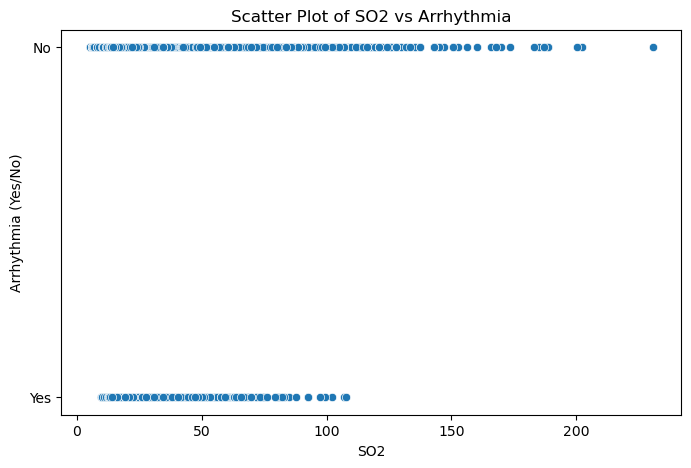

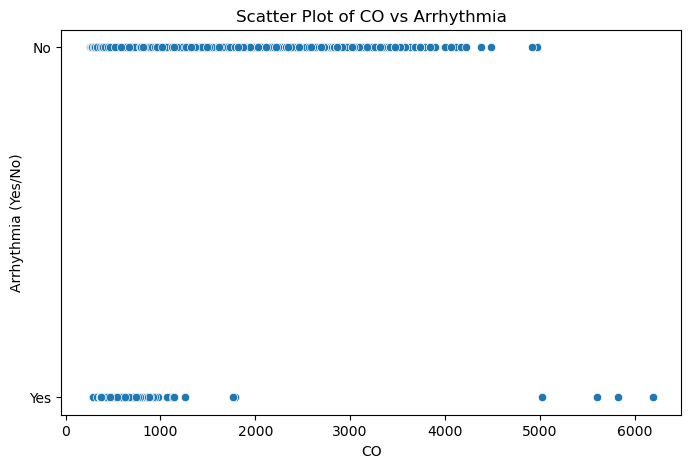

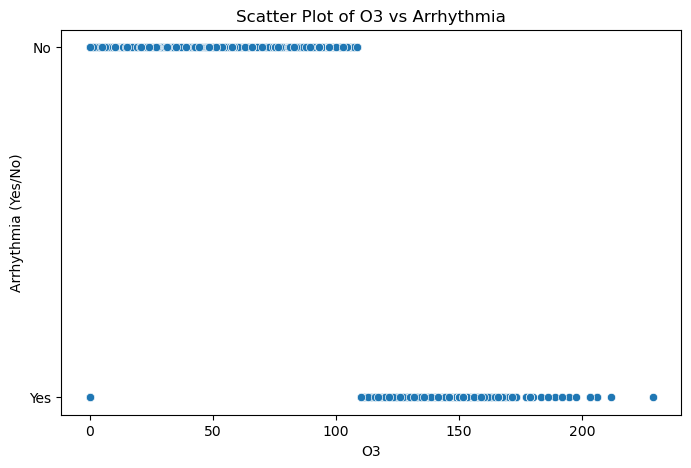

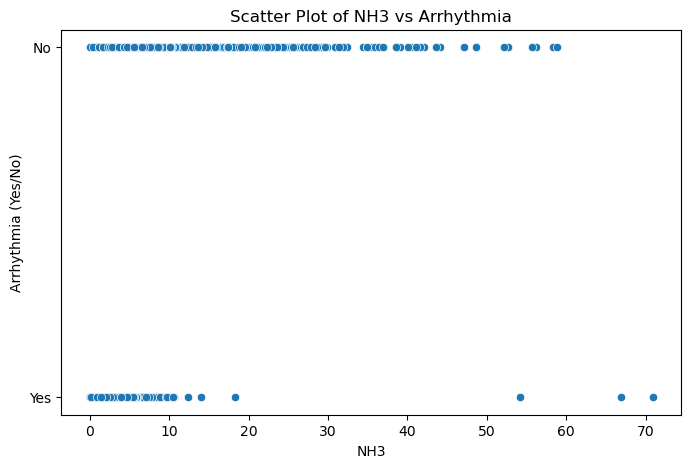

ValueError: Could not interpret value `Alzheimer & Dementia` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('air_pollution_2024_2025(main).csv')

pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3']

diseases = ['Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis', 'Reduced Lung Function in Children', 'Heart Attacks',
            'Hypertension', 'Strokes', 'Arrhythmia', 'Alzheimer & Dementia', 'Parkinson Disease',
            'Cognitive Impairment in Children', 'Low Birth Weight', 'Preterm Births', 'Sudden Infant Death Syndrome (SIDS)', 'Bladder Cancer',
            'Diabetes', 'Eye & Skin Irritation']

for disease in diseases:
    for pollutant in pollutants:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=pollutant, y=disease)
        plt.title(f'Scatter Plot of {pollutant} vs {disease}')
        plt.xlabel(pollutant)
        plt.ylabel(f'{disease} (Yes/No)')
        plt.show()

In [33]:
df.select_dtypes(include=["number","object"]).columns

Index(['timestamp', 'AQI', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10',
       'NH3', 'Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis',
       'Reduced Lung Function in Children', 'Heart Attacks', 'Hypertension',
       'Strokes', 'Arrhythmia', 'Alzheimer’s & Dementia',
       'Parkinson’s Disease', 'Cognitive Impairment in Children',
       'Low Birth Weight', 'Preterm Births',
       'Sudden Infant Death Syndrome (SIDS)', 'Bladder Cancer', 'Diabetes',
       'Eye & Skin Irritation'],
      dtype='object')

In [35]:
s = df.select_dtypes(include="number").corr()

<Axes: >

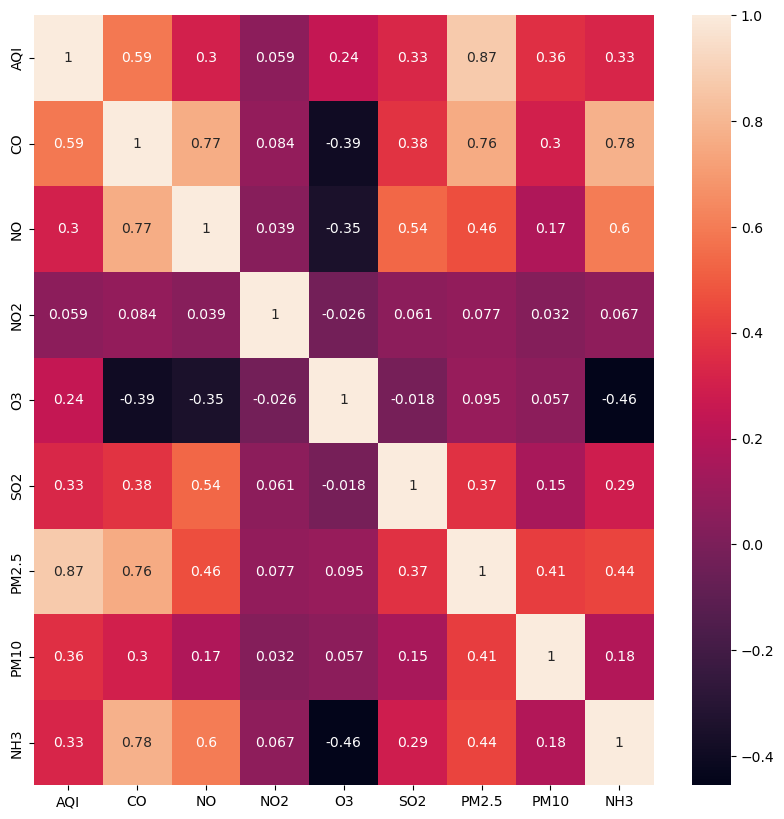

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

In [ ]:
df.isnull().sum()

In [39]:
import pandas as pd
import numpy as np

def wisker(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

for col in df.select_dtypes(include=['number']).columns:
    lower_bound, upper_bound = wisker(col)
    print(f"{col} -> Lower bound: {lower_bound}, Upper bound: {upper_bound}")

AQI -> Lower bound: -1.0, Upper bound: 7.0
CO -> Lower bound: -146.86000000000007, Upper bound: 1455.3000000000002
NO -> Lower bound: -5.210000000000001, Upper bound: 8.71
NO2 -> Lower bound: -11.7025, Upper bound: 57.8775
O3 -> Lower bound: -77.08, Upper bound: 167.56
SO2 -> Lower bound: -7.389999999999999, Upper bound: 51.73
PM2.5 -> Lower bound: -60.3475, Upper bound: 143.0325
PM10 -> Lower bound: -70.46875, Upper bound: 172.38125
NH3 -> Lower bound: -3.533750000000001, Upper bound: 12.63625


In [41]:
df.columns

Index(['timestamp', 'AQI', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10',
       'NH3', 'Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis',
       'Reduced Lung Function in Children', 'Heart Attacks', 'Hypertension',
       'Strokes', 'Arrhythmia', 'Alzheimer’s & Dementia',
       'Parkinson’s Disease', 'Cognitive Impairment in Children',
       'Low Birth Weight', 'Preterm Births',
       'Sudden Infant Death Syndrome (SIDS)', 'Bladder Cancer', 'Diabetes',
       'Eye & Skin Irritation'],
      dtype='object')

In [43]:
import numpy as np

pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']

for col in pollutants:
    lower_bound, upper_bound = wisker(col)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


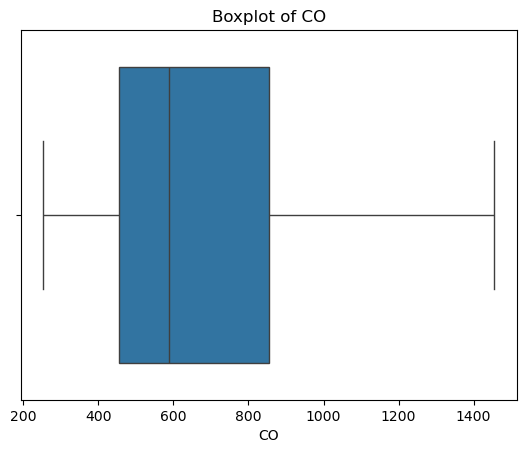

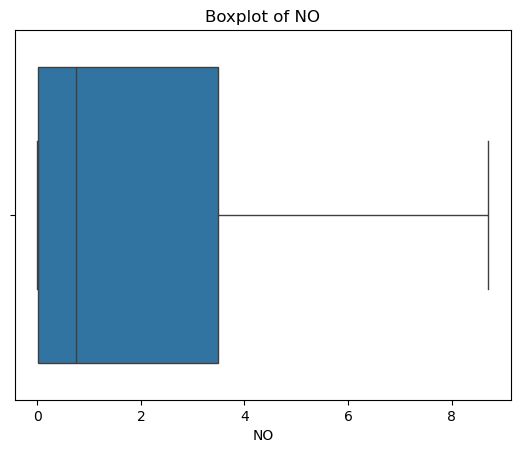

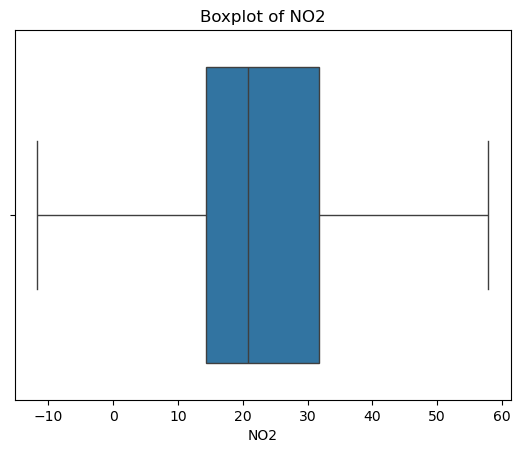

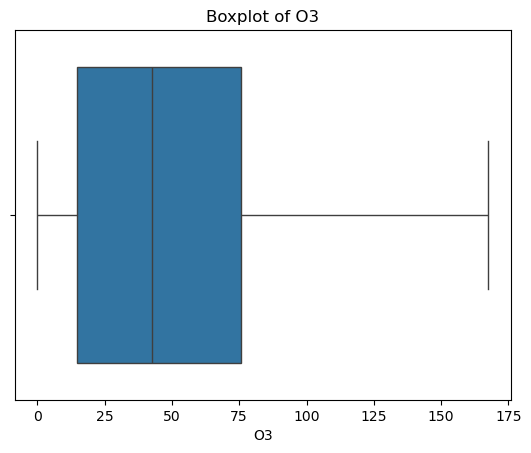

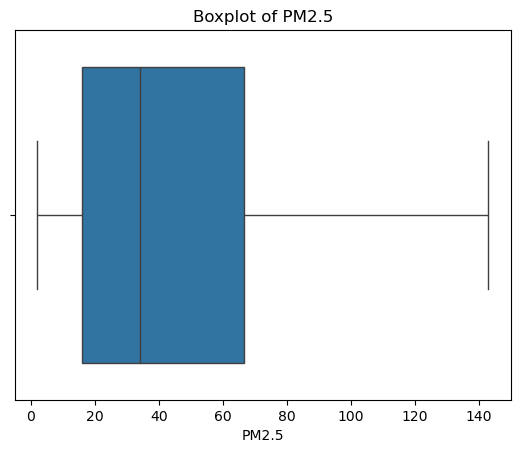

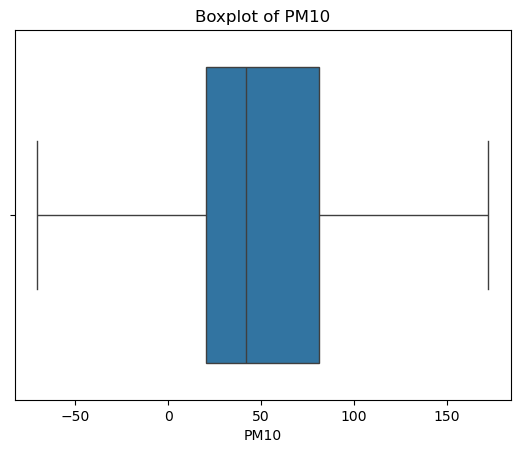

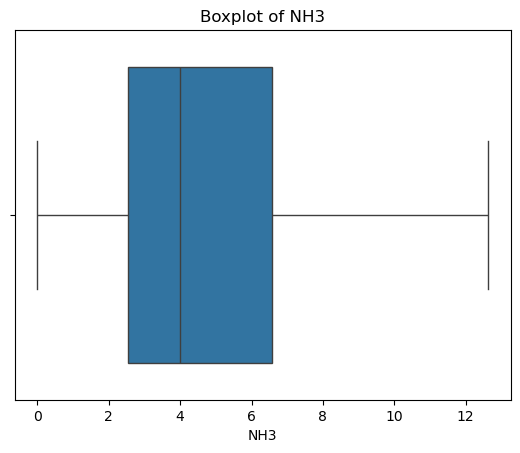

In [45]:
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']

for i in pollutants:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.show()


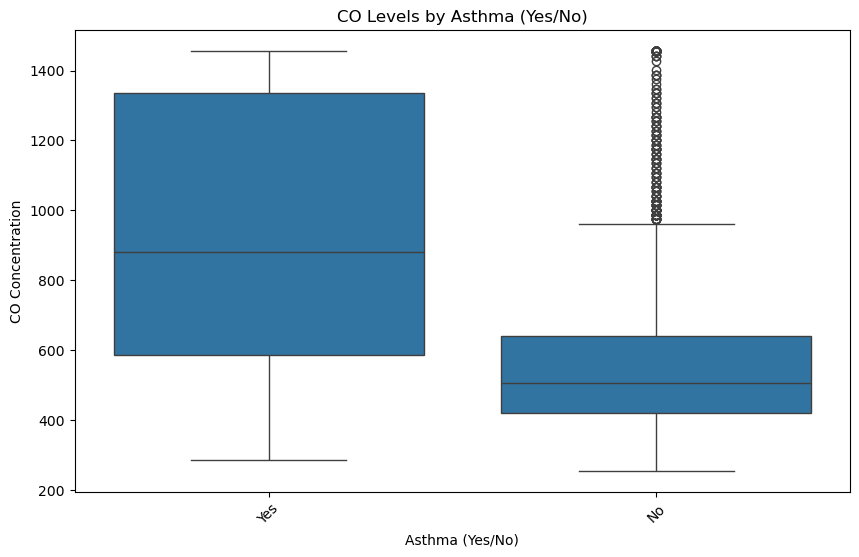

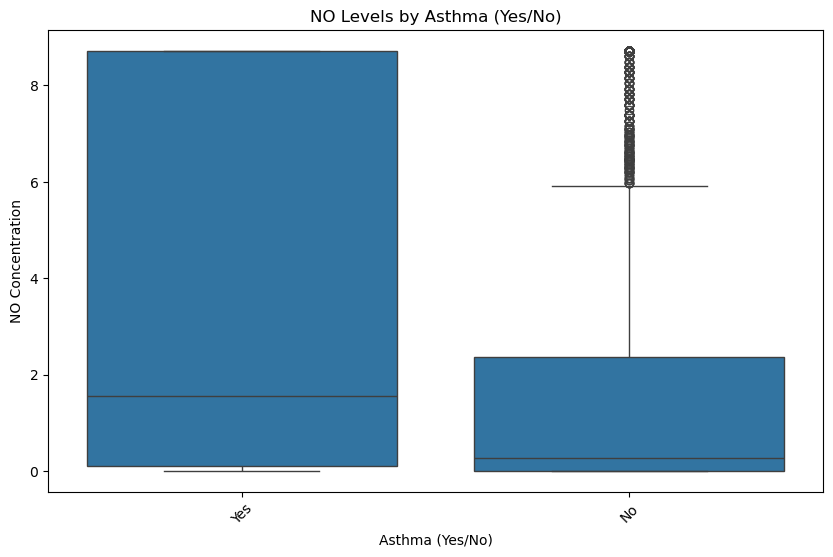

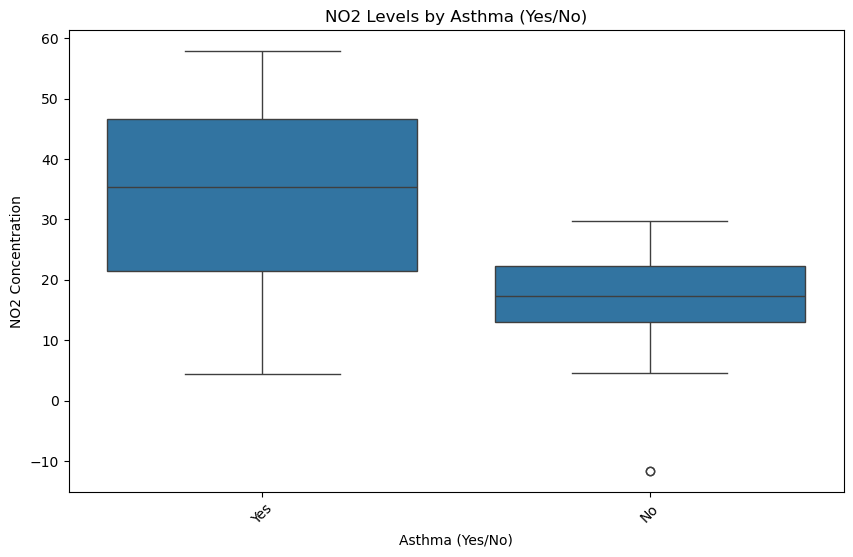

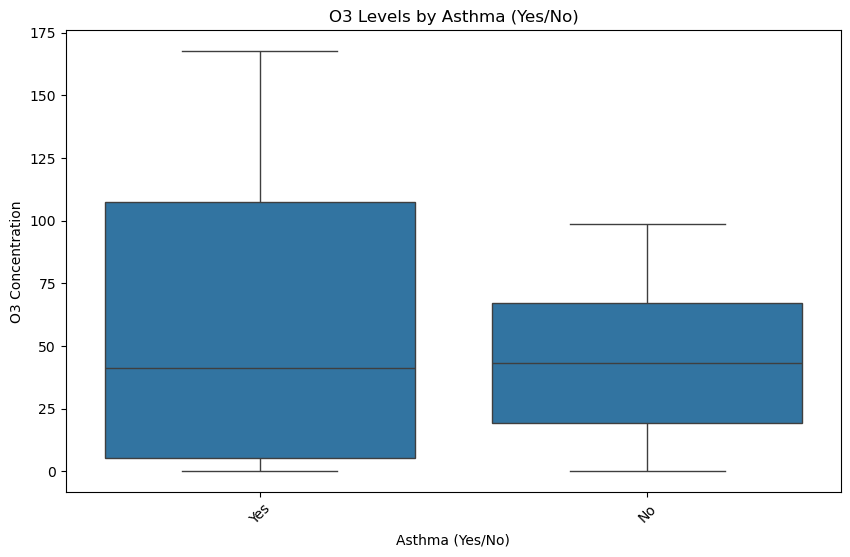

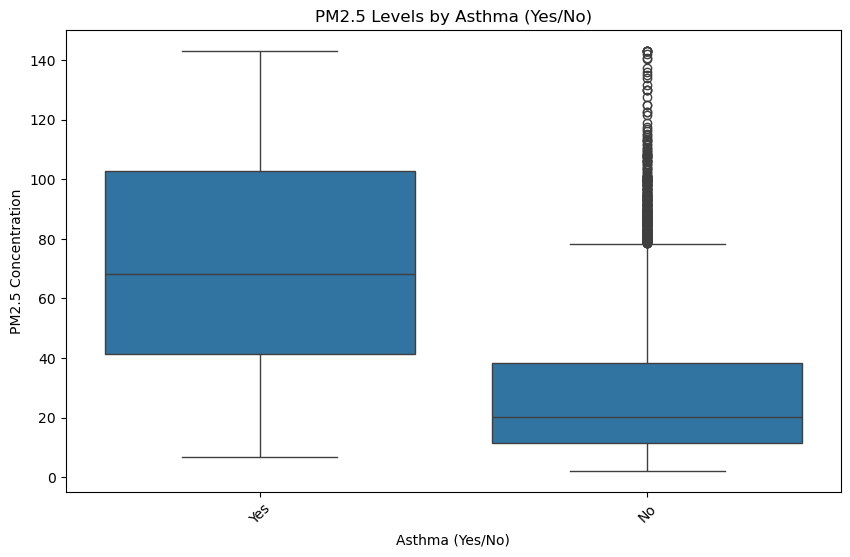

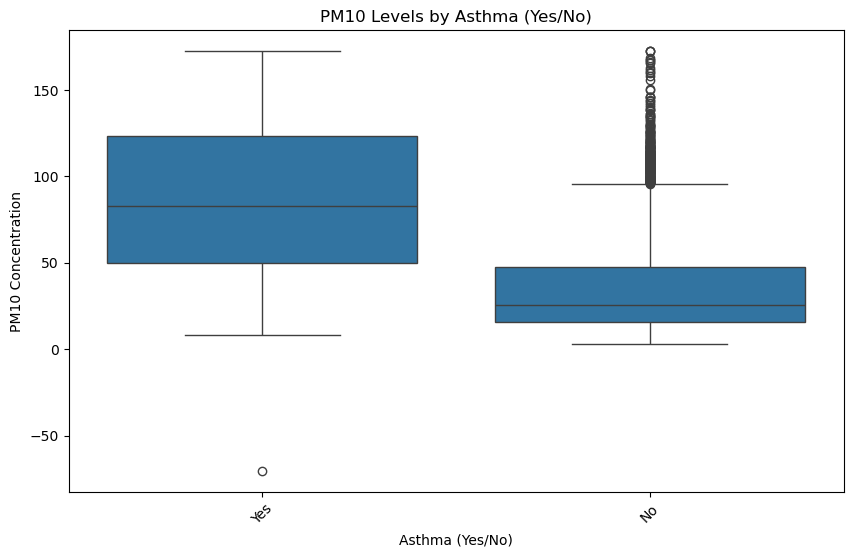

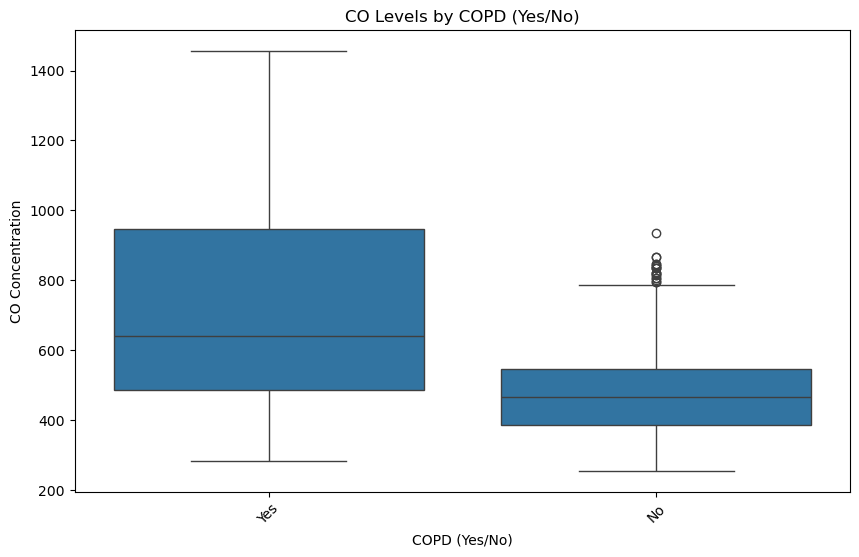

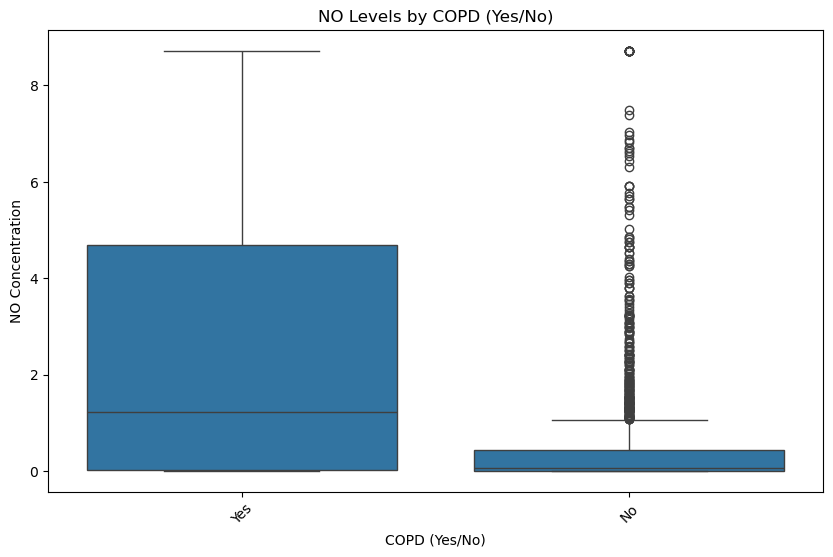

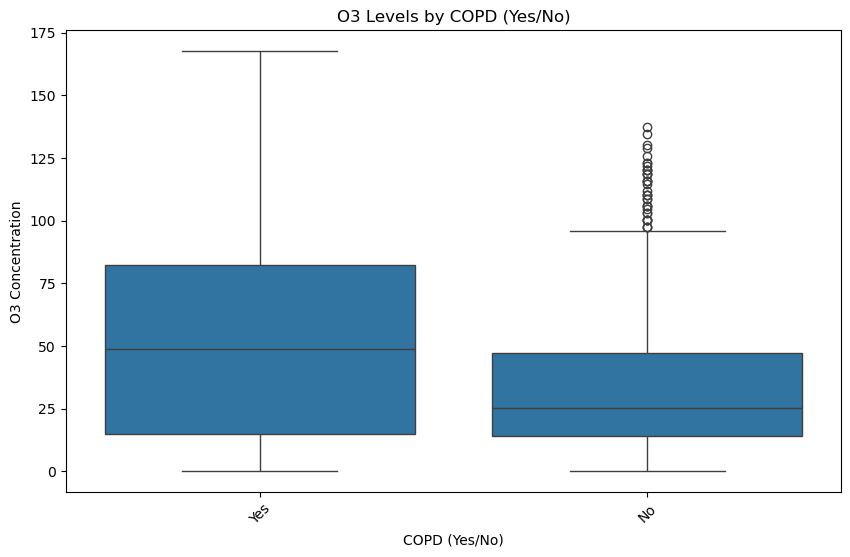

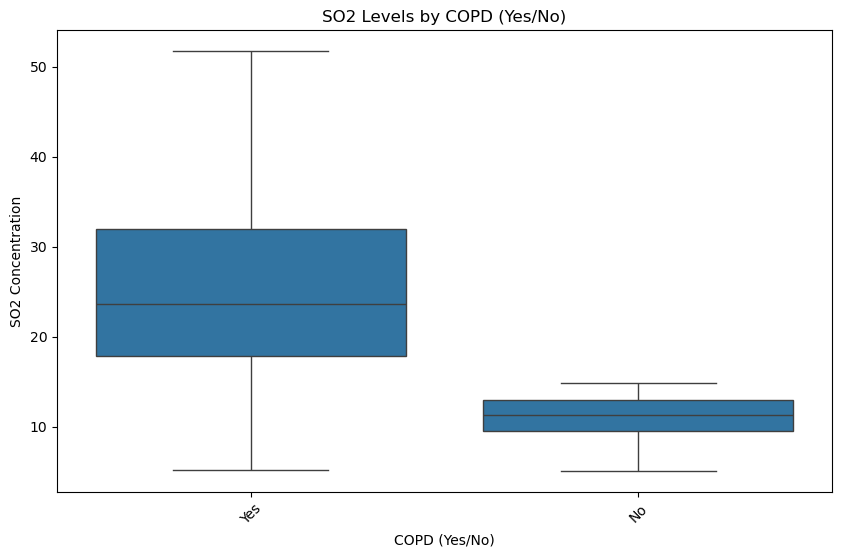

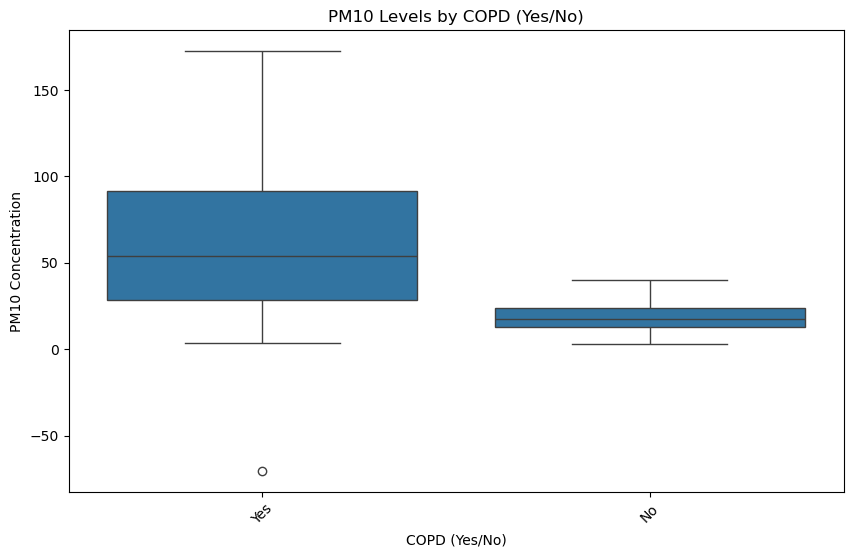

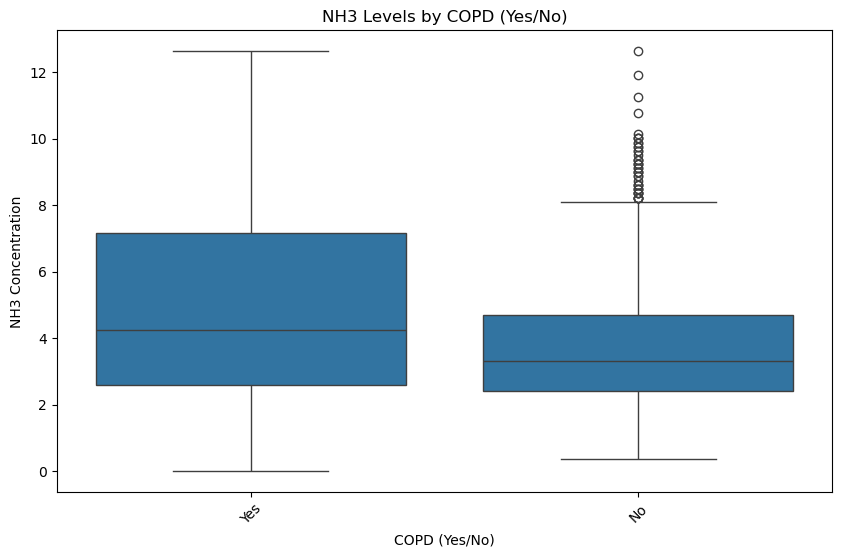

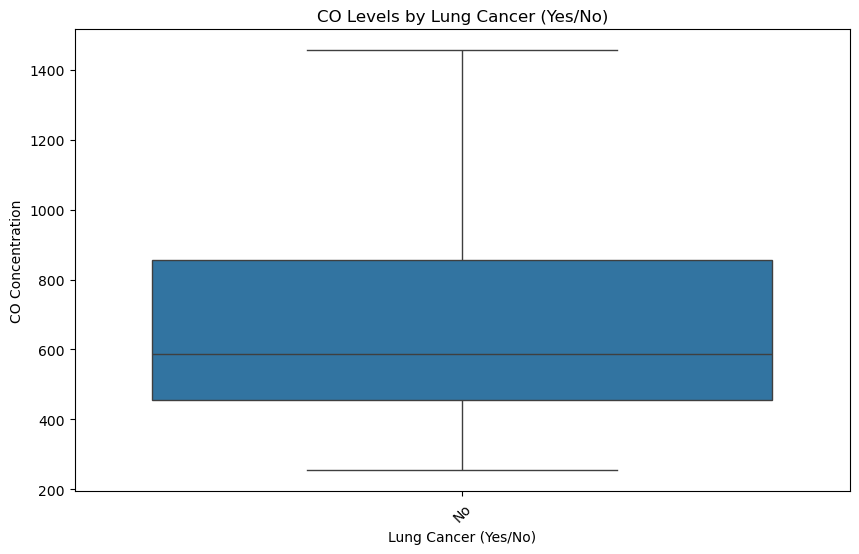

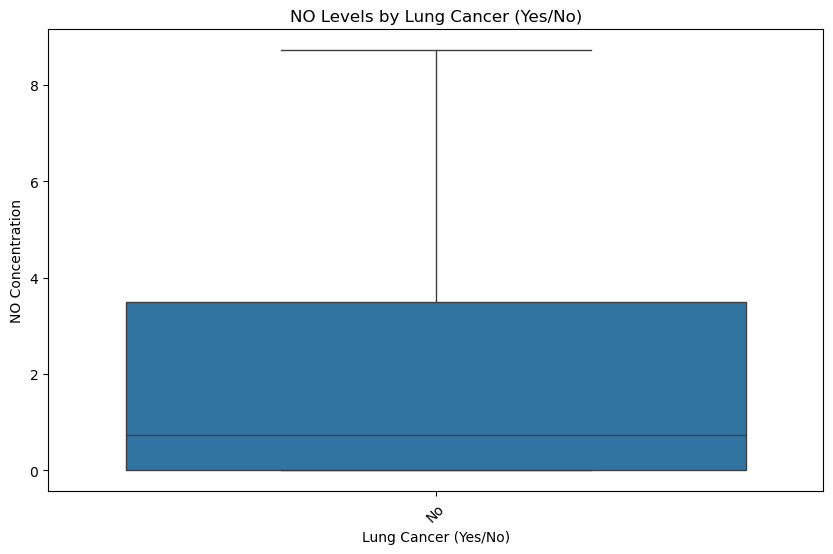

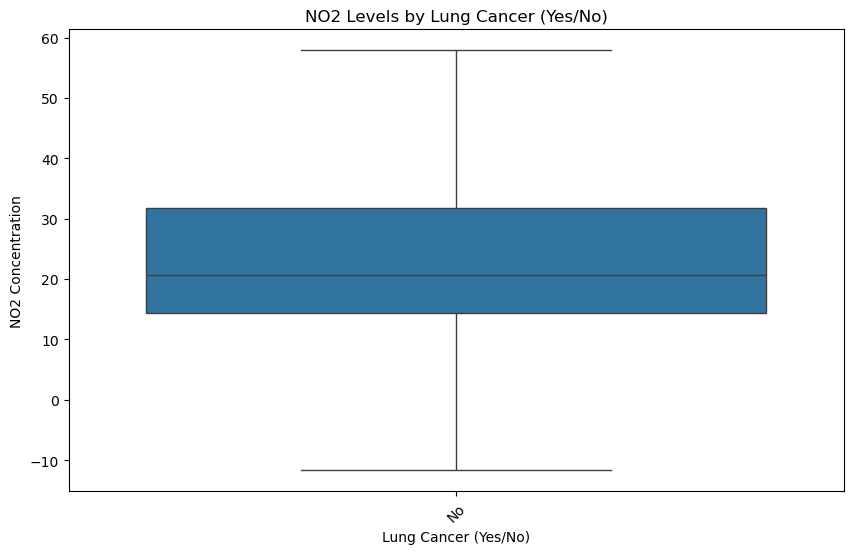

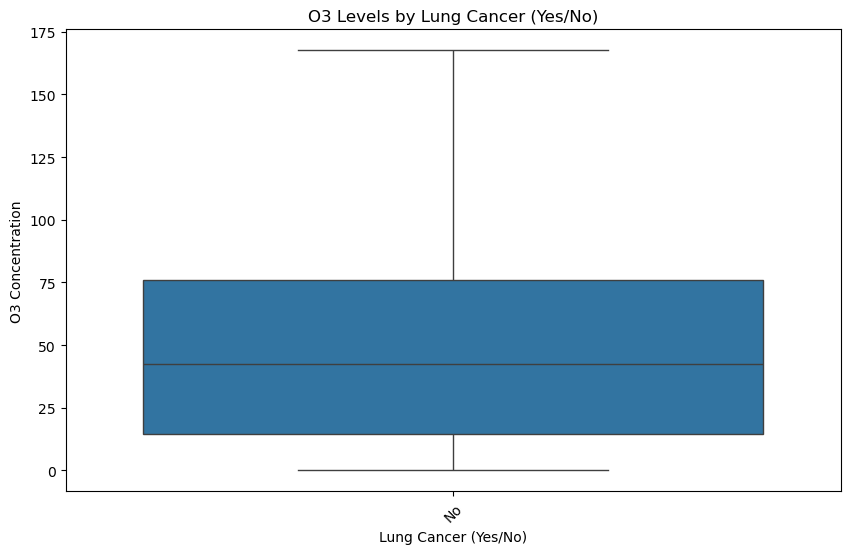

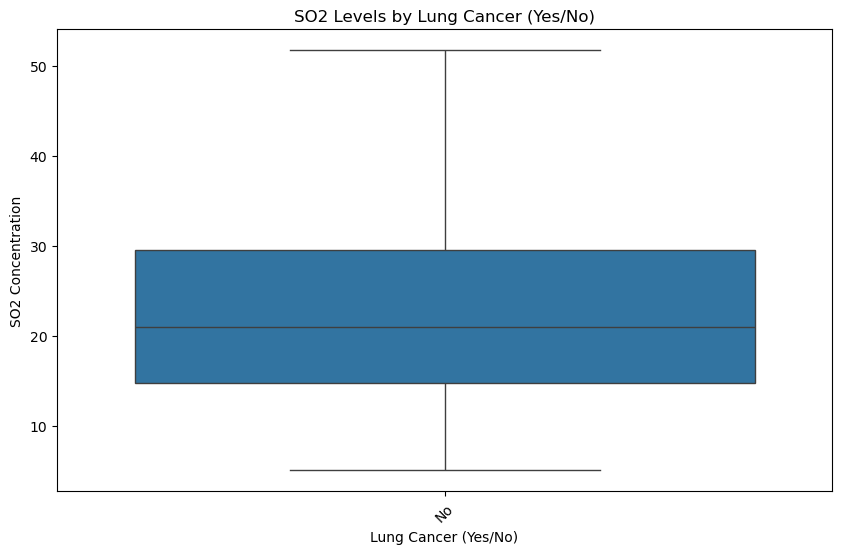

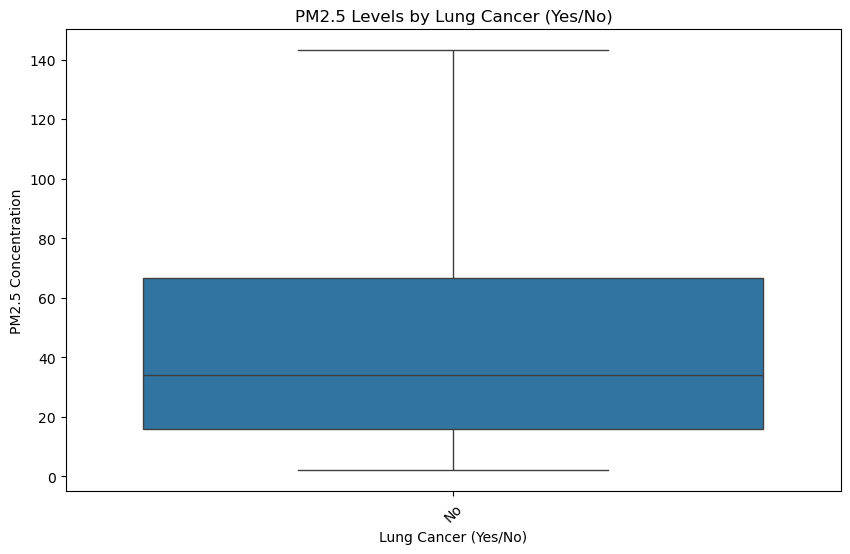

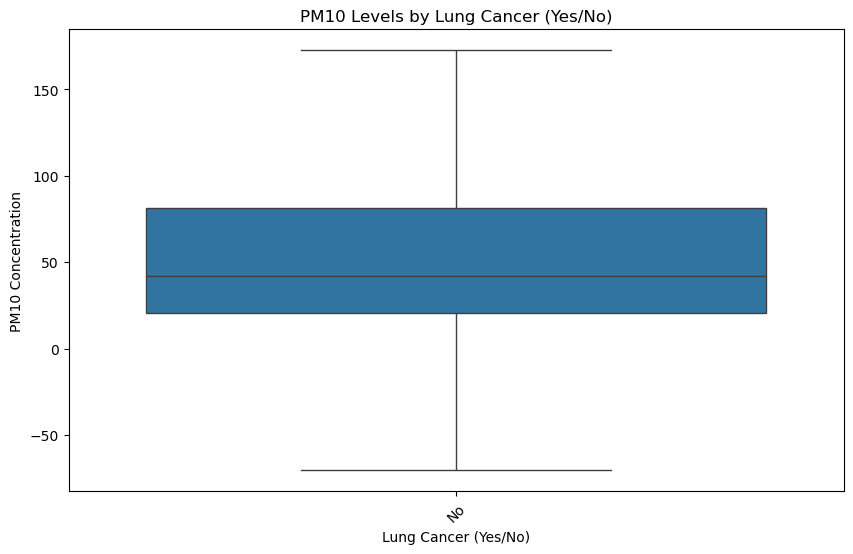

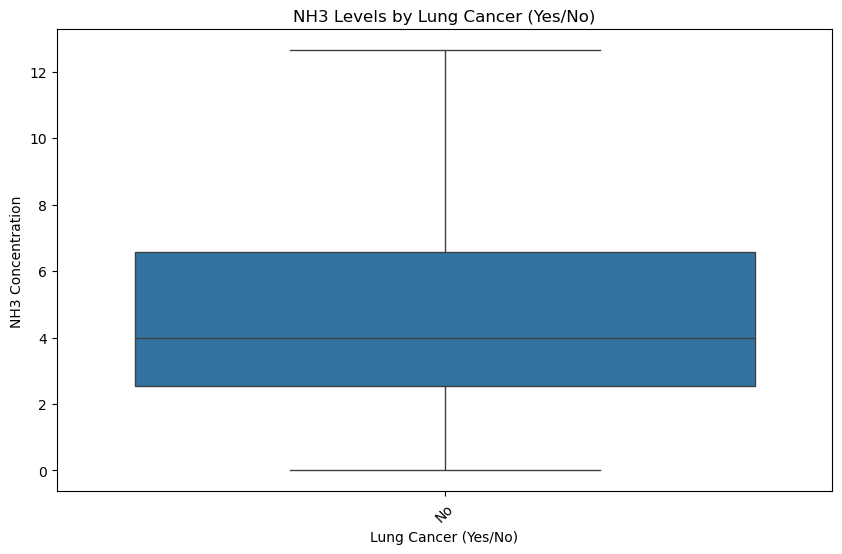

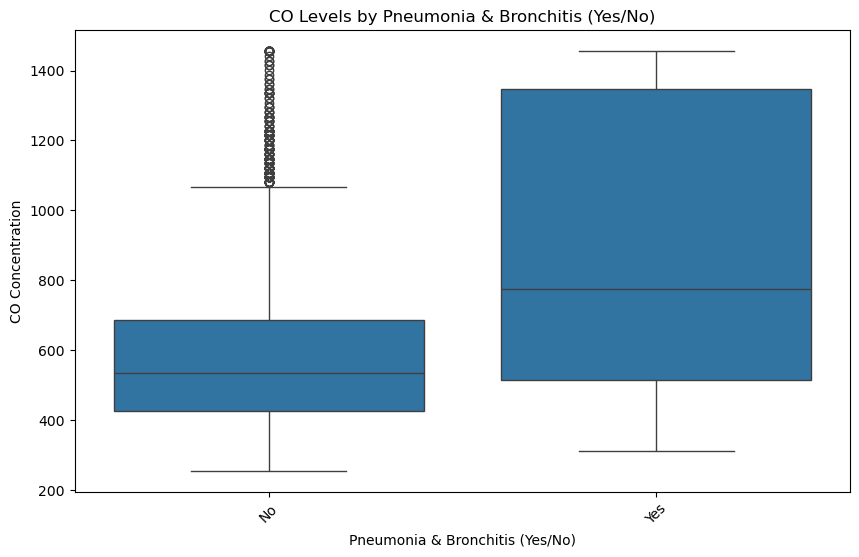

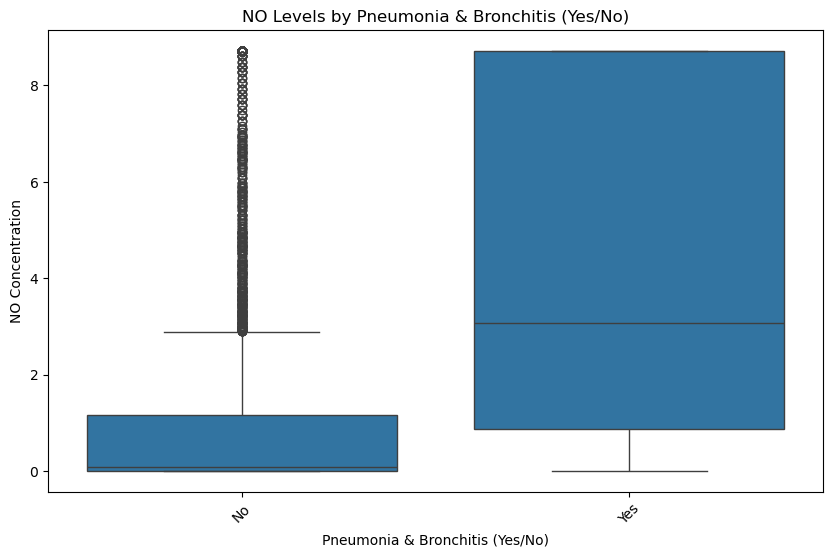

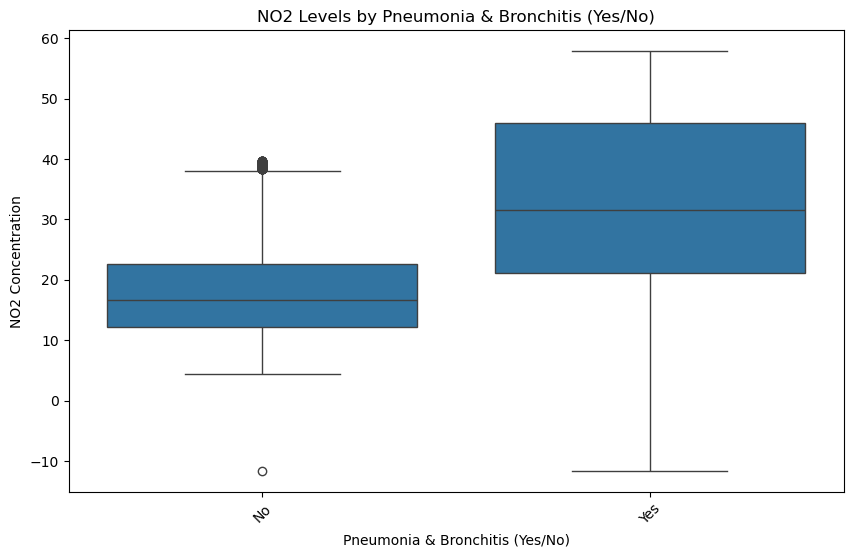

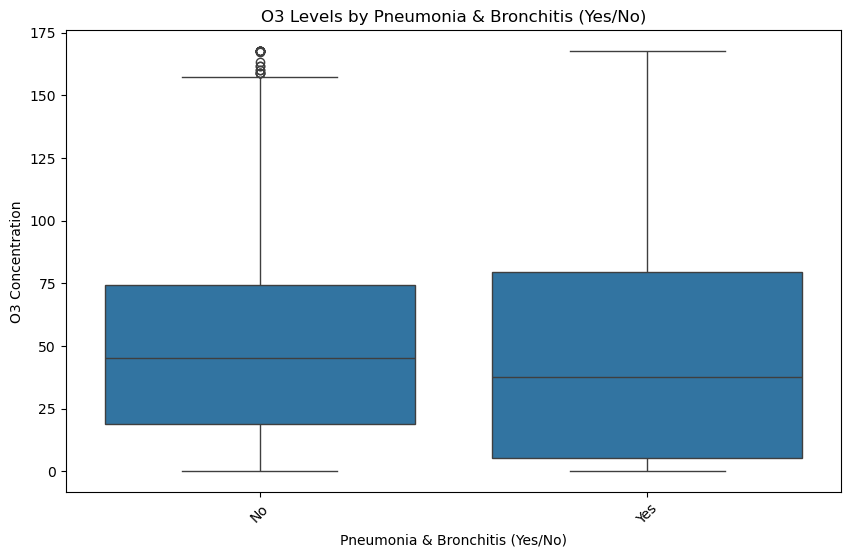

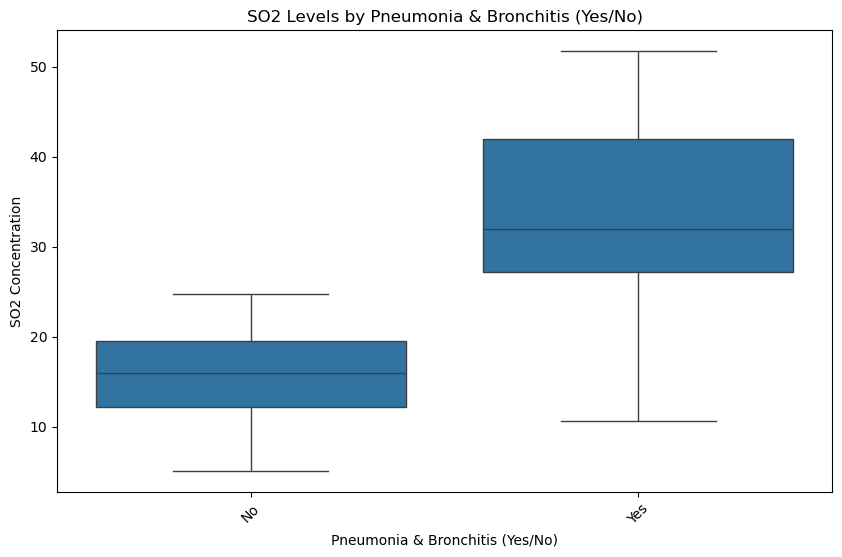

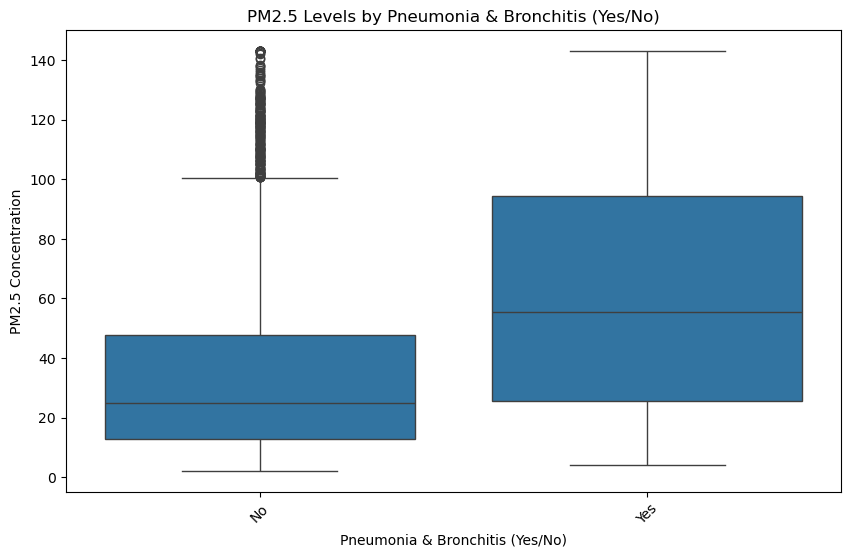

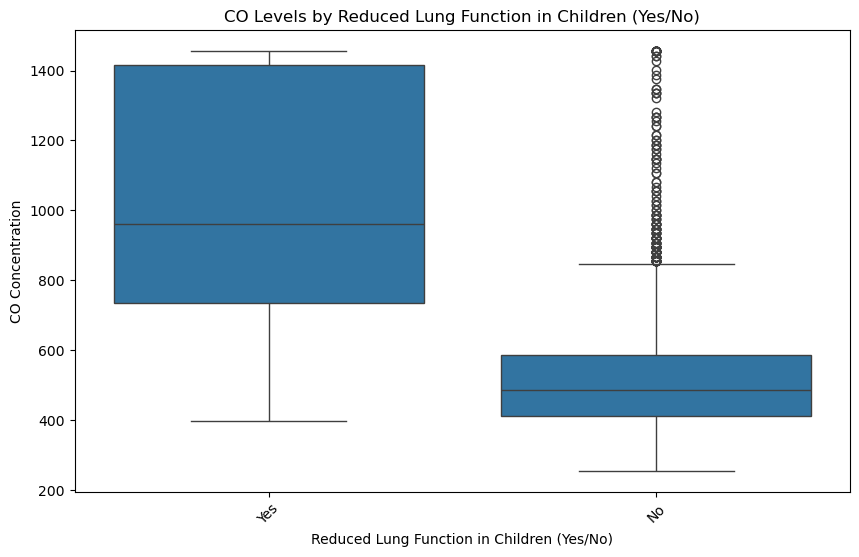

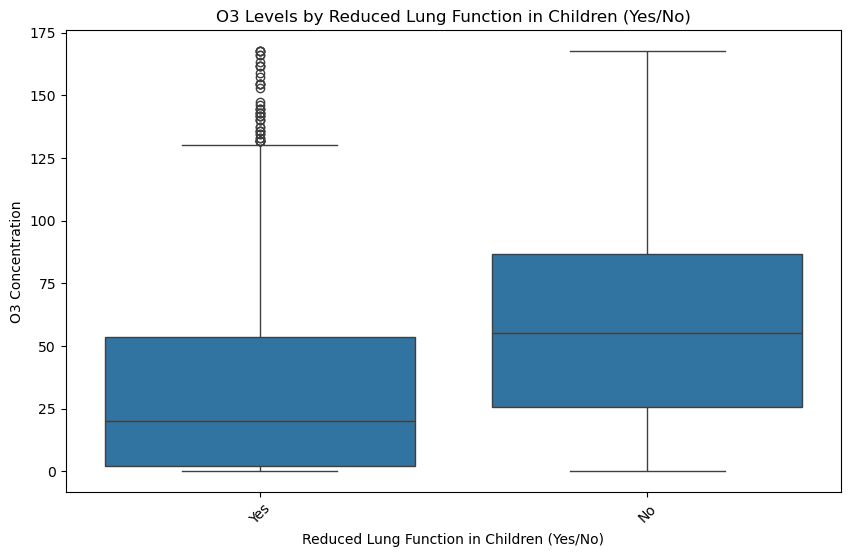

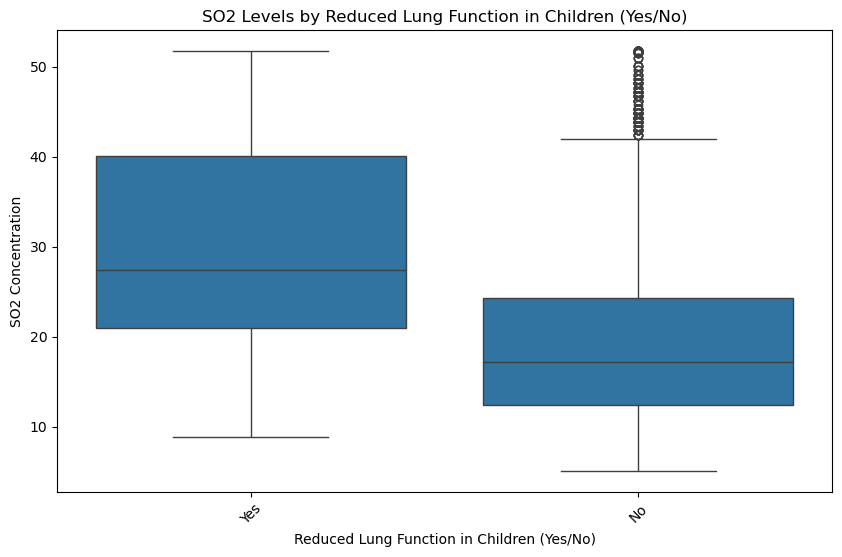

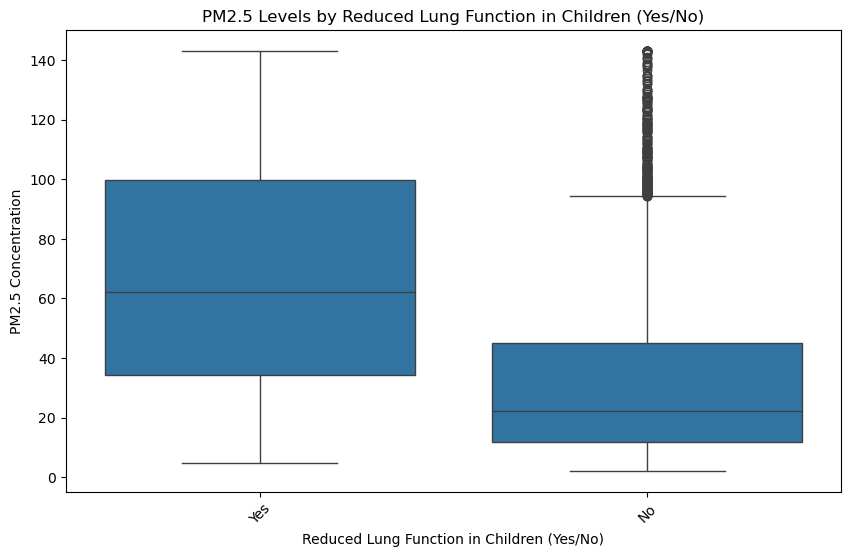

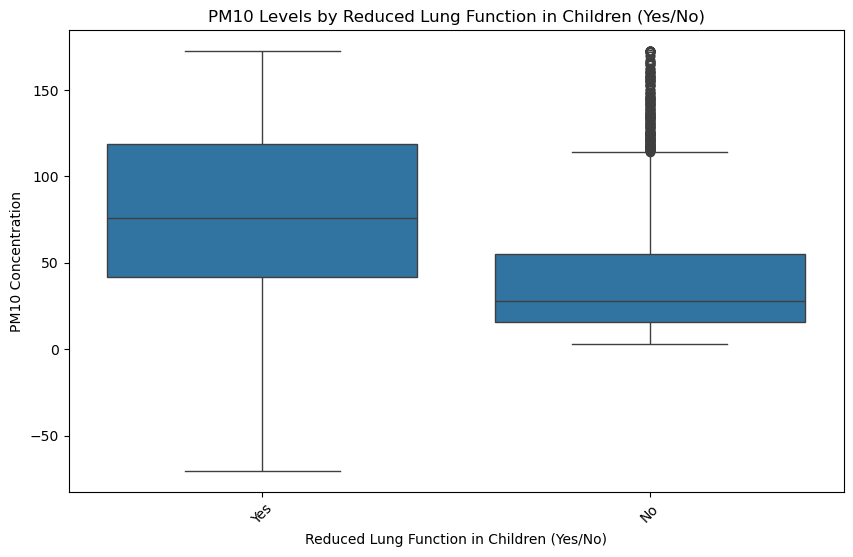

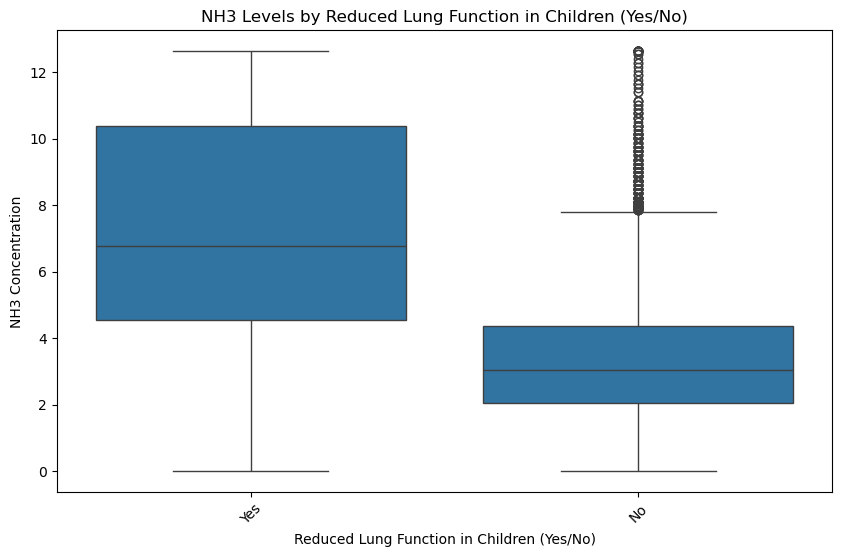

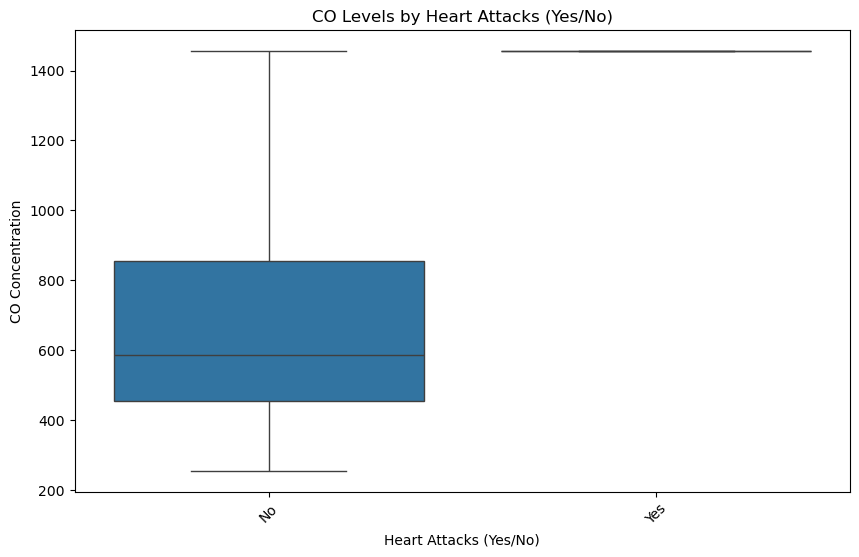

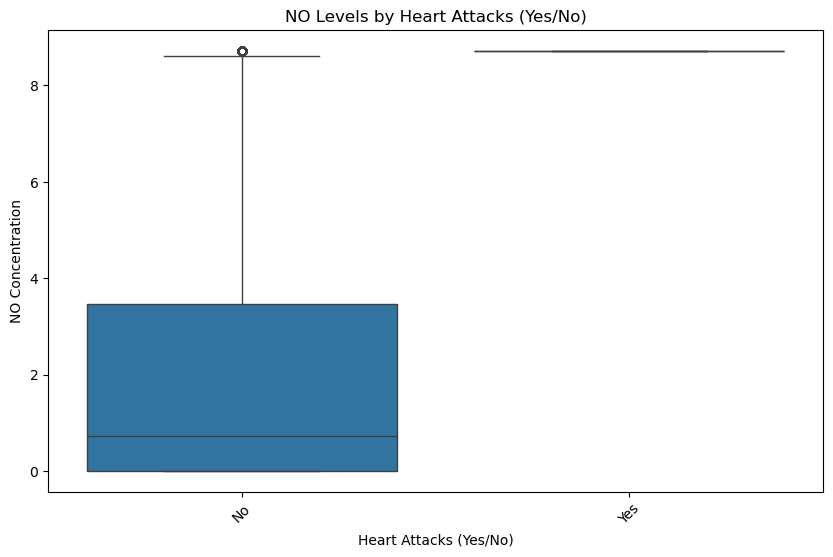

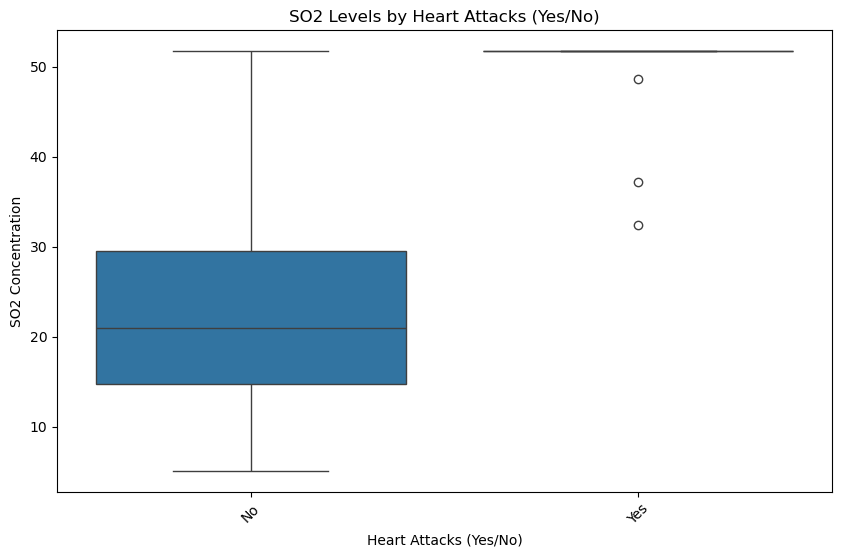

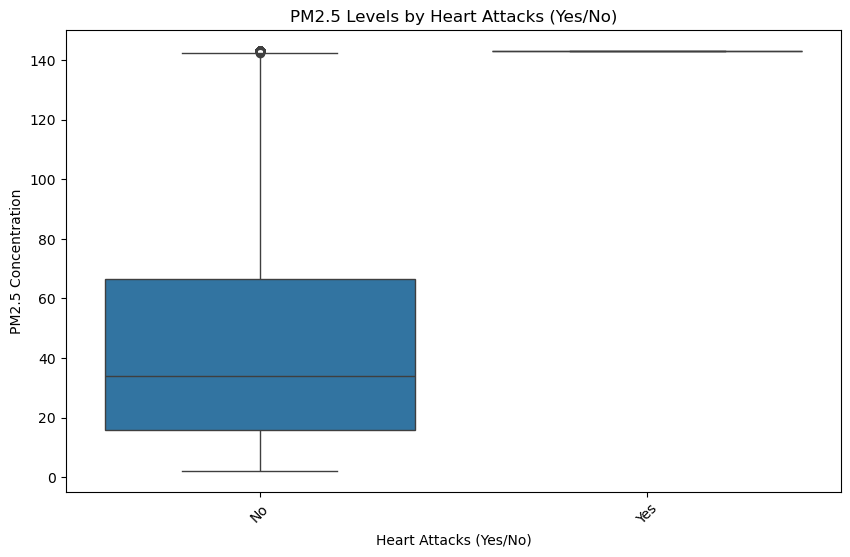

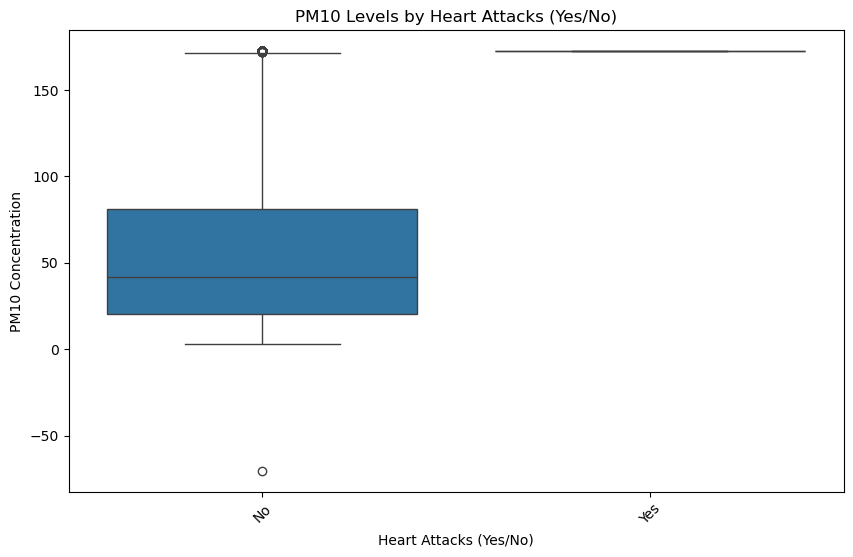

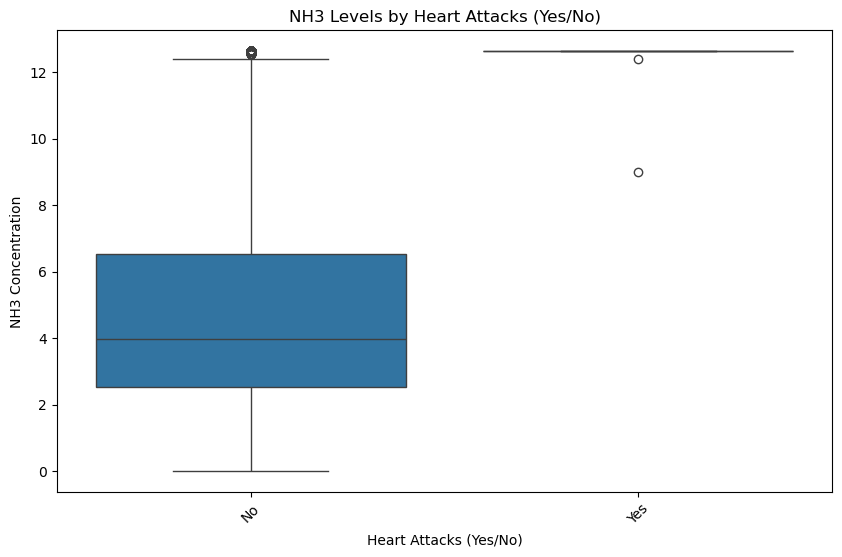

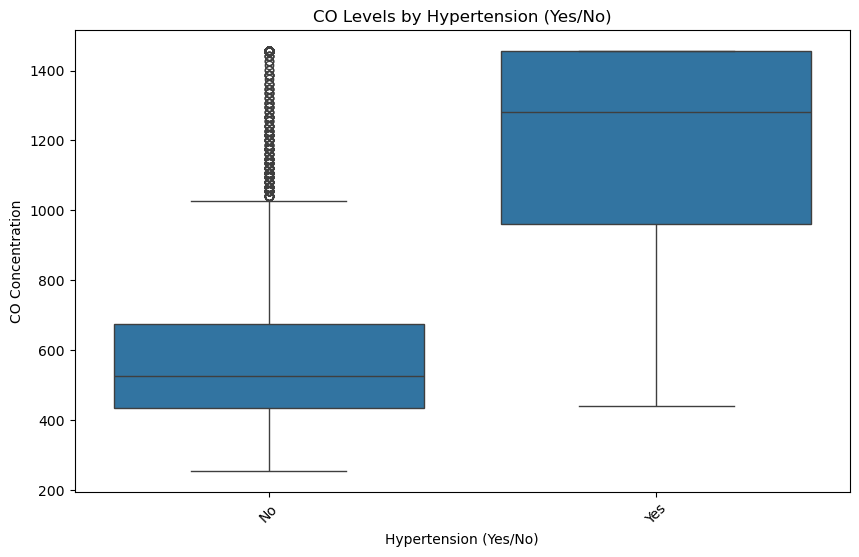

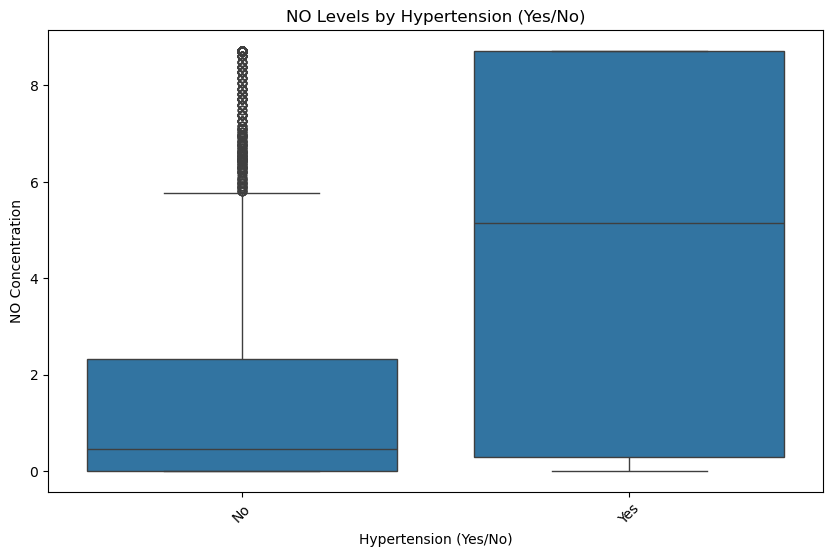

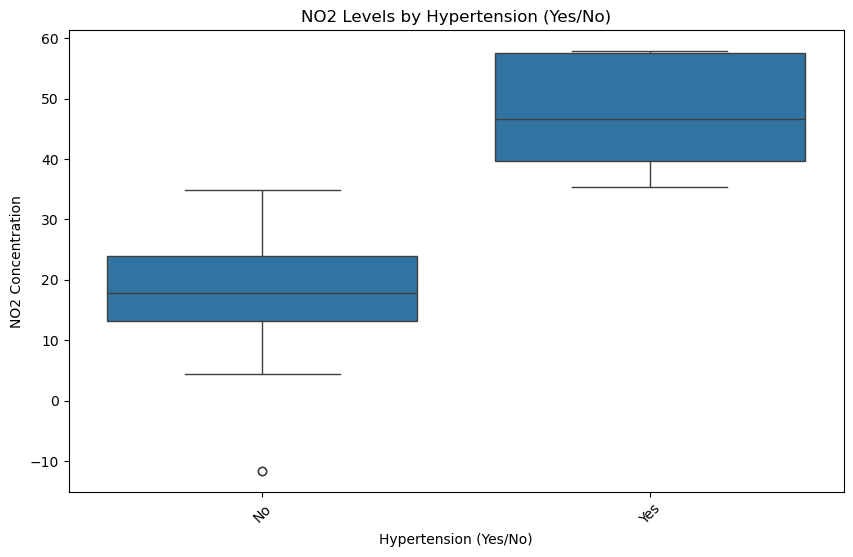

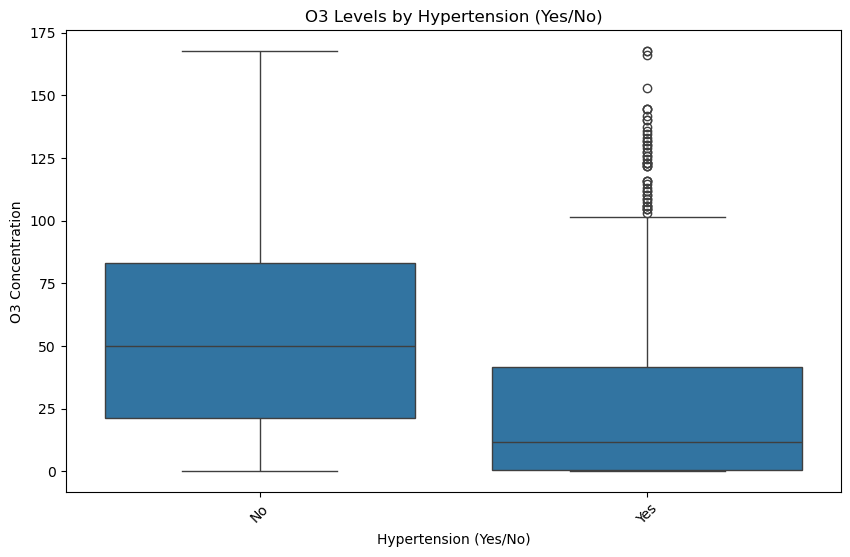

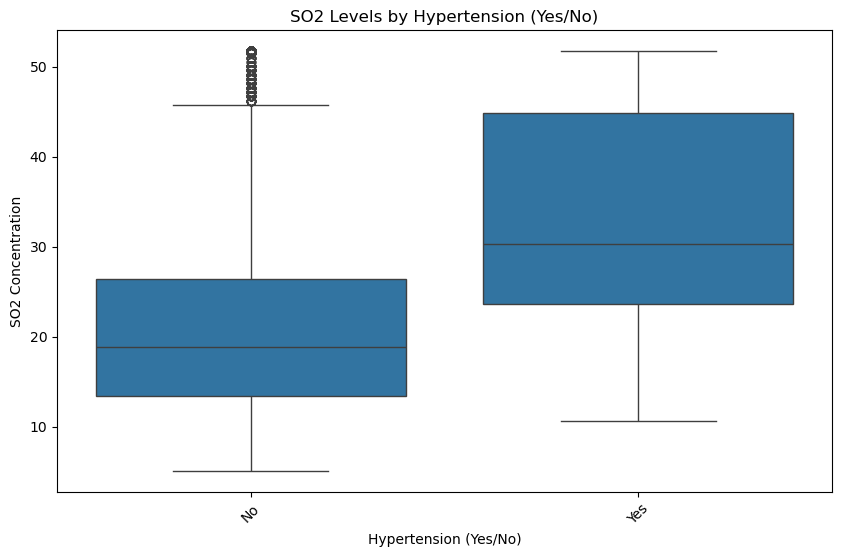

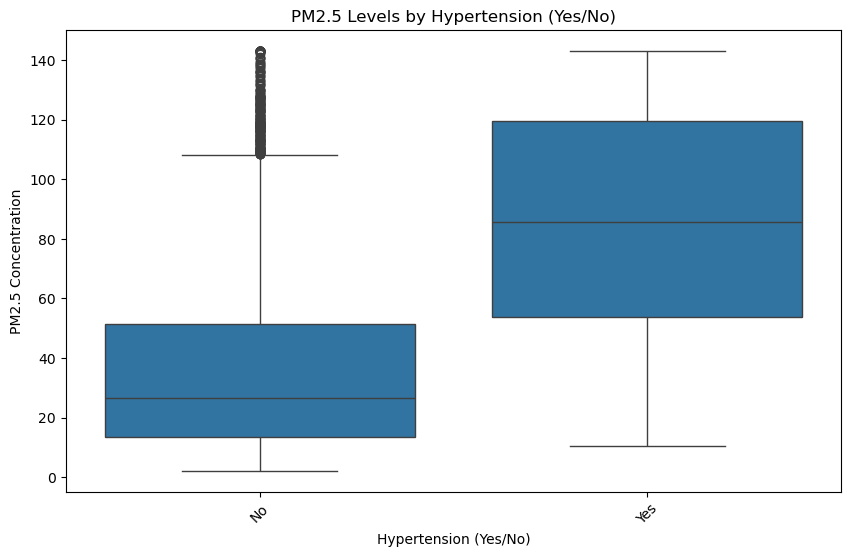

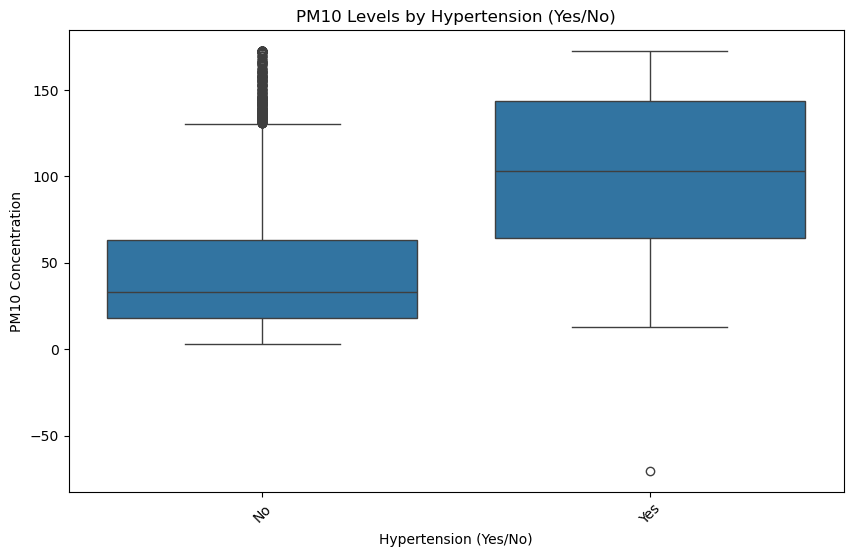

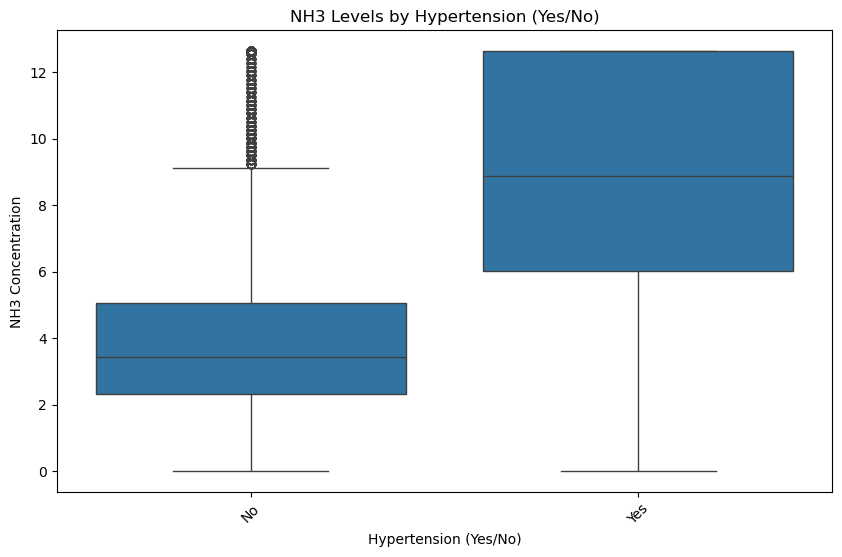

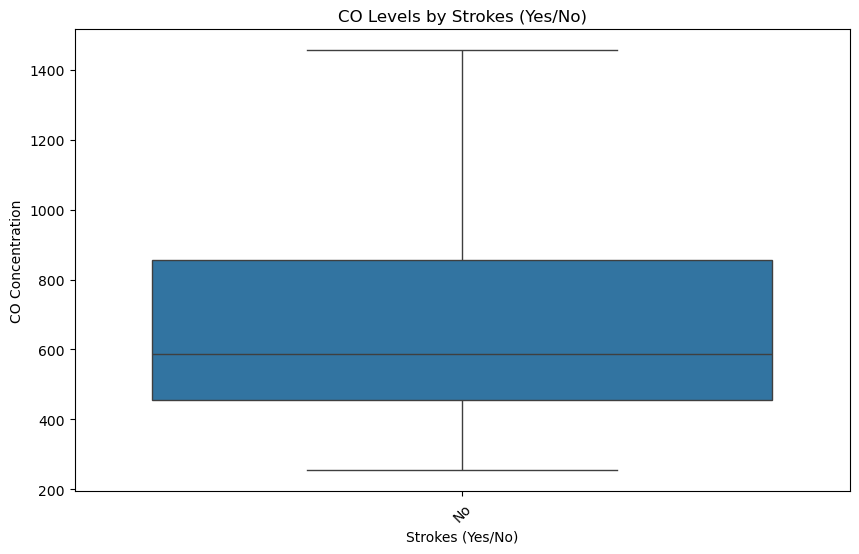

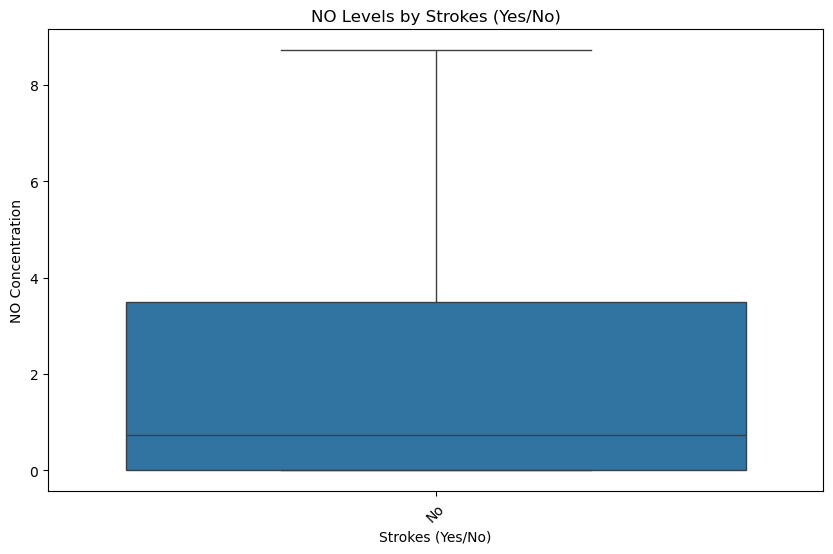

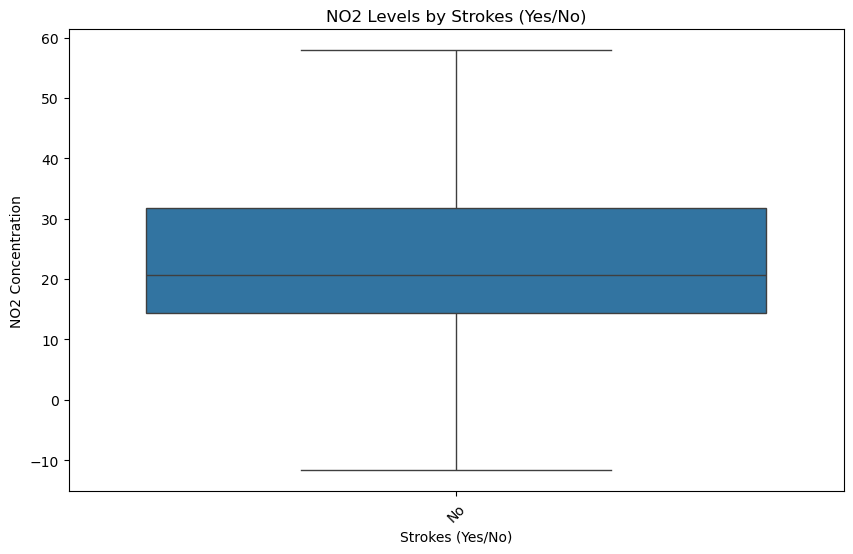

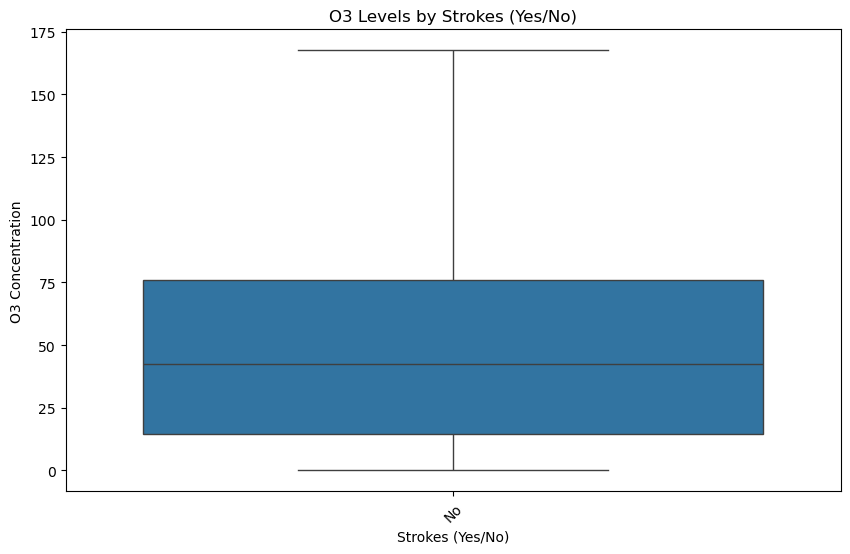

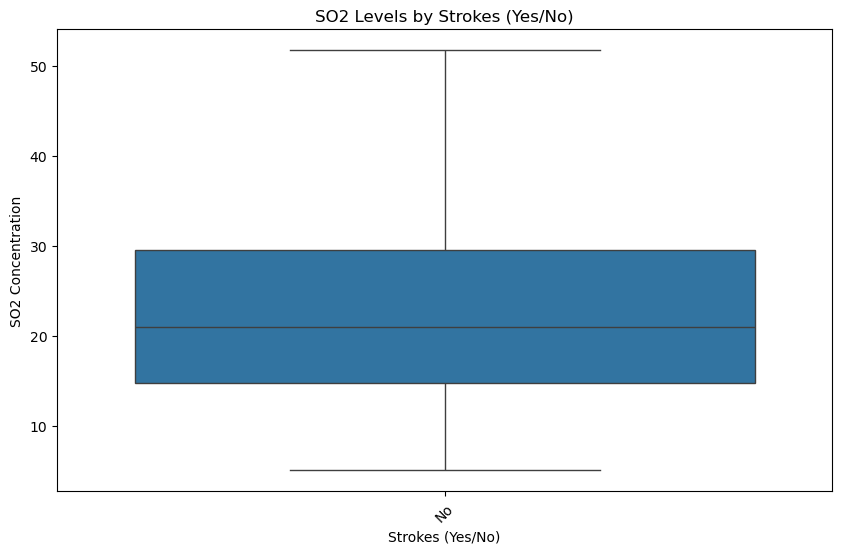

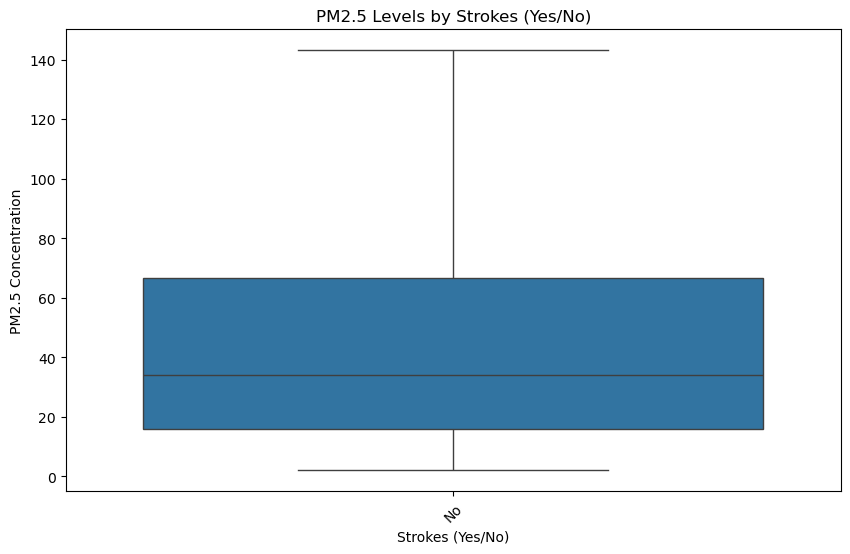

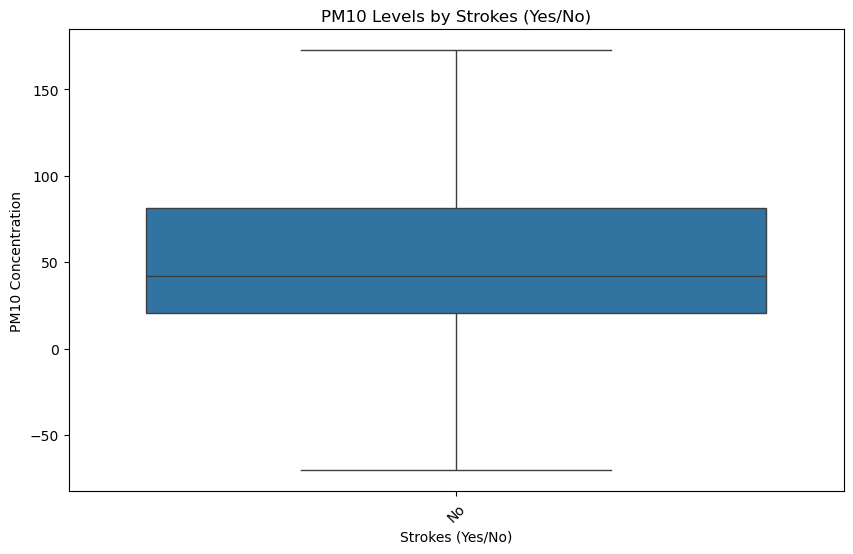

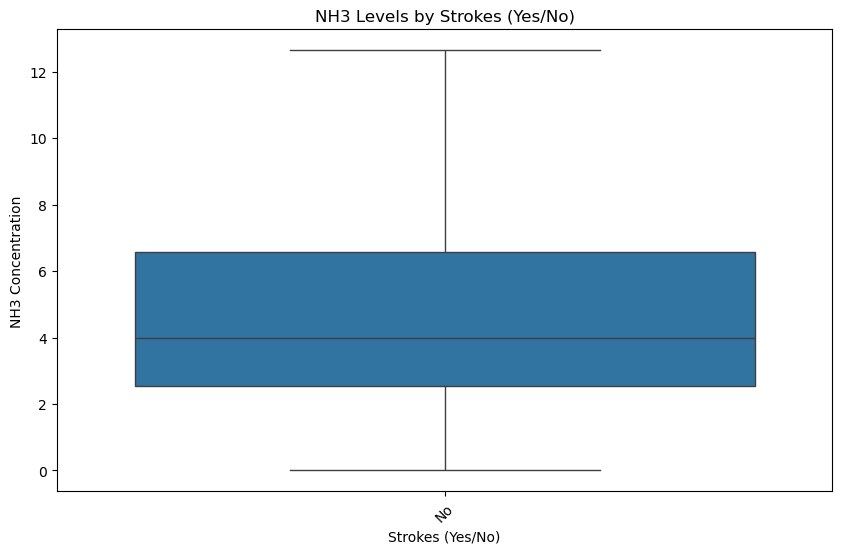

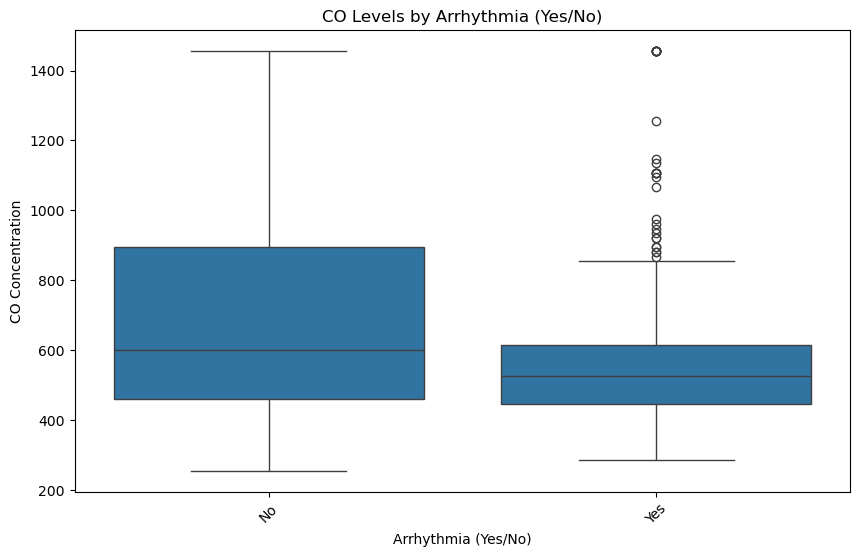

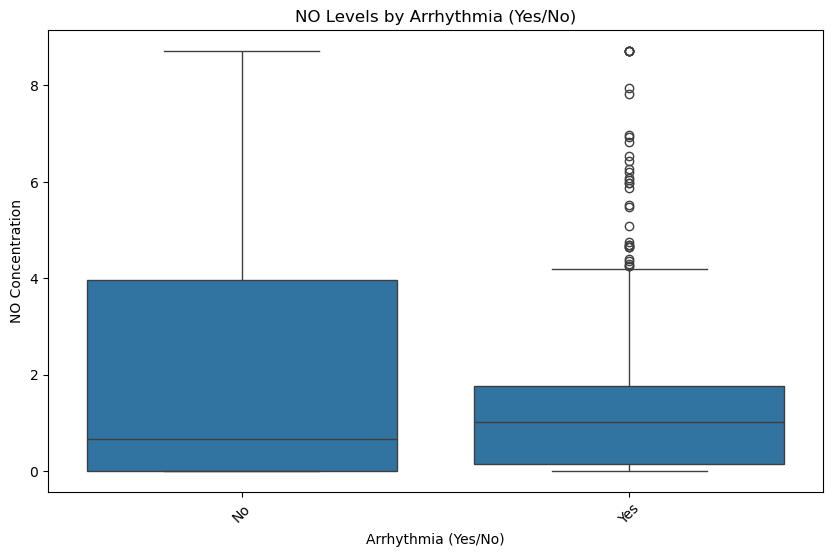

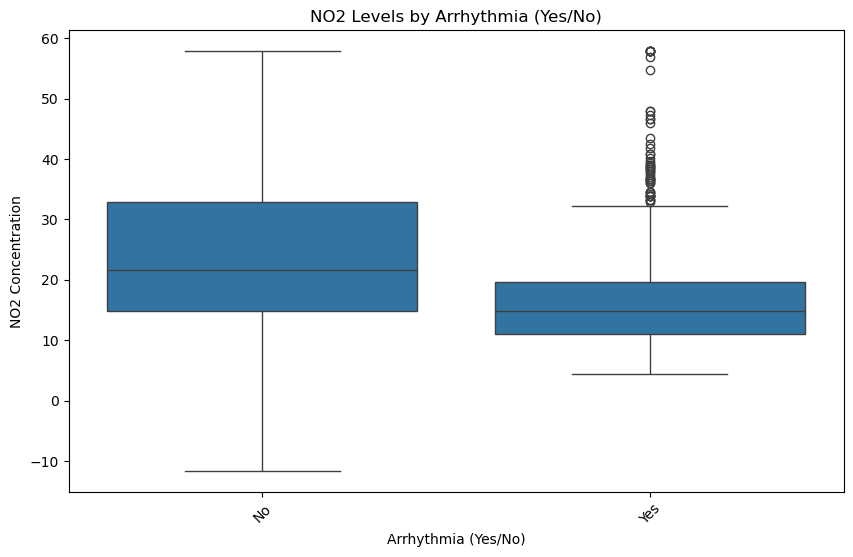

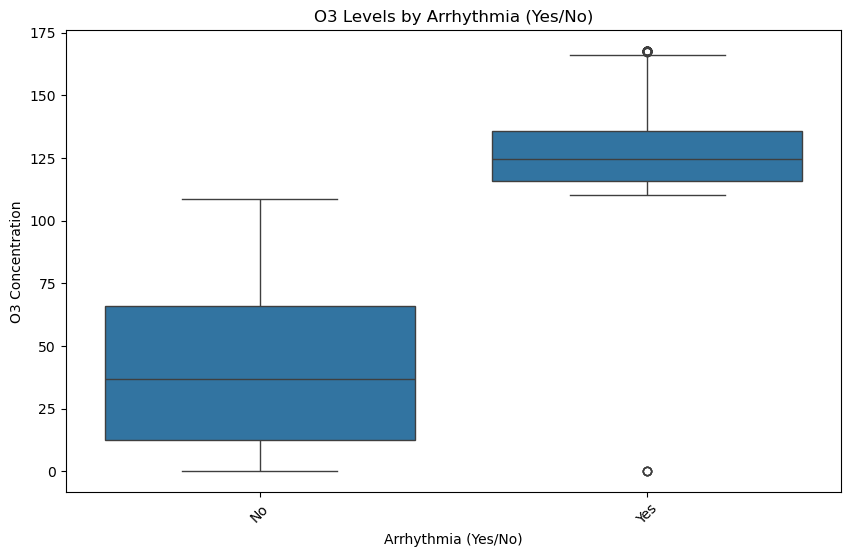

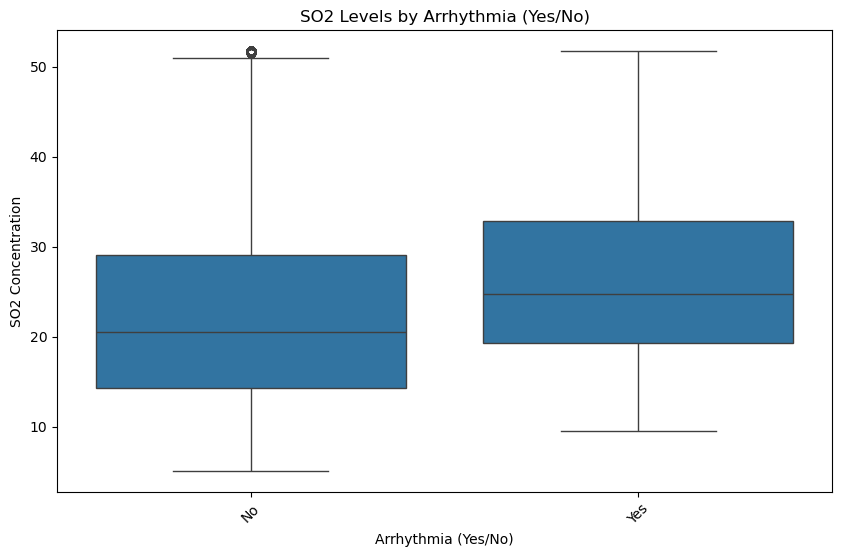

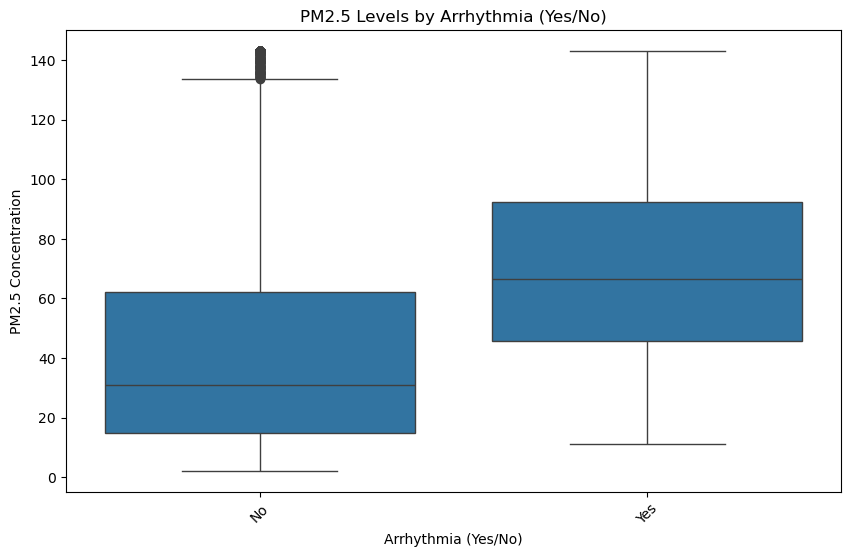

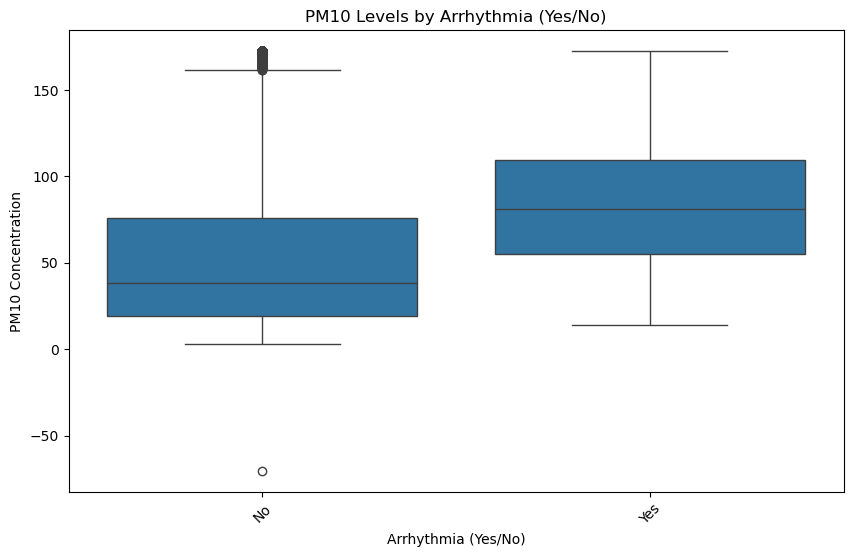

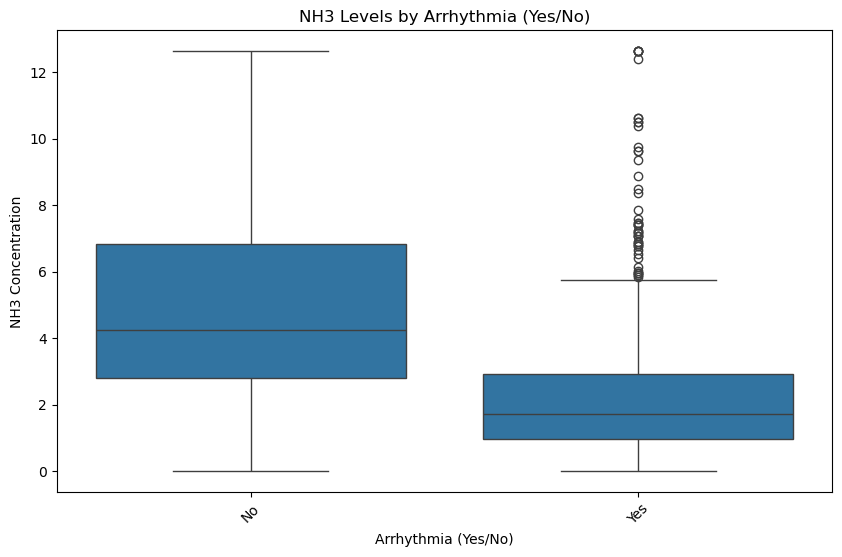

ValueError: Could not interpret value `Alzheimer & Dementia` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [47]:
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']
diseases = [
    'Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis', 'Reduced Lung Function in Children', 'Heart Attacks',
    'Hypertension', 'Strokes', 'Arrhythmia', 'Alzheimer & Dementia', 'Parkinson Disease',
    'Cognitive Impairment in Children', 'Low Birth Weight', 'Preterm Births', 'Sudden Infant Death Syndrome (SIDS)',
    'Bladder Cancer', 'Diabetes', 'Eye & Skin Irritation'
]

for disease in diseases:
    for pollutant in pollutants:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=disease, y=pollutant)
        plt.title(f'{pollutant} Levels by {disease} (Yes/No)')
        plt.xlabel(f'{disease} (Yes/No)')
        plt.ylabel(f'{pollutant} Concentration')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
df.drop_duplicates()

In [54]:
import pandas as pd

# Load the dataset
df = pd.read_csv('air_pollution_2024_2025(main).csv')

# List of diseases
diseases = [
    'Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis', 'Reduced Lung Function in Children', 'Heart Attacks',
    'Hypertension', 'Strokes', 'Arrhythmia', "Alzheimer & Dementia", "Parkinson Disease",
    'Cognitive Impairment in Children', 'Low Birth Weight', 'Preterm Births', 'Sudden Infant Death Syndrome (SIDS)',
    'Bladder Cancer', 'Diabetes', 'Eye & Skin Irritation'
]

# Identify disease columns that exist in the dataset
available_diseases = [col for col in diseases if col in df.columns]

# Standardize values to ensure categorical consistency
df[available_diseases] = df[available_diseases].astype(str).apply(lambda x: x.str.strip().str.lower())
df[available_diseases] = df[available_diseases].replace({'true': '1', 'false': '0', 'yes': '1', 'no': '0'})

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=available_diseases, drop_first=True)

# Display first few rows
print(df_encoded.head())


          timestamp  AQI      CO   NO    NO2     O3    SO2  PM2.5    PM10  \
0  31/12/2023 19:00    5  934.60  0.0  32.22  57.94  14.19  82.32  101.28   
1  31/12/2023 20:00    5  894.55  0.0  29.82  57.22  14.54  81.66  100.02   
2  31/12/2023 21:00    5  881.20  0.0  26.39  59.37  15.26  84.12  102.75   
3  31/12/2023 22:00    5  894.55  0.0  25.02  58.65  16.21  90.38  110.10   
4  31/12/2023 23:00    5  934.60  0.0  25.36  55.79  16.93  98.08  119.59   

    NH3  ... COPD_1 Pneumonia & Bronchitis_1  \
0  4.94  ...   True                    False   
1  4.62  ...   True                    False   
2  4.62  ...   True                    False   
3  4.69  ...   True                    False   
4  4.69  ...   True                    False   

   Reduced Lung Function in Children_1  Heart Attacks_1  Hypertension_1  \
0                                 True            False           False   
1                                 True            False           False   
2                      

In [ ]:
dummy

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
import pandas as pd

df = pd.read_csv("air_pollution_2024_2025(main).csv")

report = sv.analyze(df)

report.show_html("sweetviz_report.html")


In [ ]:
report.show_html("sweetviz_report.html")

In [56]:
import os
print(os.path.exists("sweetviz_report.html"))

True


In [58]:
dd = pd.read_csv('tamilnadu_air_pollution_2020_2024.csv')

In [60]:
dd.head()

timestamp  AQI      co    no    no2      o3    so2  pm2_5   pm10  \
0  25/11/2020 1:00    4  360.49  0.00   8.23  110.15  12.64  31.59  32.81   
1  25/11/2020 2:00    4  417.23  0.00  11.65  104.43  14.07  34.50  36.41   
2  25/11/2020 3:00    4  453.95  0.00  15.94   97.28  15.26  33.84  36.16   
3  25/11/2020 4:00    4  453.95  0.01  15.77   95.84  15.50  31.72  34.02   
4  25/11/2020 5:00    4  453.95  0.01  14.05   94.41  15.50  31.07  33.30   

    nh3 Air Quality Index  
0  1.19              Poor  
1  1.82              Poor  
2  2.09              Poor  
3  1.98              Poor  
4  1.90              Poor

In [62]:
dd.tail()

timestamp  AQI      co   no    no2      o3    so2   pm2_5  \
35509  31/12/2024 14:00    5  854.49  0.0  27.76   88.69  25.75  109.28   
35510  31/12/2024 15:00    5  894.55  0.0  25.70   92.98  25.75  112.93   
35511  31/12/2024 16:00    5  881.20  0.0  22.28   97.27  23.13  114.13   
35512  31/12/2024 17:00    5  907.90  0.0  21.25  100.14  21.46  116.94   
35513  31/12/2024 18:00    5  907.90  0.0  21.25  103.00  20.03  119.15   

         pm10   nh3 Air Quality Index  
35509  134.43  2.06         Very Poor  
35510  138.93  2.72         Very Poor  
35511  141.13  2.60         Very Poor  
35512  144.63  2.75         Very Poor  
35513  146.60  2.15         Very Poor

In [64]:
dd.shape

(35514, 11)

In [66]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35514 entries, 0 to 35513
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          35514 non-null  object 
 1   AQI                35514 non-null  int64  
 2   co                 35514 non-null  float64
 3   no                 35514 non-null  float64
 4   no2                35514 non-null  float64
 5   o3                 35514 non-null  float64
 6   so2                35514 non-null  float64
 7   pm2_5              35514 non-null  float64
 8   pm10               35514 non-null  float64
 9   nh3                35514 non-null  float64
 10  Air Quality Index  35514 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 3.0+ MB


In [68]:
dd.isnull().sum()

timestamp            0
AQI                  0
co                   0
no                   0
no2                  0
o3                   0
so2                  0
pm2_5                0
pm10                 0
nh3                  0
Air Quality Index    0
dtype: int64

In [70]:
dd.duplicated().sum()

0

In [72]:
for i in dd.select_dtypes(include="object").columns:
  print(dd[i].value_counts())
  print("***"*10)

timestamp
25/11/2020 1:00     1
20/08/2023 14:00    1
20/08/2023 8:00     1
20/08/2023 9:00     1
20/08/2023 10:00    1
                   ..
05/04/2022 2:00     1
05/04/2022 1:00     1
05/04/2022 0:00     1
04/04/2022 23:00    1
31/12/2024 18:00    1
Name: count, Length: 35514, dtype: int64
******************************
Air Quality Index
Very Poor    11465
Fair          8409
Poor          7265
Moderate      5596
Good          2779
Name: count, dtype: int64
******************************


In [74]:
dd.describe()

AQI            co            no           no2            o3  \
count  35514.000000  35514.000000  35514.000000  35514.000000  35514.000000   
mean       3.456947    810.839882      6.083052     25.691664     48.461750   
std        1.355332    634.019990     16.279564     76.991858     68.177416   
min        1.000000    250.340000      0.000000  -9999.000000  -9999.000000   
25%        2.000000    467.300000      0.010000     14.910000     13.230000   
50%        4.000000    600.820000      0.870000     21.590000     40.050000   
75%        5.000000    881.200000      4.020000     32.900000     75.100000   
max        5.000000  10681.150000    329.020000    216.600000    480.650000   

                so2         pm2_5          pm10           nh3  
count  35514.000000  35514.000000  35514.000000  35514.000000  
mean      27.018942     53.541467     63.298526      5.691771  
std       20.209434     50.001593     77.800427      6.014770  
min        3.670000      1.840000  -9999.000000      0.000000  
25%       14.780000     17.890000     22.850000      2.560000  
50%       21.700000     38.110000     46.100000      4.180000  
75%       31.950000     72.717500     86.367500      6.840000  
max      247.960000    561.890000    629.220000    182.390000

In [76]:
dd.describe(include="object")

timestamp Air Quality Index
count             35514             35514
unique            35514                 5
top     25/11/2020 1:00         Very Poor
freq                  1             11465

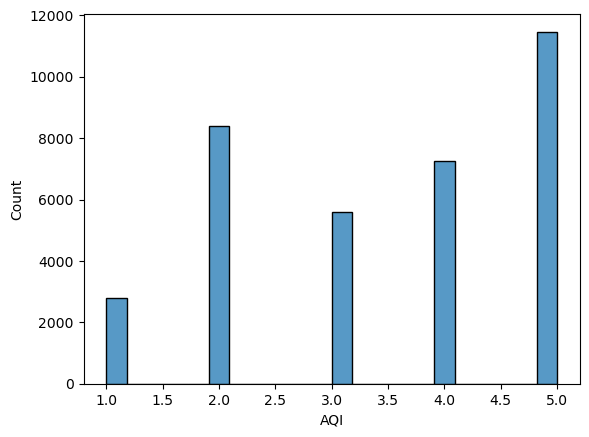

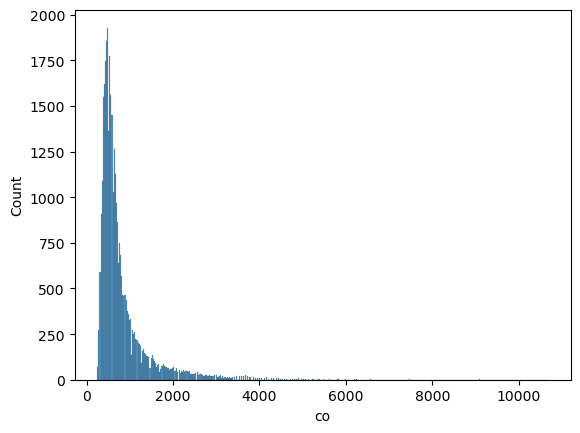

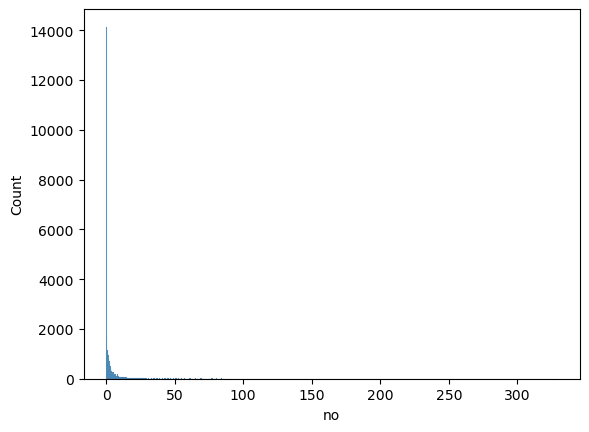

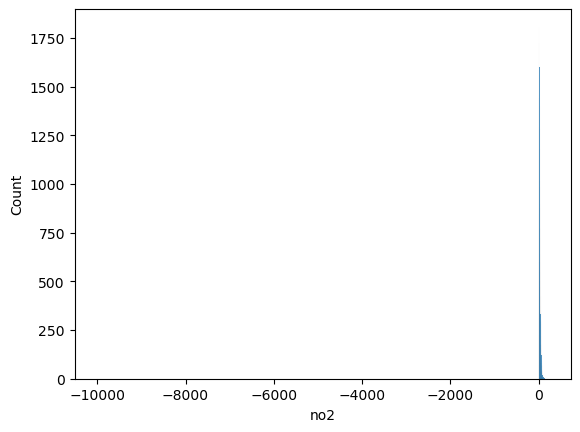

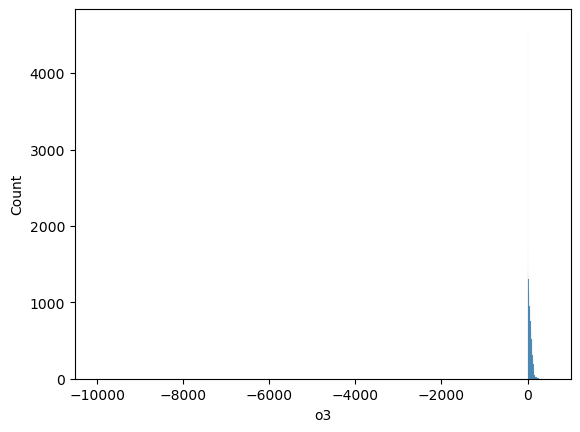

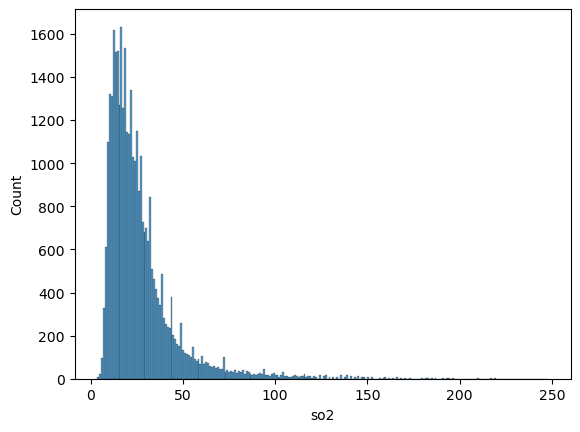

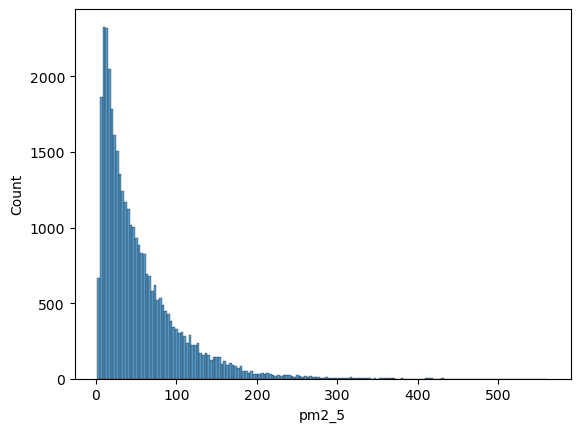

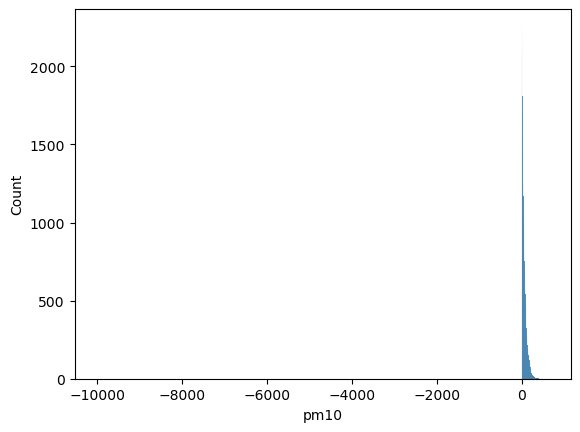

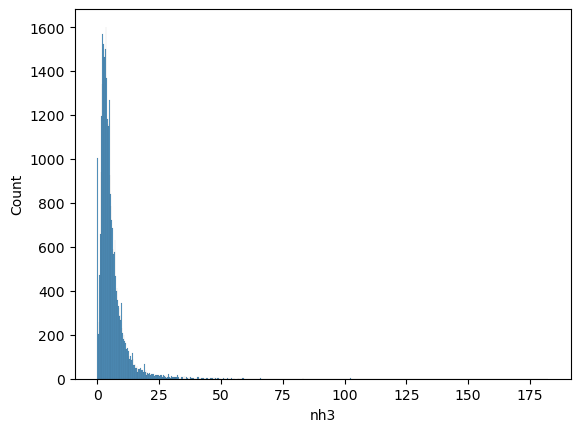

In [78]:
import warnings
warnings.filterwarnings("ignore")
for i in dd.select_dtypes(include="number").columns:
      sns.histplot(data=dd,x=i)
      plt.show()

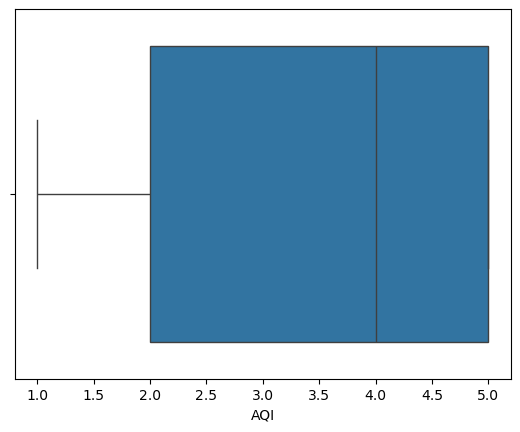

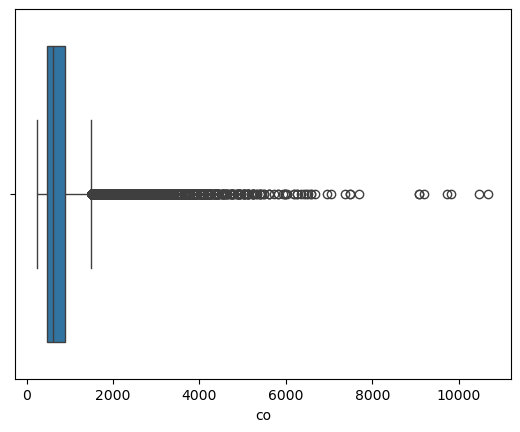

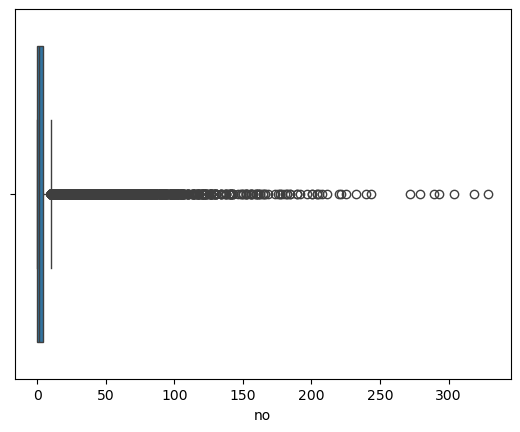

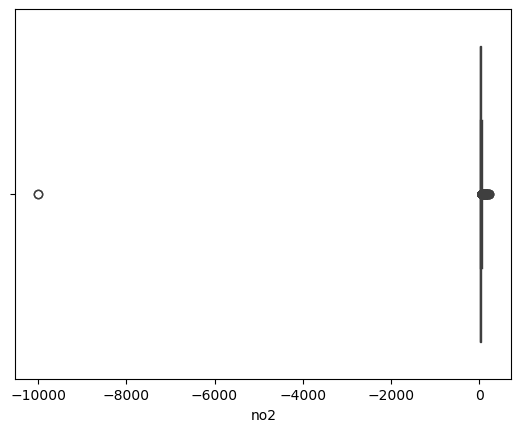

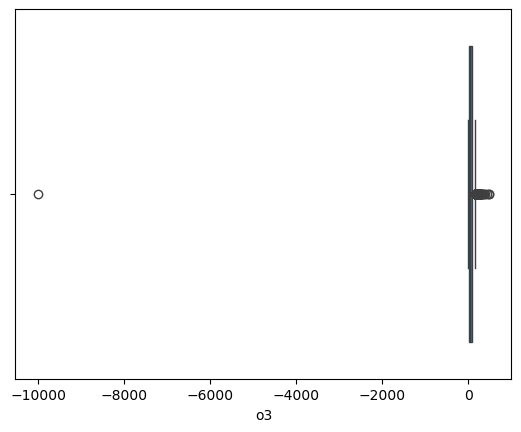

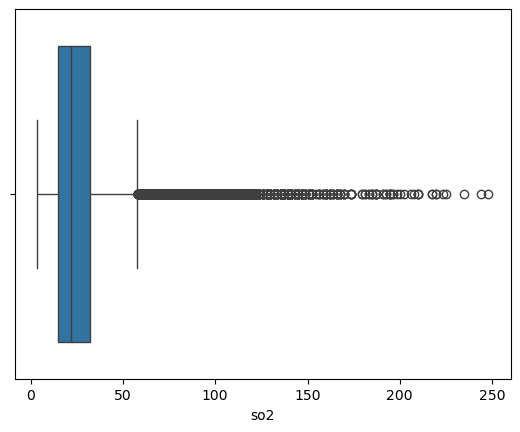

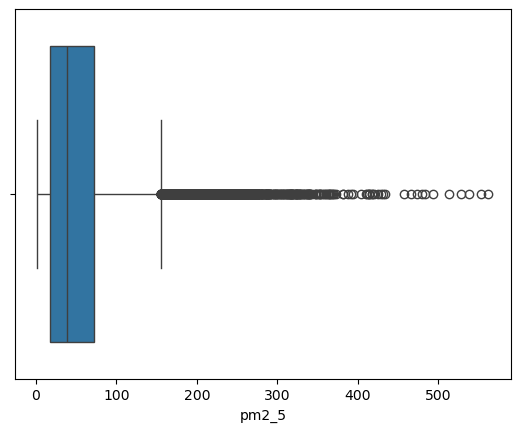

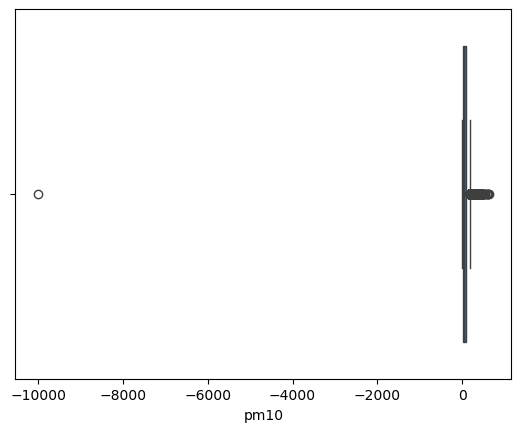

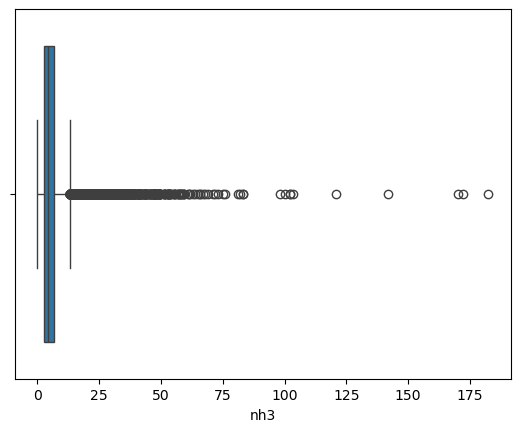

In [79]:
import warnings
warnings.filterwarnings("ignore")
for i in dd.select_dtypes(include="number").columns:
      sns.boxplot(data=dd,x=i)
      plt.show()

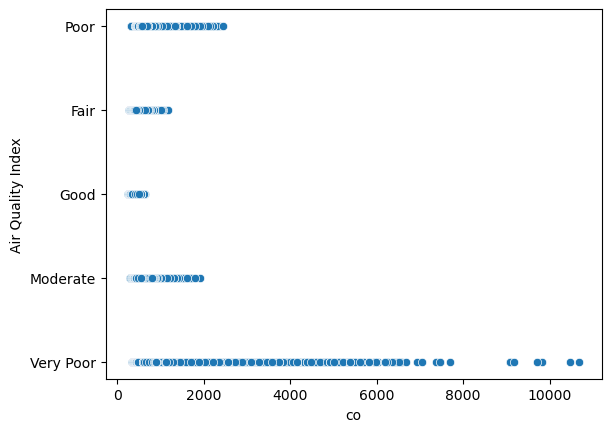

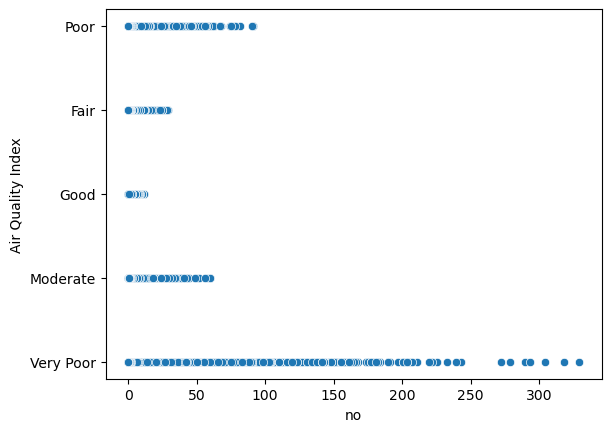

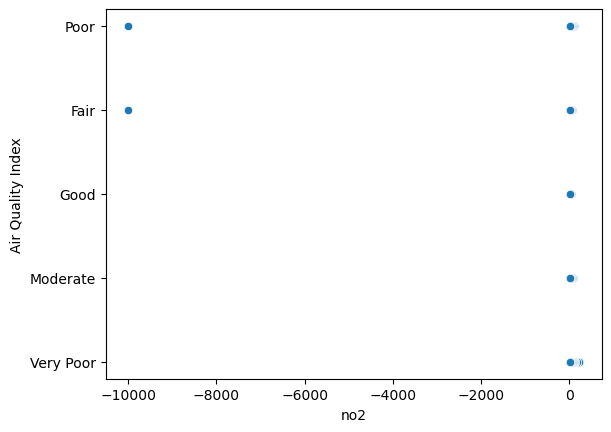

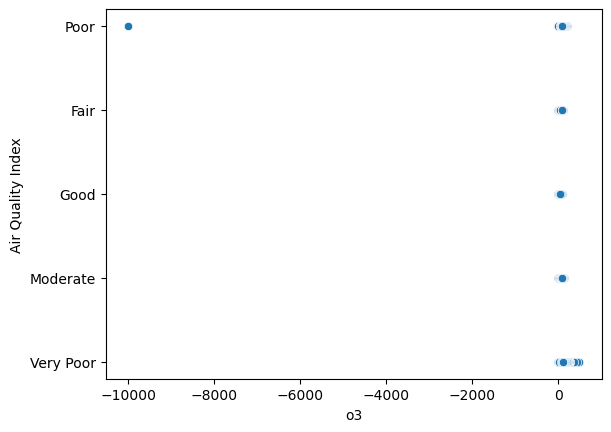

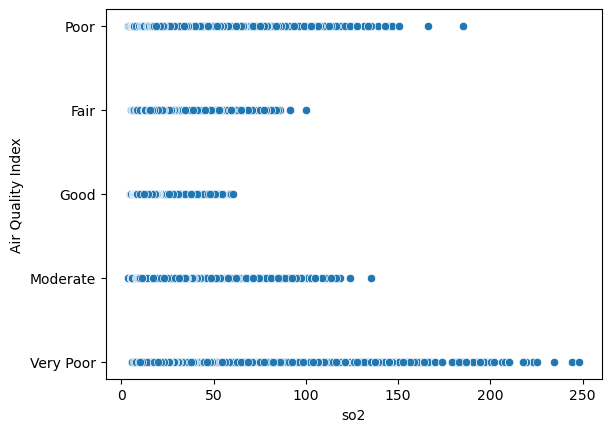

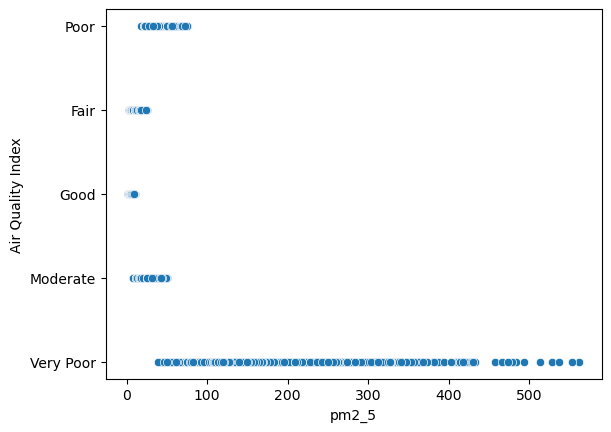

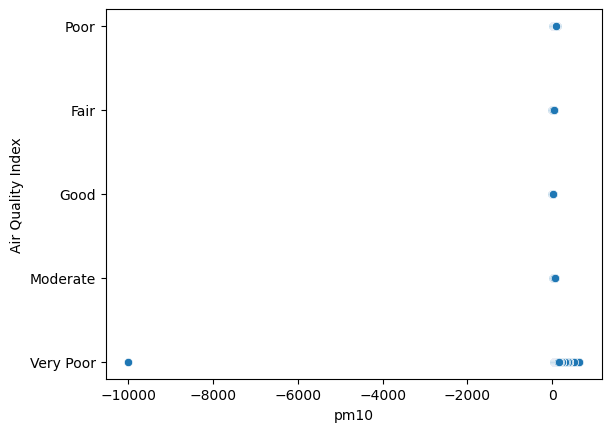

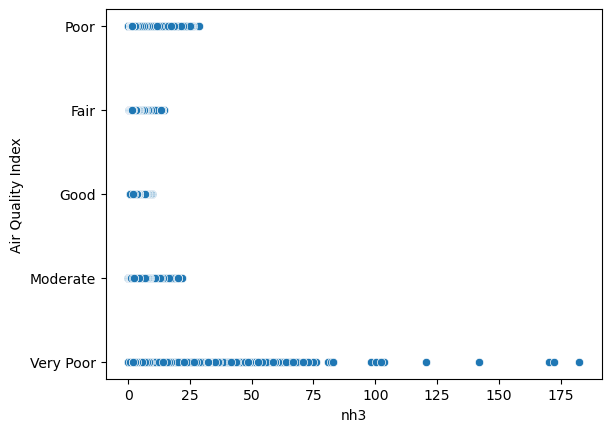

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dd = pd.read_csv('tamilnadu_air_pollution_2020_2024.csv')

for i in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
  sns.scatterplot(data=dd, x=i, y='Air Quality Index')
  plt.show()

In [84]:
dd.select_dtypes(include=["number","object"]).columns

Index(['timestamp', 'AQI', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'Air Quality Index'],
      dtype='object')

In [86]:
s = dd.select_dtypes(include="number").corr()

<Axes: >

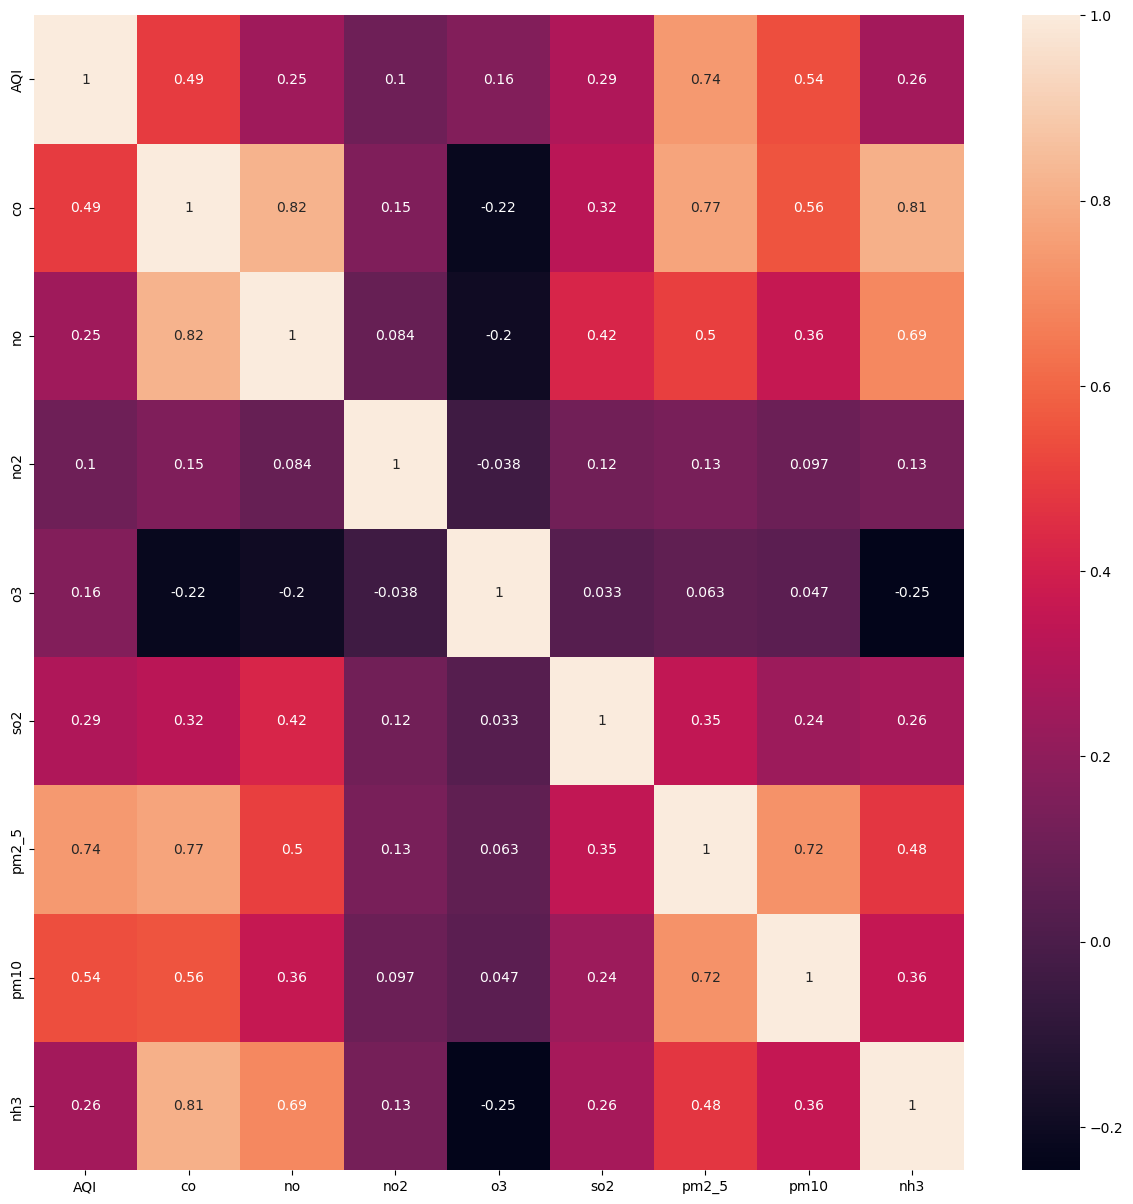

In [88]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [90]:
dd.isnull().sum()

timestamp            0
AQI                  0
co                   0
no                   0
no2                  0
o3                   0
so2                  0
pm2_5                0
pm10                 0
nh3                  0
Air Quality Index    0
dtype: int64

In [92]:
def wisker(col):
  q1 = dd[col].quantile(0.25)
  q3 = dd[col].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - (1.5 * iqr)
  upper = q3 + (1.5 * iqr)
  return lower, upper

lower_bound, upper_bound = wisker('co')
print(f"Lower bound for 'co': {lower_bound}")
print(f"Upper bound for 'co': {upper_bound}")

print("Available columns in df:", dd.columns)

Lower bound for 'co': -153.55
Upper bound for 'co': 1502.0500000000002
Available columns in df: Index(['timestamp', 'AQI', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'Air Quality Index'],
      dtype='object')


In [94]:
dd.columns

Index(['timestamp', 'AQI', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'Air Quality Index'],
      dtype='object')

In [96]:
import pandas as pd
import numpy as np

# Load the dataset
dd = pd.read_csv('tamilnadu_air_pollution_2020_2024.csv')

# Define pollutants
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Define upper and lower bounds (ensure these are properly set)
upper_bound = dd[pollutants].quantile(0.95)  # Example: 95th percentile as upper bound
lower_bound = dd[pollutants].quantile(0.05)  # Example: 5th percentile as lower bound

# Apply bounds to pollutants
for i in pollutants:
    dd[i] = np.where(dd[i] > upper_bound[i], upper_bound[i], dd[i])
    dd[i] = np.where(dd[i] < lower_bound[i], lower_bound[i], dd[i])

# Display first few rows of the adjusted dataset
print(dd.head())


         timestamp  AQI      co    no    no2      o3    so2  pm2_5   pm10  \
0  25/11/2020 1:00    4  360.49  0.00   9.34  110.15  12.64  31.59  32.81   
1  25/11/2020 2:00    4  417.23  0.00  11.65  104.43  14.07  34.50  36.41   
2  25/11/2020 3:00    4  453.95  0.00  15.94   97.28  15.26  33.84  36.16   
3  25/11/2020 4:00    4  453.95  0.01  15.77   95.84  15.50  31.72  34.02   
4  25/11/2020 5:00    4  453.95  0.01  14.05   94.41  15.50  31.07  33.30   

    nh3 Air Quality Index  
0  1.19              Poor  
1  1.82              Poor  
2  2.09              Poor  
3  1.98              Poor  
4  1.90              Poor  


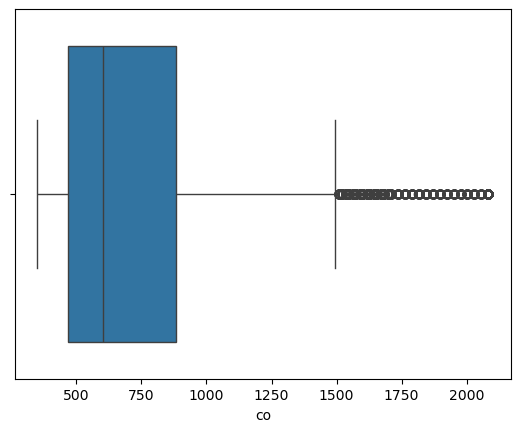

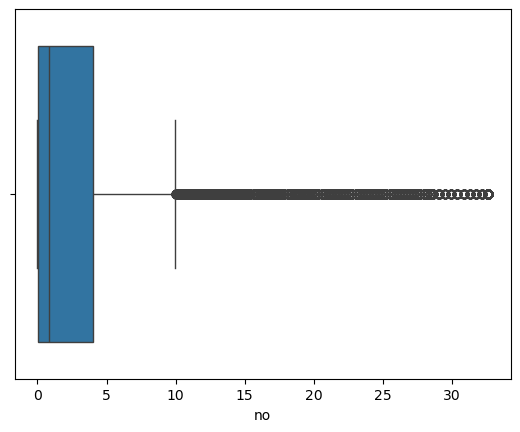

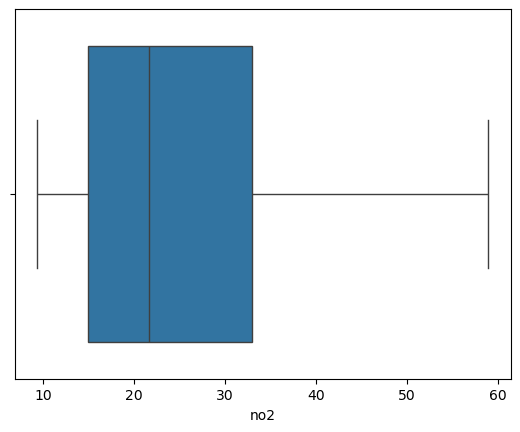

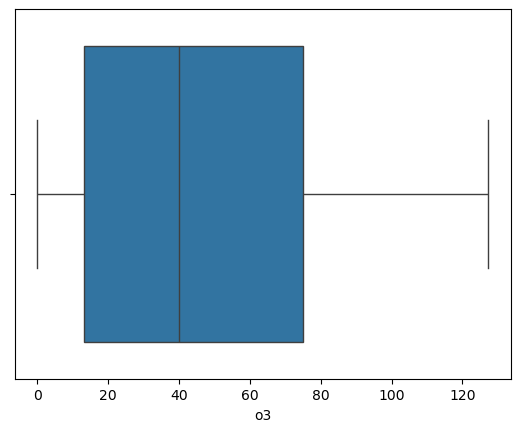

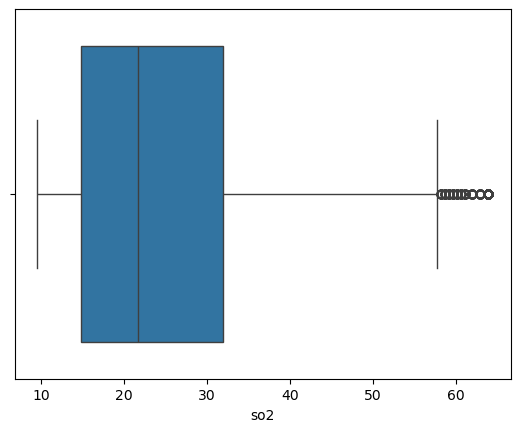

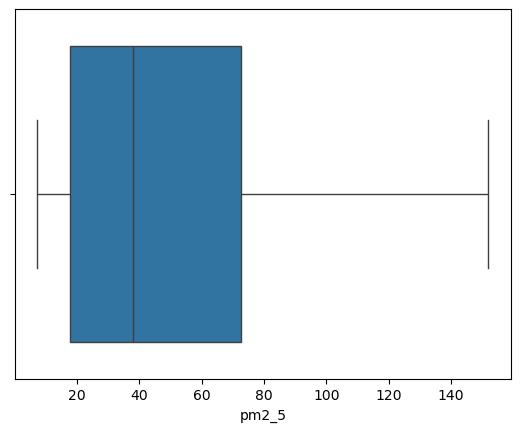

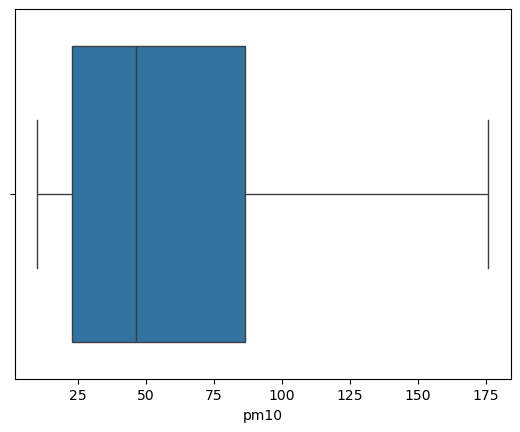

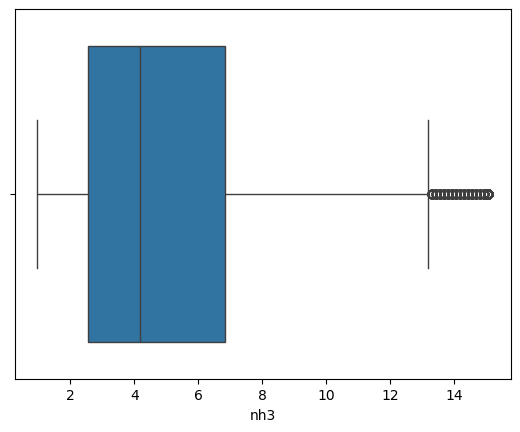

In [98]:
for i in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
  sns.boxplot(data=dd,x=i)
  plt.show()

In [100]:
dd.drop_duplicates()

timestamp  AQI      co    no    no2      o3    so2   pm2_5  \
0       25/11/2020 1:00    4  360.49  0.00   9.34  110.15  12.64   31.59   
1       25/11/2020 2:00    4  417.23  0.00  11.65  104.43  14.07   34.50   
2       25/11/2020 3:00    4  453.95  0.00  15.94   97.28  15.26   33.84   
3       25/11/2020 4:00    4  453.95  0.01  15.77   95.84  15.50   31.72   
4       25/11/2020 5:00    4  453.95  0.01  14.05   94.41  15.50   31.07   
...                 ...  ...     ...   ...    ...     ...    ...     ...   
35509  31/12/2024 14:00    5  854.49  0.00  27.76   88.69  25.75  109.28   
35510  31/12/2024 15:00    5  894.55  0.00  25.70   92.98  25.75  112.93   
35511  31/12/2024 16:00    5  881.20  0.00  22.28   97.27  23.13  114.13   
35512  31/12/2024 17:00    5  907.90  0.00  21.25  100.14  21.46  116.94   
35513  31/12/2024 18:00    5  907.90  0.00  21.25  103.00  20.03  119.15   

         pm10   nh3 Air Quality Index  
0       32.81  1.19              Poor  
1       36.41  1.82              Poor  
2       36.16  2.09              Poor  
3       34.02  1.98              Poor  
4       33.30  1.90              Poor  
...       ...   ...               ...  
35509  134.43  2.06         Very Poor  
35510  138.93  2.72         Very Poor  
35511  141.13  2.60         Very Poor  
35512  144.63  2.75         Very Poor  
35513  146.60  2.15         Very Poor  

[35514 rows x 11 columns]

In [104]:
dummy1 = pd.get_dummies(data=dd,columns=["Air Quality Index"],drop_first=True)
dummy1

timestamp  AQI      co    no    no2      o3    so2   pm2_5  \
0       25/11/2020 1:00    4  360.49  0.00   9.34  110.15  12.64   31.59   
1       25/11/2020 2:00    4  417.23  0.00  11.65  104.43  14.07   34.50   
2       25/11/2020 3:00    4  453.95  0.00  15.94   97.28  15.26   33.84   
3       25/11/2020 4:00    4  453.95  0.01  15.77   95.84  15.50   31.72   
4       25/11/2020 5:00    4  453.95  0.01  14.05   94.41  15.50   31.07   
...                 ...  ...     ...   ...    ...     ...    ...     ...   
35509  31/12/2024 14:00    5  854.49  0.00  27.76   88.69  25.75  109.28   
35510  31/12/2024 15:00    5  894.55  0.00  25.70   92.98  25.75  112.93   
35511  31/12/2024 16:00    5  881.20  0.00  22.28   97.27  23.13  114.13   
35512  31/12/2024 17:00    5  907.90  0.00  21.25  100.14  21.46  116.94   
35513  31/12/2024 18:00    5  907.90  0.00  21.25  103.00  20.03  119.15   

         pm10   nh3  Air Quality Index_Good  Air Quality Index_Moderate  \
0       32.81  1.19                   False                       False   
1       36.41  1.82                   False                       False   
2       36.16  2.09                   False                       False   
3       34.02  1.98                   False                       False   
4       33.30  1.90                   False                       False   
...       ...   ...                     ...                         ...   
35509  134.43  2.06                   False                       False   
35510  138.93  2.72                   False                       False   
35511  141.13  2.60                   False                       False   
35512  144.63  2.75                   False                       False   
35513  146.60  2.15                   False                       False   

       Air Quality Index_Poor  Air Quality Index_Very Poor  
0                        True                        False  
1                        True                        False  
2                        True                        False  
3                        True                        False  
4                        True                        False  
...                       ...                          ...  
35509                   False                         True  
35510                   False                         True  
35511                   False                         True  
35512                   False                         True  
35513                   False                         True  

[35514 rows x 14 columns]

In [106]:
import sweetviz as sv
import pandas as pd

dd = pd.read_csv("tamilnadu_air_pollution_2020_2024.csv")

report = sv.analyze(dd)

report.show_html("sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#training and testing

In [122]:
from sklearn.model_selection import train_test_split

# Check the columns in both datasets
print("Columns in df:")
print(df.columns)
print("Columns in dd:")
print(dd.columns)

# Define the feature columns (adjust based on the column names found)
features = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10',
       'NH3']  # Adjust this if necessary

# List of target columns
targets = ['Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis',
       'Reduced Lung Function in Children', 'Heart Attacks', 'Hypertension',
       'Strokes', 'Arrhythmia', 'Alzheimer’s & Dementia',
       'Parkinson’s Disease', 'Cognitive Impairment in Children',
       'Low Birth Weight', 'Preterm Births',
       'Sudden Infant Death Syndrome (SIDS)', 'Bladder Cancer', 'Diabetes',
       'Eye & Skin Irritation']

# Loop through each target and split the dataset
for target in targets:
    # Splitting Dataset 1 (2024-2025)
    X1 = df[features]
    y1 = df[target]
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

    # Now handle Dataset 2 (2020-2024)
    features_dd = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']  # Adjust if needed
    target_dd = 'AQI'  # Adjust if needed
    X2 = dd[features_dd]
    y2 = dd[target_dd]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

    # Checking shapes for each target
    print(f"Target: {target}")
    print("Dataset 1 Shapes (2024-2025):")
    print(f"X1_train: {X1_train.shape}, X1_test: {X1_test.shape}, y1_train: {y1_train.shape}, y1_test: {y1_test.shape}")

    print("Dataset 2 Shapes (2020-2024):")
    print(f"X2_train: {X2_train.shape}, X2_test: {X2_test.shape}, y2_train: {y2_train.shape}, y2_test: {y2_test.shape}")
    print("="*50)


Columns in df:
Index(['timestamp', 'AQI', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10',
       'NH3', 'Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis',
       'Reduced Lung Function in Children', 'Heart Attacks', 'Hypertension',
       'Strokes', 'Arrhythmia', 'Alzheimer’s & Dementia',
       'Parkinson’s Disease', 'Cognitive Impairment in Children',
       'Low Birth Weight', 'Preterm Births',
       'Sudden Infant Death Syndrome (SIDS)', 'Bladder Cancer', 'Diabetes',
       'Eye & Skin Irritation'],
      dtype='object')
Columns in dd:
Index(['timestamp', 'AQI', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'Air Quality Index'],
      dtype='object')
Target: Asthma
Dataset 1 Shapes (2024-2025):
X1_train: (7992, 8), X1_test: (1998, 8), y1_train: (7992,), y1_test: (1998,)
Dataset 2 Shapes (2020-2024):
X2_train: (28411, 8), X2_test: (7103, 8), y2_train: (28411,), y2_test: (7103,)
Target: COPD
Dataset 1 Shapes (2024-2025):
X1_train: (7992, 8), X1_test: (1998,

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Dataset 2 (2020-2024)
features_dd = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']  # Adjust column names if necessary
target_dd = 'AQI'

X2 = dd[features_dd]
y2 = dd[target_dd]

# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize KNN regressor (you can adjust k as needed)
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X2_train, y2_train)

# Make predictions
y2_pred = knn.predict(X2_test)

# Evaluate the model
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f"Model Evaluation Metrics for KNN Regression (Dataset 2):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Model Evaluation Metrics for KNN Regression (Dataset 2):
Mean Squared Error (MSE): 0.18929466422638322
Mean Absolute Error (MAE): 0.2864141911868225
R² Score: 0.8982012790529881


In [136]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming df contains features and target columns for Dataset 1 (2024-2025)
features = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']
targets = ['Asthma', 'COPD', 'Lung Cancer', 'Pneumonia & Bronchitis',
           'Reduced Lung Function in Children', 'Heart Attacks', 'Hypertension',
           'Strokes', 'Arrhythmia', 'Alzheimer’s & Dementia',
           'Parkinson’s Disease', 'Cognitive Impairment in Children',
           'Low Birth Weight', 'Preterm Births',
           'Sudden Infant Death Syndrome (SIDS)', 'Bladder Cancer', 'Diabetes',
           'Eye & Skin Irritation']

# Splitting Dataset 1 (2024-2025)
X1 = df[features]
y1 = df[targets]

# Remove targets with only one class
valid_targets = []
for target in targets:
    if y1[target].nunique() > 1:
        valid_targets.append(target)
    else:
        print(f"Target '{target}' has only one class, so it is removed from the training.")

# Filter out invalid targets from y1
y1 = y1[valid_targets]

# Split the dataset into train and test sets for the remaining targets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Initialize Logistic Regression
logreg = LogisticRegression(C=1.0, max_iter=10000, solver='saga')  # Use 'saga' solver

# Train the Logistic Regression model for each target individually
print("\nModel Evaluation Metrics for Logistic Regression (Multi-Target Classification):")
for target in valid_targets:
    logreg.fit(X1_train_scaled, y1_train[target])  # Use scaled features

    # Make predictions
    y1_pred = logreg.predict(X1_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y1_test[target], y1_pred)
    f1 = f1_score(y1_test[target], y1_pred, average='weighted')
    precision = precision_score(y1_test[target], y1_pred, average='weighted')
    recall = recall_score(y1_test[target], y1_pred, average='weighted')

    print(f"\nTarget: {target}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")


Target 'Lung Cancer' has only one class, so it is removed from the training.
Target 'Strokes' has only one class, so it is removed from the training.
Target 'Sudden Infant Death Syndrome (SIDS)' has only one class, so it is removed from the training.
Target 'Bladder Cancer' has only one class, so it is removed from the training.
Target 'Diabetes' has only one class, so it is removed from the training.

Model Evaluation Metrics for Logistic Regression (Multi-Target Classification):

Target: Asthma
Accuracy: 0.8603603603603603
F1-Score: 0.8593871173782108
Precision: 0.8596933710570075
Recall: 0.8603603603603603

Target: COPD
Accuracy: 0.9684684684684685
F1-Score: 0.9681685277816914
Precision: 0.968145862801261
Recall: 0.9684684684684685

Target: Pneumonia & Bronchitis
Accuracy: 0.948948948948949
F1-Score: 0.9489148812400202
Precision: 0.9488986683620716
Recall: 0.948948948948949

Target: Reduced Lung Function in Children
Accuracy: 0.9459459459459459
F1-Score: 0.9457212783387716
Precision

In [144]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats import loguniform
from sklearn.datasets import make_classification

# Function to perform hyperparameter tuning and evaluation
def tune_and_evaluate(X, y, dataset_name):
    print(f"\n🔍 Running Hyperparameter Tuning for {dataset_name}...")

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle Class Imbalance
    class_weights = dict(enumerate(compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)))

    # Hyperparameter Search Space (Expanded)
    param_dist = {
        'C': loguniform(0.0001, 100),  # Wider range for regularization
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'max_iter': [100, 300, 500, 1000]
    }

    # Randomized Search
    logreg = LogisticRegression(class_weight=class_weights)
    random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, 
                                       n_iter=50, cv=5, scoring='accuracy', 
                                       random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    print(f"Best Parameters (Randomized Search) for {dataset_name}:", random_search.best_params_)

    # Fine-Tuned Grid Search
    best_params = random_search.best_params_
    param_grid = {
        'C': [best_params['C'] / 10, best_params['C'], best_params['C'] * 10],
        'solver': [best_params['solver']],
        'penalty': [best_params['penalty']],
        'max_iter': [best_params['max_iter'], best_params['max_iter'] + 200]
    }

    grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters (Grid Search) for {dataset_name}:", grid_search.best_params_)

    # Evaluate Best Model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n📊 Evaluation Metrics for {dataset_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


# Generate Sample Data (Replace with actual datasets)
X1, y1 = make_classification(n_samples=2000, n_features=20, random_state=42, weights=[0.7, 0.3])
X2, y2 = make_classification(n_samples=2000, n_features=15, random_state=42, weights=[0.6, 0.4])

# Run tuning and evaluation for both datasets
tune_and_evaluate(X1, y1, "Dataset 1")
tune_and_evaluate(X2, y2, "Dataset 2")



🔍 Running Hyperparameter Tuning for Dataset 1...
Best Parameters (Randomized Search) for Dataset 1: {'C': 0.007343344964174942, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Parameters (Grid Search) for Dataset 1: {'C': 0.07343344964174942, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

📊 Evaluation Metrics for Dataset 1:
Accuracy: 0.8775
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       280
           1       0.74      0.92      0.82       120

    accuracy                           0.88       400
   macro avg       0.85      0.89      0.86       400
weighted avg       0.89      0.88      0.88       400


🔍 Running Hyperparameter Tuning for Dataset 2...
Best Parameters (Randomized Search) for Dataset 2: {'C': 0.5068612120448913, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Parameters (Grid Search) for Dataset 2: {'C': 0.5068612120448913, 'max_iter': 300, 'penalty': 'l2', 'so